# **Tarea 1**
## Machine Learning Avanzado
Integrantes: Patricio Ramirez
             Carlos Bustamante
             Nicolas Rivera
             Pablo Elgueta

---

##### Objetivo:
En este laboratorio volveremos a ver la biblioteca del trimestre anterior de perros y gatos. la base de datos de imagenes se
encuentra en la siguiente dirección: ‘https://www.kaggle.com/competitions/dogs-vs-cats/data‘
Ademas, para completar el análisis, se le pide construir una red que permita hacer la clasificación en base a los audios
adicionalmente: ‘https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs‘ 

###### Se le evaluará por:

- Carga y lectura de imagenes
- Crear una red neuronal convolucional
- Crear una red neuronal LSTM
- Pruebe 2 formas distintas de arquitectura de red para cada una.
- Cargue dos fotos de su biblioteca (sí, vaya y saque una foto a un perro o gato).
- Evalúe sus modelos con las fotos sacadas.
- Cargue los datos de audio
- Proponga un modelo para clasificar este tipo de dato
- Evalúe su modelo.

### Dogs vs Cats

#### **Descripción Dataset**


- El archivo de entrenamiento contiene 25.000 imagenes de perros y gatos. 
- Entrena tu algoritmo con estos archivos y predice las etiquetas para test1.zip 

#### **Etiquetas:**

- 1 = dog 
- 0 = cat


## 1.-Reconocimiento e importación de librerías



Para manipular bases de datos se usó Pandas, para visualización fueron las librerías Matplotlib y Seaborn, y en cuanto a Machine Learning se utilizó Keras y Scikit-learn.

In [24]:


#Analisis de Datos

import opendatasets as od
from os import listdir
import numpy as np
from numpy import asarray
#import pandas as pd
#import math
#import numpy as np
#import random

#Visualizacion de Datos

import matplotlib.pyplot as plt
#import seaborn as sns

#Visualización de Imagenes

from matplotlib.image import imread
from matplotlib import pyplot
from tensorflow.keras.utils import load_img

#Procesamiento de Imagenes
from tensorflow.keras.preprocessing.image import img_to_array





#Machine Learning

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models, layers, optimizers, regularizers
import keras
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler



#from keras.models import Sequential
#from keras.layers import Dense

#from sklearn.preprocessing import LabelEncoder

#from tqdm import tqdm
#sns.set(rc={'figure.figsize':(11.7,8.27)})


#test = pd.read_csv("/home/pato/Magister Data Science/Tercer Trimestre Data Science/ML Avanzado/Tareas/titanic/test.csv")
#train = pd.read_csv("/home/pato/Magister Data Science/Tercer Trimestre Data Science/ML Avanzado/Tareas/titanic/train.csv")

## 1.1.-Cargando el Dataset

###### Descarga de Dataset

In [2]:
od.download("https://www.kaggle.com/competitions/dogs-vs-cats/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\dogs-vs-cats" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

In [3]:
def extract_zip(file, folder, password):
    import zipfile
    ruta_zip = file
    ruta_extraccion = folder
    archivo_zip = zipfile.ZipFile(ruta_zip, 'r')
    try:
        archivo_zip.extractall(pwd=password, path=ruta_extraccion)
    except:
        pass
    archivo_zip.close()

###### Descompresión de Archivos

In [4]:
folder = 'dogs-vs-cats/train/'
if 'train' not in  listdir('dogs-vs-cats/'):
    file = 'dogs-vs-cats/train.zip'
    password = None
    folder = 'dogs-vs-cats'
    extract_zip(file, folder, password)
    folder = 'dogs-vs-cats/train/'

###### Visualización de Imagenes del Dataset

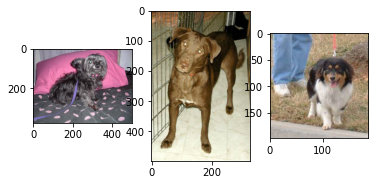

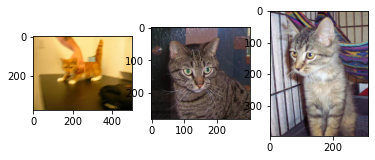

In [5]:
for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

###### Conversión de Imagen a Arreglo de Pixeles

In [6]:
photos = list()
labels = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    photo = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #image = imread(folder + file)
    
    #pyplot.imshow(image)
    photo = img_to_array(photo)
    photos.append(photo)
    if file.startswith('dog'):
        label = 1.0
        labels.append(label)
    if file.startswith('cat'):
        label = 0.0
        labels.append(label)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10232.jpg
dogs-vs-cats/train/cat.10233.jpg
dogs-vs-cats/train/cat.10234.jpg
dogs-vs-cats/train/cat.10235.jpg
dogs-vs-cats/train/cat.10236.jpg
dogs-vs-cats/train/cat.10237.jpg
dogs-vs-cats/train/cat.10238.jpg
dogs-vs-cats/train/cat.10239.jpg
dogs-vs-cats/train/cat.1024.jpg
dogs-vs-cats/train/cat.10240.jpg
dogs-vs-cats/train/cat.10241.jpg
dogs-vs-cats/train/cat.10242.jpg
dogs-vs-cats/train/cat.10243.jpg
dogs-vs-cats/train/cat.10244.jpg
dogs-vs-cats/train/cat.10245.jpg
dogs-vs-cats/train/cat.10246.jpg
dogs-vs-cats/train/cat.10247.jpg
dogs-vs-cats/train/cat.10248.jpg
dogs-vs-cats/train/cat.10249.jpg
dogs-vs-cats/train/cat.1025.jpg
dogs-vs-cats/train/cat.10250.jpg
dogs-vs-cats/train/cat.10251.jpg
dogs-vs-cats/train/cat.10252.jpg
dogs-vs-cats/train/cat.10253.jpg
dogs-vs-cats/train/cat.10254.jpg
dogs-vs-cats/train/cat.10255.jpg
dogs-vs-cats/train/cat.10256.jpg
dogs-vs-cats/train/cat.10257.jpg
dogs-vs-cats/train/cat.10258.jpg
dogs-vs-cats/train/cat.10259.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.10458.jpg
dogs-vs-cats/train/cat.10459.jpg
dogs-vs-cats/train/cat.1046.jpg
dogs-vs-cats/train/cat.10460.jpg
dogs-vs-cats/train/cat.10461.jpg
dogs-vs-cats/train/cat.10462.jpg
dogs-vs-cats/train/cat.10463.jpg
dogs-vs-cats/train/cat.10464.jpg
dogs-vs-cats/train/cat.10465.jpg
dogs-vs-cats/train/cat.10466.jpg
dogs-vs-cats/train/cat.10467.jpg
dogs-vs-cats/train/cat.10468.jpg
dogs-vs-cats/train/cat.10469.jpg
dogs-vs-cats/train/cat.1047.jpg
dogs-vs-cats/train/cat.10470.jpg
dogs-vs-cats/train/cat.10471.jpg
dogs-vs-cats/train/cat.10472.jpg
dogs-vs-cats/train/cat.10473.jpg
dogs-vs-cats/train/cat.10474.jpg
dogs-vs-cats/train/cat.10475.jpg
dogs-vs-cats/train/cat.10476.jpg
dogs-vs-cats/train/cat.10477.jpg
dogs-vs-cats/train/cat.10478.jpg
dogs-vs-cats/train/cat.10479.jpg
dogs-vs-cats/train/cat.1048.jpg
dogs-vs-cats/train/cat.10480.jpg
dogs-vs-cats/train/cat.10481.jpg
dogs-vs-cats/train/cat.10482.jpg
dogs-vs-cats/train/cat.10483.jpg
dogs-vs-cats/train/cat.10484.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10694.jpg
dogs-vs-cats/train/cat.10695.jpg
dogs-vs-cats/train/cat.10696.jpg
dogs-vs-cats/train/cat.10697.jpg
dogs-vs-cats/train/cat.10698.jpg
dogs-vs-cats/train/cat.10699.jpg
dogs-vs-cats/train/cat.107.jpg
dogs-vs-cats/train/cat.1070.jpg
dogs-vs-cats/train/cat.10700.jpg
dogs-vs-cats/train/cat.10701.jpg
dogs-vs-cats/train/cat.10702.jpg
dogs-vs-cats/train/cat.10703.jpg
dogs-vs-cats/train/cat.10704.jpg
dogs-vs-cats/train/cat.10705.jpg
dogs-vs-cats/train/cat.10706.jpg
dogs-vs-cats/train/cat.10707.jpg
dogs-vs-cats/train/cat.10708.jpg
dogs-vs-cats/train/cat.10709.jpg
dogs-vs-cats/train/cat.1071.jpg
dogs-vs-cats/train/cat.10710.jpg
dogs-vs-cats/train/cat.10711.jpg
dogs-vs-cats/train/cat.10712.jpg
dogs-vs-cats/train/cat.10713.jpg
dogs-vs-cats/train/cat.10714.jpg
dogs-vs-cats/train/cat.10715.jpg
dogs-vs-cats/train/cat.10716.jpg
dogs-vs-cats/train/cat.10717.jpg
dogs-vs-cats/train/cat.10718.jpg
dogs-vs-cats/train/cat.10719.jpg
dogs-vs-cats/train/cat.1072.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.10938.jpg
dogs-vs-cats/train/cat.10939.jpg
dogs-vs-cats/train/cat.1094.jpg
dogs-vs-cats/train/cat.10940.jpg
dogs-vs-cats/train/cat.10941.jpg
dogs-vs-cats/train/cat.10942.jpg
dogs-vs-cats/train/cat.10943.jpg
dogs-vs-cats/train/cat.10944.jpg
dogs-vs-cats/train/cat.10945.jpg
dogs-vs-cats/train/cat.10946.jpg
dogs-vs-cats/train/cat.10947.jpg
dogs-vs-cats/train/cat.10948.jpg
dogs-vs-cats/train/cat.10949.jpg
dogs-vs-cats/train/cat.1095.jpg
dogs-vs-cats/train/cat.10950.jpg
dogs-vs-cats/train/cat.10951.jpg
dogs-vs-cats/train/cat.10952.jpg
dogs-vs-cats/train/cat.10953.jpg
dogs-vs-cats/train/cat.10954.jpg
dogs-vs-cats/train/cat.10955.jpg
dogs-vs-cats/train/cat.10956.jpg
dogs-vs-cats/train/cat.10957.jpg
dogs-vs-cats/train/cat.10958.jpg
dogs-vs-cats/train/cat.10959.jpg
dogs-vs-cats/train/cat.1096.jpg
dogs-vs-cats/train/cat.10960.jpg
dogs-vs-cats/train/cat.10961.jpg
dogs-vs-cats/train/cat.10962.jpg
dogs-vs-cats/train/cat.10963.jpg
dogs-vs-cats/train/cat.10964.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11169.jpg
dogs-vs-cats/train/cat.1117.jpg
dogs-vs-cats/train/cat.11170.jpg
dogs-vs-cats/train/cat.11171.jpg
dogs-vs-cats/train/cat.11172.jpg
dogs-vs-cats/train/cat.11173.jpg
dogs-vs-cats/train/cat.11174.jpg
dogs-vs-cats/train/cat.11175.jpg
dogs-vs-cats/train/cat.11176.jpg
dogs-vs-cats/train/cat.11177.jpg
dogs-vs-cats/train/cat.11178.jpg
dogs-vs-cats/train/cat.11179.jpg
dogs-vs-cats/train/cat.1118.jpg
dogs-vs-cats/train/cat.11180.jpg
dogs-vs-cats/train/cat.11181.jpg
dogs-vs-cats/train/cat.11182.jpg
dogs-vs-cats/train/cat.11183.jpg
dogs-vs-cats/train/cat.11184.jpg
dogs-vs-cats/train/cat.11185.jpg
dogs-vs-cats/train/cat.11186.jpg
dogs-vs-cats/train/cat.11187.jpg
dogs-vs-cats/train/cat.11188.jpg
dogs-vs-cats/train/cat.11189.jpg
dogs-vs-cats/train/cat.1119.jpg
dogs-vs-cats/train/cat.11190.jpg
dogs-vs-cats/train/cat.11191.jpg
dogs-vs-cats/train/cat.11192.jpg
dogs-vs-cats/train/cat.11193.jpg
dogs-vs-cats/train/cat.11194.jpg
dogs-vs-cats/train/cat.11195.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11409.jpg
dogs-vs-cats/train/cat.1141.jpg
dogs-vs-cats/train/cat.11410.jpg
dogs-vs-cats/train/cat.11411.jpg
dogs-vs-cats/train/cat.11412.jpg
dogs-vs-cats/train/cat.11413.jpg
dogs-vs-cats/train/cat.11414.jpg
dogs-vs-cats/train/cat.11415.jpg
dogs-vs-cats/train/cat.11416.jpg
dogs-vs-cats/train/cat.11417.jpg
dogs-vs-cats/train/cat.11418.jpg
dogs-vs-cats/train/cat.11419.jpg
dogs-vs-cats/train/cat.1142.jpg
dogs-vs-cats/train/cat.11420.jpg
dogs-vs-cats/train/cat.11421.jpg
dogs-vs-cats/train/cat.11422.jpg
dogs-vs-cats/train/cat.11423.jpg
dogs-vs-cats/train/cat.11424.jpg
dogs-vs-cats/train/cat.11425.jpg
dogs-vs-cats/train/cat.11426.jpg
dogs-vs-cats/train/cat.11427.jpg
dogs-vs-cats/train/cat.11428.jpg
dogs-vs-cats/train/cat.11429.jpg
dogs-vs-cats/train/cat.1143.jpg
dogs-vs-cats/train/cat.11430.jpg
dogs-vs-cats/train/cat.11431.jpg
dogs-vs-cats/train/cat.11432.jpg
dogs-vs-cats/train/cat.11433.jpg
dogs-vs-cats/train/cat.11434.jpg
dogs-vs-cats/train/cat.11435.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11637.jpg
dogs-vs-cats/train/cat.11638.jpg
dogs-vs-cats/train/cat.11639.jpg
dogs-vs-cats/train/cat.1164.jpg
dogs-vs-cats/train/cat.11640.jpg
dogs-vs-cats/train/cat.11641.jpg
dogs-vs-cats/train/cat.11642.jpg
dogs-vs-cats/train/cat.11643.jpg
dogs-vs-cats/train/cat.11644.jpg
dogs-vs-cats/train/cat.11645.jpg
dogs-vs-cats/train/cat.11646.jpg
dogs-vs-cats/train/cat.11647.jpg
dogs-vs-cats/train/cat.11648.jpg
dogs-vs-cats/train/cat.11649.jpg
dogs-vs-cats/train/cat.1165.jpg
dogs-vs-cats/train/cat.11650.jpg
dogs-vs-cats/train/cat.11651.jpg
dogs-vs-cats/train/cat.11652.jpg
dogs-vs-cats/train/cat.11653.jpg
dogs-vs-cats/train/cat.11654.jpg
dogs-vs-cats/train/cat.11655.jpg
dogs-vs-cats/train/cat.11656.jpg
dogs-vs-cats/train/cat.11657.jpg
dogs-vs-cats/train/cat.11658.jpg
dogs-vs-cats/train/cat.11659.jpg
dogs-vs-cats/train/cat.1166.jpg
dogs-vs-cats/train/cat.11660.jpg
dogs-vs-cats/train/cat.11661.jpg
dogs-vs-cats/train/cat.11662.jpg
dogs-vs-cats/train/cat.11663.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11874.jpg
dogs-vs-cats/train/cat.11875.jpg
dogs-vs-cats/train/cat.11876.jpg
dogs-vs-cats/train/cat.11877.jpg
dogs-vs-cats/train/cat.11878.jpg
dogs-vs-cats/train/cat.11879.jpg
dogs-vs-cats/train/cat.1188.jpg
dogs-vs-cats/train/cat.11880.jpg
dogs-vs-cats/train/cat.11881.jpg
dogs-vs-cats/train/cat.11882.jpg
dogs-vs-cats/train/cat.11883.jpg
dogs-vs-cats/train/cat.11884.jpg
dogs-vs-cats/train/cat.11885.jpg
dogs-vs-cats/train/cat.11886.jpg
dogs-vs-cats/train/cat.11887.jpg
dogs-vs-cats/train/cat.11888.jpg
dogs-vs-cats/train/cat.11889.jpg
dogs-vs-cats/train/cat.1189.jpg
dogs-vs-cats/train/cat.11890.jpg
dogs-vs-cats/train/cat.11891.jpg
dogs-vs-cats/train/cat.11892.jpg
dogs-vs-cats/train/cat.11893.jpg
dogs-vs-cats/train/cat.11894.jpg
dogs-vs-cats/train/cat.11895.jpg
dogs-vs-cats/train/cat.11896.jpg
dogs-vs-cats/train/cat.11897.jpg
dogs-vs-cats/train/cat.11898.jpg
dogs-vs-cats/train/cat.11899.jpg
dogs-vs-cats/train/cat.119.jpg
dogs-vs-cats/train/cat.1190.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.12107.jpg
dogs-vs-cats/train/cat.12108.jpg
dogs-vs-cats/train/cat.12109.jpg
dogs-vs-cats/train/cat.1211.jpg
dogs-vs-cats/train/cat.12110.jpg
dogs-vs-cats/train/cat.12111.jpg
dogs-vs-cats/train/cat.12112.jpg
dogs-vs-cats/train/cat.12113.jpg
dogs-vs-cats/train/cat.12114.jpg
dogs-vs-cats/train/cat.12115.jpg
dogs-vs-cats/train/cat.12116.jpg
dogs-vs-cats/train/cat.12117.jpg
dogs-vs-cats/train/cat.12118.jpg
dogs-vs-cats/train/cat.12119.jpg
dogs-vs-cats/train/cat.1212.jpg
dogs-vs-cats/train/cat.12120.jpg
dogs-vs-cats/train/cat.12121.jpg
dogs-vs-cats/train/cat.12122.jpg
dogs-vs-cats/train/cat.12123.jpg
dogs-vs-cats/train/cat.12124.jpg
dogs-vs-cats/train/cat.12125.jpg
dogs-vs-cats/train/cat.12126.jpg
dogs-vs-cats/train/cat.12127.jpg
dogs-vs-cats/train/cat.12128.jpg
dogs-vs-cats/train/cat.12129.jpg
dogs-vs-cats/train/cat.1213.jpg
dogs-vs-cats/train/cat.12130.jpg
dogs-vs-cats/train/cat.12131.jpg
dogs-vs-cats/train/cat.12132.jpg
dogs-vs-cats/train/cat.12133.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12337.jpg
dogs-vs-cats/train/cat.12338.jpg
dogs-vs-cats/train/cat.12339.jpg
dogs-vs-cats/train/cat.1234.jpg
dogs-vs-cats/train/cat.12340.jpg
dogs-vs-cats/train/cat.12341.jpg
dogs-vs-cats/train/cat.12342.jpg
dogs-vs-cats/train/cat.12343.jpg
dogs-vs-cats/train/cat.12344.jpg
dogs-vs-cats/train/cat.12345.jpg
dogs-vs-cats/train/cat.12346.jpg
dogs-vs-cats/train/cat.12347.jpg
dogs-vs-cats/train/cat.12348.jpg
dogs-vs-cats/train/cat.12349.jpg
dogs-vs-cats/train/cat.1235.jpg
dogs-vs-cats/train/cat.12350.jpg
dogs-vs-cats/train/cat.12351.jpg
dogs-vs-cats/train/cat.12352.jpg
dogs-vs-cats/train/cat.12353.jpg
dogs-vs-cats/train/cat.12354.jpg
dogs-vs-cats/train/cat.12355.jpg
dogs-vs-cats/train/cat.12356.jpg
dogs-vs-cats/train/cat.12357.jpg
dogs-vs-cats/train/cat.12358.jpg
dogs-vs-cats/train/cat.12359.jpg
dogs-vs-cats/train/cat.1236.jpg
dogs-vs-cats/train/cat.12360.jpg
dogs-vs-cats/train/cat.12361.jpg
dogs-vs-cats/train/cat.12362.jpg
dogs-vs-cats/train/cat.12363.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.132.jpg
dogs-vs-cats/train/cat.1320.jpg
dogs-vs-cats/train/cat.1321.jpg
dogs-vs-cats/train/cat.1322.jpg
dogs-vs-cats/train/cat.1323.jpg
dogs-vs-cats/train/cat.1324.jpg
dogs-vs-cats/train/cat.1325.jpg
dogs-vs-cats/train/cat.1326.jpg
dogs-vs-cats/train/cat.1327.jpg
dogs-vs-cats/train/cat.1328.jpg
dogs-vs-cats/train/cat.1329.jpg
dogs-vs-cats/train/cat.133.jpg
dogs-vs-cats/train/cat.1330.jpg
dogs-vs-cats/train/cat.1331.jpg
dogs-vs-cats/train/cat.1332.jpg
dogs-vs-cats/train/cat.1333.jpg
dogs-vs-cats/train/cat.1334.jpg
dogs-vs-cats/train/cat.1335.jpg
dogs-vs-cats/train/cat.1336.jpg
dogs-vs-cats/train/cat.1337.jpg
dogs-vs-cats/train/cat.1338.jpg
dogs-vs-cats/train/cat.1339.jpg
dogs-vs-cats/train/cat.134.jpg
dogs-vs-cats/train/cat.1340.jpg
dogs-vs-cats/train/cat.1341.jpg
dogs-vs-cats/train/cat.1342.jpg
dogs-vs-cats/train/cat.1343.jpg
dogs-vs-cats/train/cat.1344.jpg
dogs-vs-cats/train/cat.1345.jpg
dogs-vs-cats/train/cat.1346.jpg
dogs-vs-cats/train/cat.1347.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.156.jpg
dogs-vs-cats/train/cat.1560.jpg
dogs-vs-cats/train/cat.1561.jpg
dogs-vs-cats/train/cat.1562.jpg
dogs-vs-cats/train/cat.1563.jpg
dogs-vs-cats/train/cat.1564.jpg
dogs-vs-cats/train/cat.1565.jpg
dogs-vs-cats/train/cat.1566.jpg
dogs-vs-cats/train/cat.1567.jpg
dogs-vs-cats/train/cat.1568.jpg
dogs-vs-cats/train/cat.1569.jpg
dogs-vs-cats/train/cat.157.jpg
dogs-vs-cats/train/cat.1570.jpg
dogs-vs-cats/train/cat.1571.jpg
dogs-vs-cats/train/cat.1572.jpg
dogs-vs-cats/train/cat.1573.jpg
dogs-vs-cats/train/cat.1574.jpg
dogs-vs-cats/train/cat.1575.jpg
dogs-vs-cats/train/cat.1576.jpg
dogs-vs-cats/train/cat.1577.jpg
dogs-vs-cats/train/cat.1578.jpg
dogs-vs-cats/train/cat.1579.jpg
dogs-vs-cats/train/cat.158.jpg
dogs-vs-cats/train/cat.1580.jpg
dogs-vs-cats/train/cat.1581.jpg
dogs-vs-cats/train/cat.1582.jpg
dogs-vs-cats/train/cat.1583.jpg
dogs-vs-cats/train/cat.1584.jpg
dogs-vs-cats/train/cat.1585.jpg
dogs-vs-cats/train/cat.1586.jpg
dogs-vs-cats/train/cat.1587.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.1791.jpg
dogs-vs-cats/train/cat.1792.jpg
dogs-vs-cats/train/cat.1793.jpg
dogs-vs-cats/train/cat.1794.jpg
dogs-vs-cats/train/cat.1795.jpg
dogs-vs-cats/train/cat.1796.jpg
dogs-vs-cats/train/cat.1797.jpg
dogs-vs-cats/train/cat.1798.jpg
dogs-vs-cats/train/cat.1799.jpg
dogs-vs-cats/train/cat.18.jpg
dogs-vs-cats/train/cat.180.jpg
dogs-vs-cats/train/cat.1800.jpg
dogs-vs-cats/train/cat.1801.jpg
dogs-vs-cats/train/cat.1802.jpg
dogs-vs-cats/train/cat.1803.jpg
dogs-vs-cats/train/cat.1804.jpg
dogs-vs-cats/train/cat.1805.jpg
dogs-vs-cats/train/cat.1806.jpg
dogs-vs-cats/train/cat.1807.jpg
dogs-vs-cats/train/cat.1808.jpg
dogs-vs-cats/train/cat.1809.jpg
dogs-vs-cats/train/cat.181.jpg
dogs-vs-cats/train/cat.1810.jpg
dogs-vs-cats/train/cat.1811.jpg
dogs-vs-cats/train/cat.1812.jpg
dogs-vs-cats/train/cat.1813.jpg
dogs-vs-cats/train/cat.1814.jpg
dogs-vs-cats/train/cat.1815.jpg
dogs-vs-cats/train/cat.1816.jpg
dogs-vs-cats/train/cat.1817.jpg
dogs-vs-cats/train/cat.1818.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.2041.jpg
dogs-vs-cats/train/cat.2042.jpg
dogs-vs-cats/train/cat.2043.jpg
dogs-vs-cats/train/cat.2044.jpg
dogs-vs-cats/train/cat.2045.jpg
dogs-vs-cats/train/cat.2046.jpg
dogs-vs-cats/train/cat.2047.jpg
dogs-vs-cats/train/cat.2048.jpg
dogs-vs-cats/train/cat.2049.jpg
dogs-vs-cats/train/cat.205.jpg
dogs-vs-cats/train/cat.2050.jpg
dogs-vs-cats/train/cat.2051.jpg
dogs-vs-cats/train/cat.2052.jpg
dogs-vs-cats/train/cat.2053.jpg
dogs-vs-cats/train/cat.2054.jpg
dogs-vs-cats/train/cat.2055.jpg
dogs-vs-cats/train/cat.2056.jpg
dogs-vs-cats/train/cat.2057.jpg
dogs-vs-cats/train/cat.2058.jpg
dogs-vs-cats/train/cat.2059.jpg
dogs-vs-cats/train/cat.206.jpg
dogs-vs-cats/train/cat.2060.jpg
dogs-vs-cats/train/cat.2061.jpg
dogs-vs-cats/train/cat.2062.jpg
dogs-vs-cats/train/cat.2063.jpg
dogs-vs-cats/train/cat.2064.jpg
dogs-vs-cats/train/cat.2065.jpg
dogs-vs-cats/train/cat.2066.jpg
dogs-vs-cats/train/cat.2067.jpg
dogs-vs-cats/train/cat.2068.jpg
dogs-vs-cats/train/cat.2069.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.2280.jpg
dogs-vs-cats/train/cat.2281.jpg
dogs-vs-cats/train/cat.2282.jpg
dogs-vs-cats/train/cat.2283.jpg
dogs-vs-cats/train/cat.2284.jpg
dogs-vs-cats/train/cat.2285.jpg
dogs-vs-cats/train/cat.2286.jpg
dogs-vs-cats/train/cat.2287.jpg
dogs-vs-cats/train/cat.2288.jpg
dogs-vs-cats/train/cat.2289.jpg
dogs-vs-cats/train/cat.229.jpg
dogs-vs-cats/train/cat.2290.jpg
dogs-vs-cats/train/cat.2291.jpg
dogs-vs-cats/train/cat.2292.jpg
dogs-vs-cats/train/cat.2293.jpg
dogs-vs-cats/train/cat.2294.jpg
dogs-vs-cats/train/cat.2295.jpg
dogs-vs-cats/train/cat.2296.jpg
dogs-vs-cats/train/cat.2297.jpg
dogs-vs-cats/train/cat.2298.jpg
dogs-vs-cats/train/cat.2299.jpg
dogs-vs-cats/train/cat.23.jpg
dogs-vs-cats/train/cat.230.jpg
dogs-vs-cats/train/cat.2300.jpg
dogs-vs-cats/train/cat.2301.jpg
dogs-vs-cats/train/cat.2302.jpg
dogs-vs-cats/train/cat.2303.jpg
dogs-vs-cats/train/cat.2304.jpg
dogs-vs-cats/train/cat.2305.jpg
dogs-vs-cats/train/cat.2306.jpg
dogs-vs-cats/train/cat.2307.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.2529.jpg
dogs-vs-cats/train/cat.253.jpg
dogs-vs-cats/train/cat.2530.jpg
dogs-vs-cats/train/cat.2531.jpg
dogs-vs-cats/train/cat.2532.jpg
dogs-vs-cats/train/cat.2533.jpg
dogs-vs-cats/train/cat.2534.jpg
dogs-vs-cats/train/cat.2535.jpg
dogs-vs-cats/train/cat.2536.jpg
dogs-vs-cats/train/cat.2537.jpg
dogs-vs-cats/train/cat.2538.jpg
dogs-vs-cats/train/cat.2539.jpg
dogs-vs-cats/train/cat.254.jpg
dogs-vs-cats/train/cat.2540.jpg
dogs-vs-cats/train/cat.2541.jpg
dogs-vs-cats/train/cat.2542.jpg
dogs-vs-cats/train/cat.2543.jpg
dogs-vs-cats/train/cat.2544.jpg
dogs-vs-cats/train/cat.2545.jpg
dogs-vs-cats/train/cat.2546.jpg
dogs-vs-cats/train/cat.2547.jpg
dogs-vs-cats/train/cat.2548.jpg
dogs-vs-cats/train/cat.2549.jpg
dogs-vs-cats/train/cat.255.jpg
dogs-vs-cats/train/cat.2550.jpg
dogs-vs-cats/train/cat.2551.jpg
dogs-vs-cats/train/cat.2552.jpg
dogs-vs-cats/train/cat.2553.jpg
dogs-vs-cats/train/cat.2554.jpg
dogs-vs-cats/train/cat.2555.jpg
dogs-vs-cats/train/cat.2556.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2777.jpg
dogs-vs-cats/train/cat.2778.jpg
dogs-vs-cats/train/cat.2779.jpg
dogs-vs-cats/train/cat.278.jpg
dogs-vs-cats/train/cat.2780.jpg
dogs-vs-cats/train/cat.2781.jpg
dogs-vs-cats/train/cat.2782.jpg
dogs-vs-cats/train/cat.2783.jpg
dogs-vs-cats/train/cat.2784.jpg
dogs-vs-cats/train/cat.2785.jpg
dogs-vs-cats/train/cat.2786.jpg
dogs-vs-cats/train/cat.2787.jpg
dogs-vs-cats/train/cat.2788.jpg
dogs-vs-cats/train/cat.2789.jpg
dogs-vs-cats/train/cat.279.jpg
dogs-vs-cats/train/cat.2790.jpg
dogs-vs-cats/train/cat.2791.jpg
dogs-vs-cats/train/cat.2792.jpg
dogs-vs-cats/train/cat.2793.jpg
dogs-vs-cats/train/cat.2794.jpg
dogs-vs-cats/train/cat.2795.jpg
dogs-vs-cats/train/cat.2796.jpg
dogs-vs-cats/train/cat.2797.jpg
dogs-vs-cats/train/cat.2798.jpg
dogs-vs-cats/train/cat.2799.jpg
dogs-vs-cats/train/cat.28.jpg
dogs-vs-cats/train/cat.280.jpg
dogs-vs-cats/train/cat.2800.jpg
dogs-vs-cats/train/cat.2801.jpg
dogs-vs-cats/train/cat.2802.jpg
dogs-vs-cats/train/cat.2803.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.3009.jpg
dogs-vs-cats/train/cat.301.jpg
dogs-vs-cats/train/cat.3010.jpg
dogs-vs-cats/train/cat.3011.jpg
dogs-vs-cats/train/cat.3012.jpg
dogs-vs-cats/train/cat.3013.jpg
dogs-vs-cats/train/cat.3014.jpg
dogs-vs-cats/train/cat.3015.jpg
dogs-vs-cats/train/cat.3016.jpg
dogs-vs-cats/train/cat.3017.jpg
dogs-vs-cats/train/cat.3018.jpg
dogs-vs-cats/train/cat.3019.jpg
dogs-vs-cats/train/cat.302.jpg
dogs-vs-cats/train/cat.3020.jpg
dogs-vs-cats/train/cat.3021.jpg
dogs-vs-cats/train/cat.3022.jpg
dogs-vs-cats/train/cat.3023.jpg
dogs-vs-cats/train/cat.3024.jpg
dogs-vs-cats/train/cat.3025.jpg
dogs-vs-cats/train/cat.3026.jpg
dogs-vs-cats/train/cat.3027.jpg
dogs-vs-cats/train/cat.3028.jpg
dogs-vs-cats/train/cat.3029.jpg
dogs-vs-cats/train/cat.303.jpg
dogs-vs-cats/train/cat.3030.jpg
dogs-vs-cats/train/cat.3031.jpg
dogs-vs-cats/train/cat.3032.jpg
dogs-vs-cats/train/cat.3033.jpg
dogs-vs-cats/train/cat.3034.jpg
dogs-vs-cats/train/cat.3035.jpg
dogs-vs-cats/train/cat.3036.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.325.jpg
dogs-vs-cats/train/cat.3250.jpg
dogs-vs-cats/train/cat.3251.jpg
dogs-vs-cats/train/cat.3252.jpg
dogs-vs-cats/train/cat.3253.jpg
dogs-vs-cats/train/cat.3254.jpg
dogs-vs-cats/train/cat.3255.jpg
dogs-vs-cats/train/cat.3256.jpg
dogs-vs-cats/train/cat.3257.jpg
dogs-vs-cats/train/cat.3258.jpg
dogs-vs-cats/train/cat.3259.jpg
dogs-vs-cats/train/cat.326.jpg
dogs-vs-cats/train/cat.3260.jpg
dogs-vs-cats/train/cat.3261.jpg
dogs-vs-cats/train/cat.3262.jpg
dogs-vs-cats/train/cat.3263.jpg
dogs-vs-cats/train/cat.3264.jpg
dogs-vs-cats/train/cat.3265.jpg
dogs-vs-cats/train/cat.3266.jpg
dogs-vs-cats/train/cat.3267.jpg
dogs-vs-cats/train/cat.3268.jpg
dogs-vs-cats/train/cat.3269.jpg
dogs-vs-cats/train/cat.327.jpg
dogs-vs-cats/train/cat.3270.jpg
dogs-vs-cats/train/cat.3271.jpg
dogs-vs-cats/train/cat.3272.jpg
dogs-vs-cats/train/cat.3273.jpg
dogs-vs-cats/train/cat.3274.jpg
dogs-vs-cats/train/cat.3275.jpg
dogs-vs-cats/train/cat.3276.jpg
dogs-vs-cats/train/cat.3277.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3505.jpg
dogs-vs-cats/train/cat.3506.jpg
dogs-vs-cats/train/cat.3507.jpg
dogs-vs-cats/train/cat.3508.jpg
dogs-vs-cats/train/cat.3509.jpg
dogs-vs-cats/train/cat.351.jpg
dogs-vs-cats/train/cat.3510.jpg
dogs-vs-cats/train/cat.3511.jpg
dogs-vs-cats/train/cat.3512.jpg
dogs-vs-cats/train/cat.3513.jpg
dogs-vs-cats/train/cat.3514.jpg
dogs-vs-cats/train/cat.3515.jpg
dogs-vs-cats/train/cat.3516.jpg
dogs-vs-cats/train/cat.3517.jpg
dogs-vs-cats/train/cat.3518.jpg
dogs-vs-cats/train/cat.3519.jpg
dogs-vs-cats/train/cat.352.jpg
dogs-vs-cats/train/cat.3520.jpg
dogs-vs-cats/train/cat.3521.jpg
dogs-vs-cats/train/cat.3522.jpg
dogs-vs-cats/train/cat.3523.jpg
dogs-vs-cats/train/cat.3524.jpg
dogs-vs-cats/train/cat.3525.jpg
dogs-vs-cats/train/cat.3526.jpg
dogs-vs-cats/train/cat.3527.jpg
dogs-vs-cats/train/cat.3528.jpg
dogs-vs-cats/train/cat.3529.jpg
dogs-vs-cats/train/cat.353.jpg
dogs-vs-cats/train/cat.3530.jpg
dogs-vs-cats/train/cat.3531.jpg
dogs-vs-cats/train/cat.3532.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3753.jpg
dogs-vs-cats/train/cat.3754.jpg
dogs-vs-cats/train/cat.3755.jpg
dogs-vs-cats/train/cat.3756.jpg
dogs-vs-cats/train/cat.3757.jpg
dogs-vs-cats/train/cat.3758.jpg
dogs-vs-cats/train/cat.3759.jpg
dogs-vs-cats/train/cat.376.jpg
dogs-vs-cats/train/cat.3760.jpg
dogs-vs-cats/train/cat.3761.jpg
dogs-vs-cats/train/cat.3762.jpg
dogs-vs-cats/train/cat.3763.jpg
dogs-vs-cats/train/cat.3764.jpg
dogs-vs-cats/train/cat.3765.jpg
dogs-vs-cats/train/cat.3766.jpg
dogs-vs-cats/train/cat.3767.jpg
dogs-vs-cats/train/cat.3768.jpg
dogs-vs-cats/train/cat.3769.jpg
dogs-vs-cats/train/cat.377.jpg
dogs-vs-cats/train/cat.3770.jpg
dogs-vs-cats/train/cat.3771.jpg
dogs-vs-cats/train/cat.3772.jpg
dogs-vs-cats/train/cat.3773.jpg
dogs-vs-cats/train/cat.3774.jpg
dogs-vs-cats/train/cat.3775.jpg
dogs-vs-cats/train/cat.3776.jpg
dogs-vs-cats/train/cat.3777.jpg
dogs-vs-cats/train/cat.3778.jpg
dogs-vs-cats/train/cat.3779.jpg
dogs-vs-cats/train/cat.378.jpg
dogs-vs-cats/train/cat.3780.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3990.jpg
dogs-vs-cats/train/cat.3991.jpg
dogs-vs-cats/train/cat.3992.jpg
dogs-vs-cats/train/cat.3993.jpg
dogs-vs-cats/train/cat.3994.jpg
dogs-vs-cats/train/cat.3995.jpg
dogs-vs-cats/train/cat.3996.jpg
dogs-vs-cats/train/cat.3997.jpg
dogs-vs-cats/train/cat.3998.jpg
dogs-vs-cats/train/cat.3999.jpg
dogs-vs-cats/train/cat.4.jpg
dogs-vs-cats/train/cat.40.jpg
dogs-vs-cats/train/cat.400.jpg
dogs-vs-cats/train/cat.4000.jpg
dogs-vs-cats/train/cat.4001.jpg
dogs-vs-cats/train/cat.4002.jpg
dogs-vs-cats/train/cat.4003.jpg
dogs-vs-cats/train/cat.4004.jpg
dogs-vs-cats/train/cat.4005.jpg
dogs-vs-cats/train/cat.4006.jpg
dogs-vs-cats/train/cat.4007.jpg
dogs-vs-cats/train/cat.4008.jpg
dogs-vs-cats/train/cat.4009.jpg
dogs-vs-cats/train/cat.401.jpg
dogs-vs-cats/train/cat.4010.jpg
dogs-vs-cats/train/cat.4011.jpg
dogs-vs-cats/train/cat.4012.jpg
dogs-vs-cats/train/cat.4013.jpg
dogs-vs-cats/train/cat.4014.jpg
dogs-vs-cats/train/cat.4015.jpg
dogs-vs-cats/train/cat.4016.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.4236.jpg
dogs-vs-cats/train/cat.4237.jpg
dogs-vs-cats/train/cat.4238.jpg
dogs-vs-cats/train/cat.4239.jpg
dogs-vs-cats/train/cat.424.jpg
dogs-vs-cats/train/cat.4240.jpg
dogs-vs-cats/train/cat.4241.jpg
dogs-vs-cats/train/cat.4242.jpg
dogs-vs-cats/train/cat.4243.jpg
dogs-vs-cats/train/cat.4244.jpg
dogs-vs-cats/train/cat.4245.jpg
dogs-vs-cats/train/cat.4246.jpg
dogs-vs-cats/train/cat.4247.jpg
dogs-vs-cats/train/cat.4248.jpg
dogs-vs-cats/train/cat.4249.jpg
dogs-vs-cats/train/cat.425.jpg
dogs-vs-cats/train/cat.4250.jpg
dogs-vs-cats/train/cat.4251.jpg
dogs-vs-cats/train/cat.4252.jpg
dogs-vs-cats/train/cat.4253.jpg
dogs-vs-cats/train/cat.4254.jpg
dogs-vs-cats/train/cat.4255.jpg
dogs-vs-cats/train/cat.4256.jpg
dogs-vs-cats/train/cat.4257.jpg
dogs-vs-cats/train/cat.4258.jpg
dogs-vs-cats/train/cat.4259.jpg
dogs-vs-cats/train/cat.426.jpg
dogs-vs-cats/train/cat.4260.jpg
dogs-vs-cats/train/cat.4261.jpg
dogs-vs-cats/train/cat.4262.jpg
dogs-vs-cats/train/cat.4263.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4471.jpg
dogs-vs-cats/train/cat.4472.jpg
dogs-vs-cats/train/cat.4473.jpg
dogs-vs-cats/train/cat.4474.jpg
dogs-vs-cats/train/cat.4475.jpg
dogs-vs-cats/train/cat.4476.jpg
dogs-vs-cats/train/cat.4477.jpg
dogs-vs-cats/train/cat.4478.jpg
dogs-vs-cats/train/cat.4479.jpg
dogs-vs-cats/train/cat.448.jpg
dogs-vs-cats/train/cat.4480.jpg
dogs-vs-cats/train/cat.4481.jpg
dogs-vs-cats/train/cat.4482.jpg
dogs-vs-cats/train/cat.4483.jpg
dogs-vs-cats/train/cat.4484.jpg
dogs-vs-cats/train/cat.4485.jpg
dogs-vs-cats/train/cat.4486.jpg
dogs-vs-cats/train/cat.4487.jpg
dogs-vs-cats/train/cat.4488.jpg
dogs-vs-cats/train/cat.4489.jpg
dogs-vs-cats/train/cat.449.jpg
dogs-vs-cats/train/cat.4490.jpg
dogs-vs-cats/train/cat.4491.jpg
dogs-vs-cats/train/cat.4492.jpg
dogs-vs-cats/train/cat.4493.jpg
dogs-vs-cats/train/cat.4494.jpg
dogs-vs-cats/train/cat.4495.jpg
dogs-vs-cats/train/cat.4496.jpg
dogs-vs-cats/train/cat.4497.jpg
dogs-vs-cats/train/cat.4498.jpg
dogs-vs-cats/train/cat.4499.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.4702.jpg
dogs-vs-cats/train/cat.4703.jpg
dogs-vs-cats/train/cat.4704.jpg
dogs-vs-cats/train/cat.4705.jpg
dogs-vs-cats/train/cat.4706.jpg
dogs-vs-cats/train/cat.4707.jpg
dogs-vs-cats/train/cat.4708.jpg
dogs-vs-cats/train/cat.4709.jpg
dogs-vs-cats/train/cat.471.jpg
dogs-vs-cats/train/cat.4710.jpg
dogs-vs-cats/train/cat.4711.jpg
dogs-vs-cats/train/cat.4712.jpg
dogs-vs-cats/train/cat.4713.jpg
dogs-vs-cats/train/cat.4714.jpg
dogs-vs-cats/train/cat.4715.jpg
dogs-vs-cats/train/cat.4716.jpg
dogs-vs-cats/train/cat.4717.jpg
dogs-vs-cats/train/cat.4718.jpg
dogs-vs-cats/train/cat.4719.jpg
dogs-vs-cats/train/cat.472.jpg
dogs-vs-cats/train/cat.4720.jpg
dogs-vs-cats/train/cat.4721.jpg
dogs-vs-cats/train/cat.4722.jpg
dogs-vs-cats/train/cat.4723.jpg
dogs-vs-cats/train/cat.4724.jpg
dogs-vs-cats/train/cat.4725.jpg
dogs-vs-cats/train/cat.4726.jpg
dogs-vs-cats/train/cat.4727.jpg
dogs-vs-cats/train/cat.4728.jpg
dogs-vs-cats/train/cat.4729.jpg
dogs-vs-cats/train/cat.473.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4945.jpg
dogs-vs-cats/train/cat.4946.jpg
dogs-vs-cats/train/cat.4947.jpg
dogs-vs-cats/train/cat.4948.jpg
dogs-vs-cats/train/cat.4949.jpg
dogs-vs-cats/train/cat.495.jpg
dogs-vs-cats/train/cat.4950.jpg
dogs-vs-cats/train/cat.4951.jpg
dogs-vs-cats/train/cat.4952.jpg
dogs-vs-cats/train/cat.4953.jpg
dogs-vs-cats/train/cat.4954.jpg
dogs-vs-cats/train/cat.4955.jpg
dogs-vs-cats/train/cat.4956.jpg
dogs-vs-cats/train/cat.4957.jpg
dogs-vs-cats/train/cat.4958.jpg
dogs-vs-cats/train/cat.4959.jpg
dogs-vs-cats/train/cat.496.jpg
dogs-vs-cats/train/cat.4960.jpg
dogs-vs-cats/train/cat.4961.jpg
dogs-vs-cats/train/cat.4962.jpg
dogs-vs-cats/train/cat.4963.jpg
dogs-vs-cats/train/cat.4964.jpg
dogs-vs-cats/train/cat.4965.jpg
dogs-vs-cats/train/cat.4966.jpg
dogs-vs-cats/train/cat.4967.jpg
dogs-vs-cats/train/cat.4968.jpg
dogs-vs-cats/train/cat.4969.jpg
dogs-vs-cats/train/cat.497.jpg
dogs-vs-cats/train/cat.4970.jpg
dogs-vs-cats/train/cat.4971.jpg
dogs-vs-cats/train/cat.4972.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5196.jpg
dogs-vs-cats/train/cat.5197.jpg
dogs-vs-cats/train/cat.5198.jpg
dogs-vs-cats/train/cat.5199.jpg
dogs-vs-cats/train/cat.52.jpg
dogs-vs-cats/train/cat.520.jpg
dogs-vs-cats/train/cat.5200.jpg
dogs-vs-cats/train/cat.5201.jpg
dogs-vs-cats/train/cat.5202.jpg
dogs-vs-cats/train/cat.5203.jpg
dogs-vs-cats/train/cat.5204.jpg
dogs-vs-cats/train/cat.5205.jpg
dogs-vs-cats/train/cat.5206.jpg
dogs-vs-cats/train/cat.5207.jpg
dogs-vs-cats/train/cat.5208.jpg
dogs-vs-cats/train/cat.5209.jpg
dogs-vs-cats/train/cat.521.jpg
dogs-vs-cats/train/cat.5210.jpg
dogs-vs-cats/train/cat.5211.jpg
dogs-vs-cats/train/cat.5212.jpg
dogs-vs-cats/train/cat.5213.jpg
dogs-vs-cats/train/cat.5214.jpg
dogs-vs-cats/train/cat.5215.jpg
dogs-vs-cats/train/cat.5216.jpg
dogs-vs-cats/train/cat.5217.jpg
dogs-vs-cats/train/cat.5218.jpg
dogs-vs-cats/train/cat.5219.jpg
dogs-vs-cats/train/cat.522.jpg
dogs-vs-cats/train/cat.5220.jpg
dogs-vs-cats/train/cat.5221.jpg
dogs-vs-cats/train/cat.5222.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.5428.jpg
dogs-vs-cats/train/cat.5429.jpg
dogs-vs-cats/train/cat.543.jpg
dogs-vs-cats/train/cat.5430.jpg
dogs-vs-cats/train/cat.5431.jpg
dogs-vs-cats/train/cat.5432.jpg
dogs-vs-cats/train/cat.5433.jpg
dogs-vs-cats/train/cat.5434.jpg
dogs-vs-cats/train/cat.5435.jpg
dogs-vs-cats/train/cat.5436.jpg
dogs-vs-cats/train/cat.5437.jpg
dogs-vs-cats/train/cat.5438.jpg
dogs-vs-cats/train/cat.5439.jpg
dogs-vs-cats/train/cat.544.jpg
dogs-vs-cats/train/cat.5440.jpg
dogs-vs-cats/train/cat.5441.jpg
dogs-vs-cats/train/cat.5442.jpg
dogs-vs-cats/train/cat.5443.jpg
dogs-vs-cats/train/cat.5444.jpg
dogs-vs-cats/train/cat.5445.jpg
dogs-vs-cats/train/cat.5446.jpg
dogs-vs-cats/train/cat.5447.jpg
dogs-vs-cats/train/cat.5448.jpg
dogs-vs-cats/train/cat.5449.jpg
dogs-vs-cats/train/cat.545.jpg
dogs-vs-cats/train/cat.5450.jpg
dogs-vs-cats/train/cat.5451.jpg
dogs-vs-cats/train/cat.5452.jpg
dogs-vs-cats/train/cat.5453.jpg
dogs-vs-cats/train/cat.5454.jpg
dogs-vs-cats/train/cat.5455.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5678.jpg
dogs-vs-cats/train/cat.5679.jpg
dogs-vs-cats/train/cat.568.jpg
dogs-vs-cats/train/cat.5680.jpg
dogs-vs-cats/train/cat.5681.jpg
dogs-vs-cats/train/cat.5682.jpg
dogs-vs-cats/train/cat.5683.jpg
dogs-vs-cats/train/cat.5684.jpg
dogs-vs-cats/train/cat.5685.jpg
dogs-vs-cats/train/cat.5686.jpg
dogs-vs-cats/train/cat.5687.jpg
dogs-vs-cats/train/cat.5688.jpg
dogs-vs-cats/train/cat.5689.jpg
dogs-vs-cats/train/cat.569.jpg
dogs-vs-cats/train/cat.5690.jpg
dogs-vs-cats/train/cat.5691.jpg
dogs-vs-cats/train/cat.5692.jpg
dogs-vs-cats/train/cat.5693.jpg
dogs-vs-cats/train/cat.5694.jpg
dogs-vs-cats/train/cat.5695.jpg
dogs-vs-cats/train/cat.5696.jpg
dogs-vs-cats/train/cat.5697.jpg
dogs-vs-cats/train/cat.5698.jpg
dogs-vs-cats/train/cat.5699.jpg
dogs-vs-cats/train/cat.57.jpg
dogs-vs-cats/train/cat.570.jpg
dogs-vs-cats/train/cat.5700.jpg
dogs-vs-cats/train/cat.5701.jpg
dogs-vs-cats/train/cat.5702.jpg
dogs-vs-cats/train/cat.5703.jpg
dogs-vs-cats/train/cat.5704.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.5920.jpg
dogs-vs-cats/train/cat.5921.jpg
dogs-vs-cats/train/cat.5922.jpg
dogs-vs-cats/train/cat.5923.jpg
dogs-vs-cats/train/cat.5924.jpg
dogs-vs-cats/train/cat.5925.jpg
dogs-vs-cats/train/cat.5926.jpg
dogs-vs-cats/train/cat.5927.jpg
dogs-vs-cats/train/cat.5928.jpg
dogs-vs-cats/train/cat.5929.jpg
dogs-vs-cats/train/cat.593.jpg
dogs-vs-cats/train/cat.5930.jpg
dogs-vs-cats/train/cat.5931.jpg
dogs-vs-cats/train/cat.5932.jpg
dogs-vs-cats/train/cat.5933.jpg
dogs-vs-cats/train/cat.5934.jpg
dogs-vs-cats/train/cat.5935.jpg
dogs-vs-cats/train/cat.5936.jpg
dogs-vs-cats/train/cat.5937.jpg
dogs-vs-cats/train/cat.5938.jpg
dogs-vs-cats/train/cat.5939.jpg
dogs-vs-cats/train/cat.594.jpg
dogs-vs-cats/train/cat.5940.jpg
dogs-vs-cats/train/cat.5941.jpg
dogs-vs-cats/train/cat.5942.jpg
dogs-vs-cats/train/cat.5943.jpg
dogs-vs-cats/train/cat.5944.jpg
dogs-vs-cats/train/cat.5945.jpg
dogs-vs-cats/train/cat.5946.jpg
dogs-vs-cats/train/cat.5947.jpg
dogs-vs-cats/train/cat.5948.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.6170.jpg
dogs-vs-cats/train/cat.6171.jpg
dogs-vs-cats/train/cat.6172.jpg
dogs-vs-cats/train/cat.6173.jpg
dogs-vs-cats/train/cat.6174.jpg
dogs-vs-cats/train/cat.6175.jpg
dogs-vs-cats/train/cat.6176.jpg
dogs-vs-cats/train/cat.6177.jpg
dogs-vs-cats/train/cat.6178.jpg
dogs-vs-cats/train/cat.6179.jpg
dogs-vs-cats/train/cat.618.jpg
dogs-vs-cats/train/cat.6180.jpg
dogs-vs-cats/train/cat.6181.jpg
dogs-vs-cats/train/cat.6182.jpg
dogs-vs-cats/train/cat.6183.jpg
dogs-vs-cats/train/cat.6184.jpg
dogs-vs-cats/train/cat.6185.jpg
dogs-vs-cats/train/cat.6186.jpg
dogs-vs-cats/train/cat.6187.jpg
dogs-vs-cats/train/cat.6188.jpg
dogs-vs-cats/train/cat.6189.jpg
dogs-vs-cats/train/cat.619.jpg
dogs-vs-cats/train/cat.6190.jpg
dogs-vs-cats/train/cat.6191.jpg
dogs-vs-cats/train/cat.6192.jpg
dogs-vs-cats/train/cat.6193.jpg
dogs-vs-cats/train/cat.6194.jpg
dogs-vs-cats/train/cat.6195.jpg
dogs-vs-cats/train/cat.6196.jpg
dogs-vs-cats/train/cat.6197.jpg
dogs-vs-cats/train/cat.6198.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.6407.jpg
dogs-vs-cats/train/cat.6408.jpg
dogs-vs-cats/train/cat.6409.jpg
dogs-vs-cats/train/cat.641.jpg
dogs-vs-cats/train/cat.6410.jpg
dogs-vs-cats/train/cat.6411.jpg
dogs-vs-cats/train/cat.6412.jpg
dogs-vs-cats/train/cat.6413.jpg
dogs-vs-cats/train/cat.6414.jpg
dogs-vs-cats/train/cat.6415.jpg
dogs-vs-cats/train/cat.6416.jpg
dogs-vs-cats/train/cat.6417.jpg
dogs-vs-cats/train/cat.6418.jpg
dogs-vs-cats/train/cat.6419.jpg
dogs-vs-cats/train/cat.642.jpg
dogs-vs-cats/train/cat.6420.jpg
dogs-vs-cats/train/cat.6421.jpg
dogs-vs-cats/train/cat.6422.jpg
dogs-vs-cats/train/cat.6423.jpg
dogs-vs-cats/train/cat.6424.jpg
dogs-vs-cats/train/cat.6425.jpg
dogs-vs-cats/train/cat.6426.jpg
dogs-vs-cats/train/cat.6427.jpg
dogs-vs-cats/train/cat.6428.jpg
dogs-vs-cats/train/cat.6429.jpg
dogs-vs-cats/train/cat.643.jpg
dogs-vs-cats/train/cat.6430.jpg
dogs-vs-cats/train/cat.6431.jpg
dogs-vs-cats/train/cat.6432.jpg
dogs-vs-cats/train/cat.6433.jpg
dogs-vs-cats/train/cat.6434.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6661.jpg
dogs-vs-cats/train/cat.6662.jpg
dogs-vs-cats/train/cat.6663.jpg
dogs-vs-cats/train/cat.6664.jpg
dogs-vs-cats/train/cat.6665.jpg
dogs-vs-cats/train/cat.6666.jpg
dogs-vs-cats/train/cat.6667.jpg
dogs-vs-cats/train/cat.6668.jpg
dogs-vs-cats/train/cat.6669.jpg
dogs-vs-cats/train/cat.667.jpg
dogs-vs-cats/train/cat.6670.jpg
dogs-vs-cats/train/cat.6671.jpg
dogs-vs-cats/train/cat.6672.jpg
dogs-vs-cats/train/cat.6673.jpg
dogs-vs-cats/train/cat.6674.jpg
dogs-vs-cats/train/cat.6675.jpg
dogs-vs-cats/train/cat.6676.jpg
dogs-vs-cats/train/cat.6677.jpg
dogs-vs-cats/train/cat.6678.jpg
dogs-vs-cats/train/cat.6679.jpg
dogs-vs-cats/train/cat.668.jpg
dogs-vs-cats/train/cat.6680.jpg
dogs-vs-cats/train/cat.6681.jpg
dogs-vs-cats/train/cat.6682.jpg
dogs-vs-cats/train/cat.6683.jpg
dogs-vs-cats/train/cat.6684.jpg
dogs-vs-cats/train/cat.6685.jpg
dogs-vs-cats/train/cat.6686.jpg
dogs-vs-cats/train/cat.6687.jpg
dogs-vs-cats/train/cat.6688.jpg
dogs-vs-cats/train/cat.6689.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.6912.jpg
dogs-vs-cats/train/cat.6913.jpg
dogs-vs-cats/train/cat.6914.jpg
dogs-vs-cats/train/cat.6915.jpg
dogs-vs-cats/train/cat.6916.jpg
dogs-vs-cats/train/cat.6917.jpg
dogs-vs-cats/train/cat.6918.jpg
dogs-vs-cats/train/cat.6919.jpg
dogs-vs-cats/train/cat.692.jpg
dogs-vs-cats/train/cat.6920.jpg
dogs-vs-cats/train/cat.6921.jpg
dogs-vs-cats/train/cat.6922.jpg
dogs-vs-cats/train/cat.6923.jpg
dogs-vs-cats/train/cat.6924.jpg
dogs-vs-cats/train/cat.6925.jpg
dogs-vs-cats/train/cat.6926.jpg
dogs-vs-cats/train/cat.6927.jpg
dogs-vs-cats/train/cat.6928.jpg
dogs-vs-cats/train/cat.6929.jpg
dogs-vs-cats/train/cat.693.jpg
dogs-vs-cats/train/cat.6930.jpg
dogs-vs-cats/train/cat.6931.jpg
dogs-vs-cats/train/cat.6932.jpg
dogs-vs-cats/train/cat.6933.jpg
dogs-vs-cats/train/cat.6934.jpg
dogs-vs-cats/train/cat.6935.jpg
dogs-vs-cats/train/cat.6936.jpg
dogs-vs-cats/train/cat.6937.jpg
dogs-vs-cats/train/cat.6938.jpg
dogs-vs-cats/train/cat.6939.jpg
dogs-vs-cats/train/cat.694.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7145.jpg
dogs-vs-cats/train/cat.7146.jpg
dogs-vs-cats/train/cat.7147.jpg
dogs-vs-cats/train/cat.7148.jpg
dogs-vs-cats/train/cat.7149.jpg
dogs-vs-cats/train/cat.715.jpg
dogs-vs-cats/train/cat.7150.jpg
dogs-vs-cats/train/cat.7151.jpg
dogs-vs-cats/train/cat.7152.jpg
dogs-vs-cats/train/cat.7153.jpg
dogs-vs-cats/train/cat.7154.jpg
dogs-vs-cats/train/cat.7155.jpg
dogs-vs-cats/train/cat.7156.jpg
dogs-vs-cats/train/cat.7157.jpg
dogs-vs-cats/train/cat.7158.jpg
dogs-vs-cats/train/cat.7159.jpg
dogs-vs-cats/train/cat.716.jpg
dogs-vs-cats/train/cat.7160.jpg
dogs-vs-cats/train/cat.7161.jpg
dogs-vs-cats/train/cat.7162.jpg
dogs-vs-cats/train/cat.7163.jpg
dogs-vs-cats/train/cat.7164.jpg
dogs-vs-cats/train/cat.7165.jpg
dogs-vs-cats/train/cat.7166.jpg
dogs-vs-cats/train/cat.7167.jpg
dogs-vs-cats/train/cat.7168.jpg
dogs-vs-cats/train/cat.7169.jpg
dogs-vs-cats/train/cat.717.jpg
dogs-vs-cats/train/cat.7170.jpg
dogs-vs-cats/train/cat.7171.jpg
dogs-vs-cats/train/cat.7172.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7382.jpg
dogs-vs-cats/train/cat.7383.jpg
dogs-vs-cats/train/cat.7384.jpg
dogs-vs-cats/train/cat.7385.jpg
dogs-vs-cats/train/cat.7386.jpg
dogs-vs-cats/train/cat.7387.jpg
dogs-vs-cats/train/cat.7388.jpg
dogs-vs-cats/train/cat.7389.jpg
dogs-vs-cats/train/cat.739.jpg
dogs-vs-cats/train/cat.7390.jpg
dogs-vs-cats/train/cat.7391.jpg
dogs-vs-cats/train/cat.7392.jpg
dogs-vs-cats/train/cat.7393.jpg
dogs-vs-cats/train/cat.7394.jpg
dogs-vs-cats/train/cat.7395.jpg
dogs-vs-cats/train/cat.7396.jpg
dogs-vs-cats/train/cat.7397.jpg
dogs-vs-cats/train/cat.7398.jpg
dogs-vs-cats/train/cat.7399.jpg
dogs-vs-cats/train/cat.74.jpg
dogs-vs-cats/train/cat.740.jpg
dogs-vs-cats/train/cat.7400.jpg
dogs-vs-cats/train/cat.7401.jpg
dogs-vs-cats/train/cat.7402.jpg
dogs-vs-cats/train/cat.7403.jpg
dogs-vs-cats/train/cat.7404.jpg
dogs-vs-cats/train/cat.7405.jpg
dogs-vs-cats/train/cat.7406.jpg
dogs-vs-cats/train/cat.7407.jpg
dogs-vs-cats/train/cat.7408.jpg
dogs-vs-cats/train/cat.7409.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.7634.jpg
dogs-vs-cats/train/cat.7635.jpg
dogs-vs-cats/train/cat.7636.jpg
dogs-vs-cats/train/cat.7637.jpg
dogs-vs-cats/train/cat.7638.jpg
dogs-vs-cats/train/cat.7639.jpg
dogs-vs-cats/train/cat.764.jpg
dogs-vs-cats/train/cat.7640.jpg
dogs-vs-cats/train/cat.7641.jpg
dogs-vs-cats/train/cat.7642.jpg
dogs-vs-cats/train/cat.7643.jpg
dogs-vs-cats/train/cat.7644.jpg
dogs-vs-cats/train/cat.7645.jpg
dogs-vs-cats/train/cat.7646.jpg
dogs-vs-cats/train/cat.7647.jpg
dogs-vs-cats/train/cat.7648.jpg
dogs-vs-cats/train/cat.7649.jpg
dogs-vs-cats/train/cat.765.jpg
dogs-vs-cats/train/cat.7650.jpg
dogs-vs-cats/train/cat.7651.jpg
dogs-vs-cats/train/cat.7652.jpg
dogs-vs-cats/train/cat.7653.jpg
dogs-vs-cats/train/cat.7654.jpg
dogs-vs-cats/train/cat.7655.jpg
dogs-vs-cats/train/cat.7656.jpg
dogs-vs-cats/train/cat.7657.jpg
dogs-vs-cats/train/cat.7658.jpg
dogs-vs-cats/train/cat.7659.jpg
dogs-vs-cats/train/cat.766.jpg
dogs-vs-cats/train/cat.7660.jpg
dogs-vs-cats/train/cat.7661.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7869.jpg
dogs-vs-cats/train/cat.787.jpg
dogs-vs-cats/train/cat.7870.jpg
dogs-vs-cats/train/cat.7871.jpg
dogs-vs-cats/train/cat.7872.jpg
dogs-vs-cats/train/cat.7873.jpg
dogs-vs-cats/train/cat.7874.jpg
dogs-vs-cats/train/cat.7875.jpg
dogs-vs-cats/train/cat.7876.jpg
dogs-vs-cats/train/cat.7877.jpg
dogs-vs-cats/train/cat.7878.jpg
dogs-vs-cats/train/cat.7879.jpg
dogs-vs-cats/train/cat.788.jpg
dogs-vs-cats/train/cat.7880.jpg
dogs-vs-cats/train/cat.7881.jpg
dogs-vs-cats/train/cat.7882.jpg
dogs-vs-cats/train/cat.7883.jpg
dogs-vs-cats/train/cat.7884.jpg
dogs-vs-cats/train/cat.7885.jpg
dogs-vs-cats/train/cat.7886.jpg
dogs-vs-cats/train/cat.7887.jpg
dogs-vs-cats/train/cat.7888.jpg
dogs-vs-cats/train/cat.7889.jpg
dogs-vs-cats/train/cat.789.jpg
dogs-vs-cats/train/cat.7890.jpg
dogs-vs-cats/train/cat.7891.jpg
dogs-vs-cats/train/cat.7892.jpg
dogs-vs-cats/train/cat.7893.jpg
dogs-vs-cats/train/cat.7894.jpg
dogs-vs-cats/train/cat.7895.jpg
dogs-vs-cats/train/cat.7896.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8127.jpg
dogs-vs-cats/train/cat.8128.jpg
dogs-vs-cats/train/cat.8129.jpg
dogs-vs-cats/train/cat.813.jpg
dogs-vs-cats/train/cat.8130.jpg
dogs-vs-cats/train/cat.8131.jpg
dogs-vs-cats/train/cat.8132.jpg
dogs-vs-cats/train/cat.8133.jpg
dogs-vs-cats/train/cat.8134.jpg
dogs-vs-cats/train/cat.8135.jpg
dogs-vs-cats/train/cat.8136.jpg
dogs-vs-cats/train/cat.8137.jpg
dogs-vs-cats/train/cat.8138.jpg
dogs-vs-cats/train/cat.8139.jpg
dogs-vs-cats/train/cat.814.jpg
dogs-vs-cats/train/cat.8140.jpg
dogs-vs-cats/train/cat.8141.jpg
dogs-vs-cats/train/cat.8142.jpg
dogs-vs-cats/train/cat.8143.jpg
dogs-vs-cats/train/cat.8144.jpg
dogs-vs-cats/train/cat.8145.jpg
dogs-vs-cats/train/cat.8146.jpg
dogs-vs-cats/train/cat.8147.jpg
dogs-vs-cats/train/cat.8148.jpg
dogs-vs-cats/train/cat.8149.jpg
dogs-vs-cats/train/cat.815.jpg
dogs-vs-cats/train/cat.8150.jpg
dogs-vs-cats/train/cat.8151.jpg
dogs-vs-cats/train/cat.8152.jpg
dogs-vs-cats/train/cat.8153.jpg
dogs-vs-cats/train/cat.8154.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8367.jpg
dogs-vs-cats/train/cat.8368.jpg
dogs-vs-cats/train/cat.8369.jpg
dogs-vs-cats/train/cat.837.jpg
dogs-vs-cats/train/cat.8370.jpg
dogs-vs-cats/train/cat.8371.jpg
dogs-vs-cats/train/cat.8372.jpg
dogs-vs-cats/train/cat.8373.jpg
dogs-vs-cats/train/cat.8374.jpg
dogs-vs-cats/train/cat.8375.jpg
dogs-vs-cats/train/cat.8376.jpg
dogs-vs-cats/train/cat.8377.jpg
dogs-vs-cats/train/cat.8378.jpg
dogs-vs-cats/train/cat.8379.jpg
dogs-vs-cats/train/cat.838.jpg
dogs-vs-cats/train/cat.8380.jpg
dogs-vs-cats/train/cat.8381.jpg
dogs-vs-cats/train/cat.8382.jpg
dogs-vs-cats/train/cat.8383.jpg
dogs-vs-cats/train/cat.8384.jpg
dogs-vs-cats/train/cat.8385.jpg
dogs-vs-cats/train/cat.8386.jpg
dogs-vs-cats/train/cat.8387.jpg
dogs-vs-cats/train/cat.8388.jpg
dogs-vs-cats/train/cat.8389.jpg
dogs-vs-cats/train/cat.839.jpg
dogs-vs-cats/train/cat.8390.jpg
dogs-vs-cats/train/cat.8391.jpg
dogs-vs-cats/train/cat.8392.jpg
dogs-vs-cats/train/cat.8393.jpg
dogs-vs-cats/train/cat.8394.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8614.jpg
dogs-vs-cats/train/cat.8615.jpg
dogs-vs-cats/train/cat.8616.jpg
dogs-vs-cats/train/cat.8617.jpg
dogs-vs-cats/train/cat.8618.jpg
dogs-vs-cats/train/cat.8619.jpg
dogs-vs-cats/train/cat.862.jpg
dogs-vs-cats/train/cat.8620.jpg
dogs-vs-cats/train/cat.8621.jpg
dogs-vs-cats/train/cat.8622.jpg
dogs-vs-cats/train/cat.8623.jpg
dogs-vs-cats/train/cat.8624.jpg
dogs-vs-cats/train/cat.8625.jpg
dogs-vs-cats/train/cat.8626.jpg
dogs-vs-cats/train/cat.8627.jpg
dogs-vs-cats/train/cat.8628.jpg
dogs-vs-cats/train/cat.8629.jpg
dogs-vs-cats/train/cat.863.jpg
dogs-vs-cats/train/cat.8630.jpg
dogs-vs-cats/train/cat.8631.jpg
dogs-vs-cats/train/cat.8632.jpg
dogs-vs-cats/train/cat.8633.jpg
dogs-vs-cats/train/cat.8634.jpg
dogs-vs-cats/train/cat.8635.jpg
dogs-vs-cats/train/cat.8636.jpg
dogs-vs-cats/train/cat.8637.jpg
dogs-vs-cats/train/cat.8638.jpg
dogs-vs-cats/train/cat.8639.jpg
dogs-vs-cats/train/cat.864.jpg
dogs-vs-cats/train/cat.8640.jpg
dogs-vs-cats/train/cat.8641.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8847.jpg
dogs-vs-cats/train/cat.8848.jpg
dogs-vs-cats/train/cat.8849.jpg
dogs-vs-cats/train/cat.885.jpg
dogs-vs-cats/train/cat.8850.jpg
dogs-vs-cats/train/cat.8851.jpg
dogs-vs-cats/train/cat.8852.jpg
dogs-vs-cats/train/cat.8853.jpg
dogs-vs-cats/train/cat.8854.jpg
dogs-vs-cats/train/cat.8855.jpg
dogs-vs-cats/train/cat.8856.jpg
dogs-vs-cats/train/cat.8857.jpg
dogs-vs-cats/train/cat.8858.jpg
dogs-vs-cats/train/cat.8859.jpg
dogs-vs-cats/train/cat.886.jpg
dogs-vs-cats/train/cat.8860.jpg
dogs-vs-cats/train/cat.8861.jpg
dogs-vs-cats/train/cat.8862.jpg
dogs-vs-cats/train/cat.8863.jpg
dogs-vs-cats/train/cat.8864.jpg
dogs-vs-cats/train/cat.8865.jpg
dogs-vs-cats/train/cat.8866.jpg
dogs-vs-cats/train/cat.8867.jpg
dogs-vs-cats/train/cat.8868.jpg
dogs-vs-cats/train/cat.8869.jpg
dogs-vs-cats/train/cat.887.jpg
dogs-vs-cats/train/cat.8870.jpg
dogs-vs-cats/train/cat.8871.jpg
dogs-vs-cats/train/cat.8872.jpg
dogs-vs-cats/train/cat.8873.jpg
dogs-vs-cats/train/cat.8874.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9089.jpg
dogs-vs-cats/train/cat.909.jpg
dogs-vs-cats/train/cat.9090.jpg
dogs-vs-cats/train/cat.9091.jpg
dogs-vs-cats/train/cat.9092.jpg
dogs-vs-cats/train/cat.9093.jpg
dogs-vs-cats/train/cat.9094.jpg
dogs-vs-cats/train/cat.9095.jpg
dogs-vs-cats/train/cat.9096.jpg
dogs-vs-cats/train/cat.9097.jpg
dogs-vs-cats/train/cat.9098.jpg
dogs-vs-cats/train/cat.9099.jpg
dogs-vs-cats/train/cat.91.jpg
dogs-vs-cats/train/cat.910.jpg
dogs-vs-cats/train/cat.9100.jpg
dogs-vs-cats/train/cat.9101.jpg
dogs-vs-cats/train/cat.9102.jpg
dogs-vs-cats/train/cat.9103.jpg
dogs-vs-cats/train/cat.9104.jpg
dogs-vs-cats/train/cat.9105.jpg
dogs-vs-cats/train/cat.9106.jpg
dogs-vs-cats/train/cat.9107.jpg
dogs-vs-cats/train/cat.9108.jpg
dogs-vs-cats/train/cat.9109.jpg
dogs-vs-cats/train/cat.911.jpg
dogs-vs-cats/train/cat.9110.jpg
dogs-vs-cats/train/cat.9111.jpg
dogs-vs-cats/train/cat.9112.jpg
dogs-vs-cats/train/cat.9113.jpg
dogs-vs-cats/train/cat.9114.jpg
dogs-vs-cats/train/cat.9115.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.9343.jpg
dogs-vs-cats/train/cat.9344.jpg
dogs-vs-cats/train/cat.9345.jpg
dogs-vs-cats/train/cat.9346.jpg
dogs-vs-cats/train/cat.9347.jpg
dogs-vs-cats/train/cat.9348.jpg
dogs-vs-cats/train/cat.9349.jpg
dogs-vs-cats/train/cat.935.jpg
dogs-vs-cats/train/cat.9350.jpg
dogs-vs-cats/train/cat.9351.jpg
dogs-vs-cats/train/cat.9352.jpg
dogs-vs-cats/train/cat.9353.jpg
dogs-vs-cats/train/cat.9354.jpg
dogs-vs-cats/train/cat.9355.jpg
dogs-vs-cats/train/cat.9356.jpg
dogs-vs-cats/train/cat.9357.jpg
dogs-vs-cats/train/cat.9358.jpg
dogs-vs-cats/train/cat.9359.jpg
dogs-vs-cats/train/cat.936.jpg
dogs-vs-cats/train/cat.9360.jpg
dogs-vs-cats/train/cat.9361.jpg
dogs-vs-cats/train/cat.9362.jpg
dogs-vs-cats/train/cat.9363.jpg
dogs-vs-cats/train/cat.9364.jpg
dogs-vs-cats/train/cat.9365.jpg
dogs-vs-cats/train/cat.9366.jpg
dogs-vs-cats/train/cat.9367.jpg
dogs-vs-cats/train/cat.9368.jpg
dogs-vs-cats/train/cat.9369.jpg
dogs-vs-cats/train/cat.937.jpg
dogs-vs-cats/train/cat.9370.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9582.jpg
dogs-vs-cats/train/cat.9583.jpg
dogs-vs-cats/train/cat.9584.jpg
dogs-vs-cats/train/cat.9585.jpg
dogs-vs-cats/train/cat.9586.jpg
dogs-vs-cats/train/cat.9587.jpg
dogs-vs-cats/train/cat.9588.jpg
dogs-vs-cats/train/cat.9589.jpg
dogs-vs-cats/train/cat.959.jpg
dogs-vs-cats/train/cat.9590.jpg
dogs-vs-cats/train/cat.9591.jpg
dogs-vs-cats/train/cat.9592.jpg
dogs-vs-cats/train/cat.9593.jpg
dogs-vs-cats/train/cat.9594.jpg
dogs-vs-cats/train/cat.9595.jpg
dogs-vs-cats/train/cat.9596.jpg
dogs-vs-cats/train/cat.9597.jpg
dogs-vs-cats/train/cat.9598.jpg
dogs-vs-cats/train/cat.9599.jpg
dogs-vs-cats/train/cat.96.jpg
dogs-vs-cats/train/cat.960.jpg
dogs-vs-cats/train/cat.9600.jpg
dogs-vs-cats/train/cat.9601.jpg
dogs-vs-cats/train/cat.9602.jpg
dogs-vs-cats/train/cat.9603.jpg
dogs-vs-cats/train/cat.9604.jpg
dogs-vs-cats/train/cat.9605.jpg
dogs-vs-cats/train/cat.9606.jpg
dogs-vs-cats/train/cat.9607.jpg
dogs-vs-cats/train/cat.9608.jpg
dogs-vs-cats/train/cat.9609.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.9819.jpg
dogs-vs-cats/train/cat.982.jpg
dogs-vs-cats/train/cat.9820.jpg
dogs-vs-cats/train/cat.9821.jpg
dogs-vs-cats/train/cat.9822.jpg
dogs-vs-cats/train/cat.9823.jpg
dogs-vs-cats/train/cat.9824.jpg
dogs-vs-cats/train/cat.9825.jpg
dogs-vs-cats/train/cat.9826.jpg
dogs-vs-cats/train/cat.9827.jpg
dogs-vs-cats/train/cat.9828.jpg
dogs-vs-cats/train/cat.9829.jpg
dogs-vs-cats/train/cat.983.jpg
dogs-vs-cats/train/cat.9830.jpg
dogs-vs-cats/train/cat.9831.jpg
dogs-vs-cats/train/cat.9832.jpg
dogs-vs-cats/train/cat.9833.jpg
dogs-vs-cats/train/cat.9834.jpg
dogs-vs-cats/train/cat.9835.jpg
dogs-vs-cats/train/cat.9836.jpg
dogs-vs-cats/train/cat.9837.jpg
dogs-vs-cats/train/cat.9838.jpg
dogs-vs-cats/train/cat.9839.jpg
dogs-vs-cats/train/cat.984.jpg
dogs-vs-cats/train/cat.9840.jpg
dogs-vs-cats/train/cat.9841.jpg
dogs-vs-cats/train/cat.9842.jpg
dogs-vs-cats/train/cat.9843.jpg
dogs-vs-cats/train/cat.9844.jpg
dogs-vs-cats/train/cat.9845.jpg
dogs-vs-cats/train/cat.9846.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.10068.jpg
dogs-vs-cats/train/dog.10069.jpg
dogs-vs-cats/train/dog.1007.jpg
dogs-vs-cats/train/dog.10070.jpg
dogs-vs-cats/train/dog.10071.jpg
dogs-vs-cats/train/dog.10072.jpg
dogs-vs-cats/train/dog.10073.jpg
dogs-vs-cats/train/dog.10074.jpg
dogs-vs-cats/train/dog.10075.jpg
dogs-vs-cats/train/dog.10076.jpg
dogs-vs-cats/train/dog.10077.jpg
dogs-vs-cats/train/dog.10078.jpg
dogs-vs-cats/train/dog.10079.jpg
dogs-vs-cats/train/dog.1008.jpg
dogs-vs-cats/train/dog.10080.jpg
dogs-vs-cats/train/dog.10081.jpg
dogs-vs-cats/train/dog.10082.jpg
dogs-vs-cats/train/dog.10083.jpg
dogs-vs-cats/train/dog.10084.jpg
dogs-vs-cats/train/dog.10085.jpg
dogs-vs-cats/train/dog.10086.jpg
dogs-vs-cats/train/dog.10087.jpg
dogs-vs-cats/train/dog.10088.jpg
dogs-vs-cats/train/dog.10089.jpg
dogs-vs-cats/train/dog.1009.jpg
dogs-vs-cats/train/dog.10090.jpg
dogs-vs-cats/train/dog.10091.jpg
dogs-vs-cats/train/dog.10092.jpg
dogs-vs-cats/train/dog.10093.jpg
dogs-vs-cats/train/dog.10094.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10327.jpg
dogs-vs-cats/train/dog.10328.jpg
dogs-vs-cats/train/dog.10329.jpg
dogs-vs-cats/train/dog.1033.jpg
dogs-vs-cats/train/dog.10330.jpg
dogs-vs-cats/train/dog.10331.jpg
dogs-vs-cats/train/dog.10332.jpg
dogs-vs-cats/train/dog.10333.jpg
dogs-vs-cats/train/dog.10334.jpg
dogs-vs-cats/train/dog.10335.jpg
dogs-vs-cats/train/dog.10336.jpg
dogs-vs-cats/train/dog.10337.jpg
dogs-vs-cats/train/dog.10338.jpg
dogs-vs-cats/train/dog.10339.jpg
dogs-vs-cats/train/dog.1034.jpg
dogs-vs-cats/train/dog.10340.jpg
dogs-vs-cats/train/dog.10341.jpg
dogs-vs-cats/train/dog.10342.jpg
dogs-vs-cats/train/dog.10343.jpg
dogs-vs-cats/train/dog.10344.jpg
dogs-vs-cats/train/dog.10345.jpg
dogs-vs-cats/train/dog.10346.jpg
dogs-vs-cats/train/dog.10347.jpg
dogs-vs-cats/train/dog.10348.jpg
dogs-vs-cats/train/dog.10349.jpg
dogs-vs-cats/train/dog.1035.jpg
dogs-vs-cats/train/dog.10350.jpg
dogs-vs-cats/train/dog.10351.jpg
dogs-vs-cats/train/dog.10352.jpg
dogs-vs-cats/train/dog.10353.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10607.jpg
dogs-vs-cats/train/dog.10608.jpg
dogs-vs-cats/train/dog.10609.jpg
dogs-vs-cats/train/dog.1061.jpg
dogs-vs-cats/train/dog.10610.jpg
dogs-vs-cats/train/dog.10611.jpg
dogs-vs-cats/train/dog.10612.jpg
dogs-vs-cats/train/dog.10613.jpg
dogs-vs-cats/train/dog.10614.jpg
dogs-vs-cats/train/dog.10615.jpg
dogs-vs-cats/train/dog.10616.jpg
dogs-vs-cats/train/dog.10617.jpg
dogs-vs-cats/train/dog.10618.jpg
dogs-vs-cats/train/dog.10619.jpg
dogs-vs-cats/train/dog.1062.jpg
dogs-vs-cats/train/dog.10620.jpg
dogs-vs-cats/train/dog.10621.jpg
dogs-vs-cats/train/dog.10622.jpg
dogs-vs-cats/train/dog.10623.jpg
dogs-vs-cats/train/dog.10624.jpg
dogs-vs-cats/train/dog.10625.jpg
dogs-vs-cats/train/dog.10626.jpg
dogs-vs-cats/train/dog.10627.jpg
dogs-vs-cats/train/dog.10628.jpg
dogs-vs-cats/train/dog.10629.jpg
dogs-vs-cats/train/dog.1063.jpg
dogs-vs-cats/train/dog.10630.jpg
dogs-vs-cats/train/dog.10631.jpg
dogs-vs-cats/train/dog.10632.jpg
dogs-vs-cats/train/dog.10633.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10847.jpg
dogs-vs-cats/train/dog.10848.jpg
dogs-vs-cats/train/dog.10849.jpg
dogs-vs-cats/train/dog.1085.jpg
dogs-vs-cats/train/dog.10850.jpg
dogs-vs-cats/train/dog.10851.jpg
dogs-vs-cats/train/dog.10852.jpg
dogs-vs-cats/train/dog.10853.jpg
dogs-vs-cats/train/dog.10854.jpg
dogs-vs-cats/train/dog.10855.jpg
dogs-vs-cats/train/dog.10856.jpg
dogs-vs-cats/train/dog.10857.jpg
dogs-vs-cats/train/dog.10858.jpg
dogs-vs-cats/train/dog.10859.jpg
dogs-vs-cats/train/dog.1086.jpg
dogs-vs-cats/train/dog.10860.jpg
dogs-vs-cats/train/dog.10861.jpg
dogs-vs-cats/train/dog.10862.jpg
dogs-vs-cats/train/dog.10863.jpg
dogs-vs-cats/train/dog.10864.jpg
dogs-vs-cats/train/dog.10865.jpg
dogs-vs-cats/train/dog.10866.jpg
dogs-vs-cats/train/dog.10867.jpg
dogs-vs-cats/train/dog.10868.jpg
dogs-vs-cats/train/dog.10869.jpg
dogs-vs-cats/train/dog.1087.jpg
dogs-vs-cats/train/dog.10870.jpg
dogs-vs-cats/train/dog.10871.jpg
dogs-vs-cats/train/dog.10872.jpg
dogs-vs-cats/train/dog.10873.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11077.jpg
dogs-vs-cats/train/dog.11078.jpg
dogs-vs-cats/train/dog.11079.jpg
dogs-vs-cats/train/dog.1108.jpg
dogs-vs-cats/train/dog.11080.jpg
dogs-vs-cats/train/dog.11081.jpg
dogs-vs-cats/train/dog.11082.jpg
dogs-vs-cats/train/dog.11083.jpg
dogs-vs-cats/train/dog.11084.jpg
dogs-vs-cats/train/dog.11085.jpg
dogs-vs-cats/train/dog.11086.jpg
dogs-vs-cats/train/dog.11087.jpg
dogs-vs-cats/train/dog.11088.jpg
dogs-vs-cats/train/dog.11089.jpg
dogs-vs-cats/train/dog.1109.jpg
dogs-vs-cats/train/dog.11090.jpg
dogs-vs-cats/train/dog.11091.jpg
dogs-vs-cats/train/dog.11092.jpg
dogs-vs-cats/train/dog.11093.jpg
dogs-vs-cats/train/dog.11094.jpg
dogs-vs-cats/train/dog.11095.jpg
dogs-vs-cats/train/dog.11096.jpg
dogs-vs-cats/train/dog.11097.jpg
dogs-vs-cats/train/dog.11098.jpg
dogs-vs-cats/train/dog.11099.jpg
dogs-vs-cats/train/dog.111.jpg
dogs-vs-cats/train/dog.1110.jpg
dogs-vs-cats/train/dog.11100.jpg
dogs-vs-cats/train/dog.11101.jpg
dogs-vs-cats/train/dog.11102.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11317.jpg
dogs-vs-cats/train/dog.11318.jpg
dogs-vs-cats/train/dog.11319.jpg
dogs-vs-cats/train/dog.1132.jpg
dogs-vs-cats/train/dog.11320.jpg
dogs-vs-cats/train/dog.11321.jpg
dogs-vs-cats/train/dog.11322.jpg
dogs-vs-cats/train/dog.11323.jpg
dogs-vs-cats/train/dog.11324.jpg
dogs-vs-cats/train/dog.11325.jpg
dogs-vs-cats/train/dog.11326.jpg
dogs-vs-cats/train/dog.11327.jpg
dogs-vs-cats/train/dog.11328.jpg
dogs-vs-cats/train/dog.11329.jpg
dogs-vs-cats/train/dog.1133.jpg
dogs-vs-cats/train/dog.11330.jpg
dogs-vs-cats/train/dog.11331.jpg
dogs-vs-cats/train/dog.11332.jpg
dogs-vs-cats/train/dog.11333.jpg
dogs-vs-cats/train/dog.11334.jpg
dogs-vs-cats/train/dog.11335.jpg
dogs-vs-cats/train/dog.11336.jpg
dogs-vs-cats/train/dog.11337.jpg
dogs-vs-cats/train/dog.11338.jpg
dogs-vs-cats/train/dog.11339.jpg
dogs-vs-cats/train/dog.1134.jpg
dogs-vs-cats/train/dog.11340.jpg
dogs-vs-cats/train/dog.11341.jpg
dogs-vs-cats/train/dog.11342.jpg
dogs-vs-cats/train/dog.11343.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11549.jpg
dogs-vs-cats/train/dog.1155.jpg
dogs-vs-cats/train/dog.11550.jpg
dogs-vs-cats/train/dog.11551.jpg
dogs-vs-cats/train/dog.11552.jpg
dogs-vs-cats/train/dog.11553.jpg
dogs-vs-cats/train/dog.11554.jpg
dogs-vs-cats/train/dog.11555.jpg
dogs-vs-cats/train/dog.11556.jpg
dogs-vs-cats/train/dog.11557.jpg
dogs-vs-cats/train/dog.11558.jpg
dogs-vs-cats/train/dog.11559.jpg
dogs-vs-cats/train/dog.1156.jpg
dogs-vs-cats/train/dog.11560.jpg
dogs-vs-cats/train/dog.11561.jpg
dogs-vs-cats/train/dog.11562.jpg
dogs-vs-cats/train/dog.11563.jpg
dogs-vs-cats/train/dog.11564.jpg
dogs-vs-cats/train/dog.11565.jpg
dogs-vs-cats/train/dog.11566.jpg
dogs-vs-cats/train/dog.11567.jpg
dogs-vs-cats/train/dog.11568.jpg
dogs-vs-cats/train/dog.11569.jpg
dogs-vs-cats/train/dog.1157.jpg
dogs-vs-cats/train/dog.11570.jpg
dogs-vs-cats/train/dog.11571.jpg
dogs-vs-cats/train/dog.11572.jpg
dogs-vs-cats/train/dog.11573.jpg
dogs-vs-cats/train/dog.11574.jpg
dogs-vs-cats/train/dog.11575.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1179.jpg
dogs-vs-cats/train/dog.11790.jpg
dogs-vs-cats/train/dog.11791.jpg
dogs-vs-cats/train/dog.11792.jpg
dogs-vs-cats/train/dog.11793.jpg
dogs-vs-cats/train/dog.11794.jpg
dogs-vs-cats/train/dog.11795.jpg
dogs-vs-cats/train/dog.11796.jpg
dogs-vs-cats/train/dog.11797.jpg
dogs-vs-cats/train/dog.11798.jpg
dogs-vs-cats/train/dog.11799.jpg
dogs-vs-cats/train/dog.118.jpg
dogs-vs-cats/train/dog.1180.jpg
dogs-vs-cats/train/dog.11800.jpg
dogs-vs-cats/train/dog.11801.jpg
dogs-vs-cats/train/dog.11802.jpg
dogs-vs-cats/train/dog.11803.jpg
dogs-vs-cats/train/dog.11804.jpg
dogs-vs-cats/train/dog.11805.jpg
dogs-vs-cats/train/dog.11806.jpg
dogs-vs-cats/train/dog.11807.jpg
dogs-vs-cats/train/dog.11808.jpg
dogs-vs-cats/train/dog.11809.jpg
dogs-vs-cats/train/dog.1181.jpg
dogs-vs-cats/train/dog.11810.jpg
dogs-vs-cats/train/dog.11811.jpg
dogs-vs-cats/train/dog.11812.jpg
dogs-vs-cats/train/dog.11813.jpg
dogs-vs-cats/train/dog.11814.jpg
dogs-vs-cats/train/dog.11815.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.12062.jpg
dogs-vs-cats/train/dog.12063.jpg
dogs-vs-cats/train/dog.12064.jpg
dogs-vs-cats/train/dog.12065.jpg
dogs-vs-cats/train/dog.12066.jpg
dogs-vs-cats/train/dog.12067.jpg
dogs-vs-cats/train/dog.12068.jpg
dogs-vs-cats/train/dog.12069.jpg
dogs-vs-cats/train/dog.1207.jpg
dogs-vs-cats/train/dog.12070.jpg
dogs-vs-cats/train/dog.12071.jpg
dogs-vs-cats/train/dog.12072.jpg
dogs-vs-cats/train/dog.12073.jpg
dogs-vs-cats/train/dog.12074.jpg
dogs-vs-cats/train/dog.12075.jpg
dogs-vs-cats/train/dog.12076.jpg
dogs-vs-cats/train/dog.12077.jpg
dogs-vs-cats/train/dog.12078.jpg
dogs-vs-cats/train/dog.12079.jpg
dogs-vs-cats/train/dog.1208.jpg
dogs-vs-cats/train/dog.12080.jpg
dogs-vs-cats/train/dog.12081.jpg
dogs-vs-cats/train/dog.12082.jpg
dogs-vs-cats/train/dog.12083.jpg
dogs-vs-cats/train/dog.12084.jpg
dogs-vs-cats/train/dog.12085.jpg
dogs-vs-cats/train/dog.12086.jpg
dogs-vs-cats/train/dog.12087.jpg
dogs-vs-cats/train/dog.12088.jpg
dogs-vs-cats/train/dog.12089.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.12314.jpg
dogs-vs-cats/train/dog.12315.jpg
dogs-vs-cats/train/dog.12316.jpg
dogs-vs-cats/train/dog.12317.jpg
dogs-vs-cats/train/dog.12318.jpg
dogs-vs-cats/train/dog.12319.jpg
dogs-vs-cats/train/dog.1232.jpg
dogs-vs-cats/train/dog.12320.jpg
dogs-vs-cats/train/dog.12321.jpg
dogs-vs-cats/train/dog.12322.jpg
dogs-vs-cats/train/dog.12323.jpg
dogs-vs-cats/train/dog.12324.jpg
dogs-vs-cats/train/dog.12325.jpg
dogs-vs-cats/train/dog.12326.jpg
dogs-vs-cats/train/dog.12327.jpg
dogs-vs-cats/train/dog.12328.jpg
dogs-vs-cats/train/dog.12329.jpg
dogs-vs-cats/train/dog.1233.jpg
dogs-vs-cats/train/dog.12330.jpg
dogs-vs-cats/train/dog.12331.jpg
dogs-vs-cats/train/dog.12332.jpg
dogs-vs-cats/train/dog.12333.jpg
dogs-vs-cats/train/dog.12334.jpg
dogs-vs-cats/train/dog.12335.jpg
dogs-vs-cats/train/dog.12336.jpg
dogs-vs-cats/train/dog.12337.jpg
dogs-vs-cats/train/dog.12338.jpg
dogs-vs-cats/train/dog.12339.jpg
dogs-vs-cats/train/dog.1234.jpg
dogs-vs-cats/train/dog.12340.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1314.jpg
dogs-vs-cats/train/dog.1315.jpg
dogs-vs-cats/train/dog.1316.jpg
dogs-vs-cats/train/dog.1317.jpg
dogs-vs-cats/train/dog.1318.jpg
dogs-vs-cats/train/dog.1319.jpg
dogs-vs-cats/train/dog.132.jpg
dogs-vs-cats/train/dog.1320.jpg
dogs-vs-cats/train/dog.1321.jpg
dogs-vs-cats/train/dog.1322.jpg
dogs-vs-cats/train/dog.1323.jpg
dogs-vs-cats/train/dog.1324.jpg
dogs-vs-cats/train/dog.1325.jpg
dogs-vs-cats/train/dog.1326.jpg
dogs-vs-cats/train/dog.1327.jpg
dogs-vs-cats/train/dog.1328.jpg
dogs-vs-cats/train/dog.1329.jpg
dogs-vs-cats/train/dog.133.jpg
dogs-vs-cats/train/dog.1330.jpg
dogs-vs-cats/train/dog.1331.jpg
dogs-vs-cats/train/dog.1332.jpg
dogs-vs-cats/train/dog.1333.jpg
dogs-vs-cats/train/dog.1334.jpg
dogs-vs-cats/train/dog.1335.jpg
dogs-vs-cats/train/dog.1336.jpg
dogs-vs-cats/train/dog.1337.jpg
dogs-vs-cats/train/dog.1338.jpg
dogs-vs-cats/train/dog.1339.jpg
dogs-vs-cats/train/dog.134.jpg
dogs-vs-cats/train/dog.1340.jpg
dogs-vs-cats/train/dog.1341.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1576.jpg
dogs-vs-cats/train/dog.1577.jpg
dogs-vs-cats/train/dog.1578.jpg
dogs-vs-cats/train/dog.1579.jpg
dogs-vs-cats/train/dog.158.jpg
dogs-vs-cats/train/dog.1580.jpg
dogs-vs-cats/train/dog.1581.jpg
dogs-vs-cats/train/dog.1582.jpg
dogs-vs-cats/train/dog.1583.jpg
dogs-vs-cats/train/dog.1584.jpg
dogs-vs-cats/train/dog.1585.jpg
dogs-vs-cats/train/dog.1586.jpg
dogs-vs-cats/train/dog.1587.jpg
dogs-vs-cats/train/dog.1588.jpg
dogs-vs-cats/train/dog.1589.jpg
dogs-vs-cats/train/dog.159.jpg
dogs-vs-cats/train/dog.1590.jpg
dogs-vs-cats/train/dog.1591.jpg
dogs-vs-cats/train/dog.1592.jpg
dogs-vs-cats/train/dog.1593.jpg
dogs-vs-cats/train/dog.1594.jpg
dogs-vs-cats/train/dog.1595.jpg
dogs-vs-cats/train/dog.1596.jpg
dogs-vs-cats/train/dog.1597.jpg
dogs-vs-cats/train/dog.1598.jpg
dogs-vs-cats/train/dog.1599.jpg
dogs-vs-cats/train/dog.16.jpg
dogs-vs-cats/train/dog.160.jpg
dogs-vs-cats/train/dog.1600.jpg
dogs-vs-cats/train/dog.1601.jpg
dogs-vs-cats/train/dog.1602.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1828.jpg
dogs-vs-cats/train/dog.1829.jpg
dogs-vs-cats/train/dog.183.jpg
dogs-vs-cats/train/dog.1830.jpg
dogs-vs-cats/train/dog.1831.jpg
dogs-vs-cats/train/dog.1832.jpg
dogs-vs-cats/train/dog.1833.jpg
dogs-vs-cats/train/dog.1834.jpg
dogs-vs-cats/train/dog.1835.jpg
dogs-vs-cats/train/dog.1836.jpg
dogs-vs-cats/train/dog.1837.jpg
dogs-vs-cats/train/dog.1838.jpg
dogs-vs-cats/train/dog.1839.jpg
dogs-vs-cats/train/dog.184.jpg
dogs-vs-cats/train/dog.1840.jpg
dogs-vs-cats/train/dog.1841.jpg
dogs-vs-cats/train/dog.1842.jpg
dogs-vs-cats/train/dog.1843.jpg
dogs-vs-cats/train/dog.1844.jpg
dogs-vs-cats/train/dog.1845.jpg
dogs-vs-cats/train/dog.1846.jpg
dogs-vs-cats/train/dog.1847.jpg
dogs-vs-cats/train/dog.1848.jpg
dogs-vs-cats/train/dog.1849.jpg
dogs-vs-cats/train/dog.185.jpg
dogs-vs-cats/train/dog.1850.jpg
dogs-vs-cats/train/dog.1851.jpg
dogs-vs-cats/train/dog.1852.jpg
dogs-vs-cats/train/dog.1853.jpg
dogs-vs-cats/train/dog.1854.jpg
dogs-vs-cats/train/dog.1855.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2085.jpg
dogs-vs-cats/train/dog.2086.jpg
dogs-vs-cats/train/dog.2087.jpg
dogs-vs-cats/train/dog.2088.jpg
dogs-vs-cats/train/dog.2089.jpg
dogs-vs-cats/train/dog.209.jpg
dogs-vs-cats/train/dog.2090.jpg
dogs-vs-cats/train/dog.2091.jpg
dogs-vs-cats/train/dog.2092.jpg
dogs-vs-cats/train/dog.2093.jpg
dogs-vs-cats/train/dog.2094.jpg
dogs-vs-cats/train/dog.2095.jpg
dogs-vs-cats/train/dog.2096.jpg
dogs-vs-cats/train/dog.2097.jpg
dogs-vs-cats/train/dog.2098.jpg
dogs-vs-cats/train/dog.2099.jpg
dogs-vs-cats/train/dog.21.jpg
dogs-vs-cats/train/dog.210.jpg
dogs-vs-cats/train/dog.2100.jpg
dogs-vs-cats/train/dog.2101.jpg
dogs-vs-cats/train/dog.2102.jpg
dogs-vs-cats/train/dog.2103.jpg
dogs-vs-cats/train/dog.2104.jpg
dogs-vs-cats/train/dog.2105.jpg
dogs-vs-cats/train/dog.2106.jpg
dogs-vs-cats/train/dog.2107.jpg
dogs-vs-cats/train/dog.2108.jpg
dogs-vs-cats/train/dog.2109.jpg
dogs-vs-cats/train/dog.211.jpg
dogs-vs-cats/train/dog.2110.jpg
dogs-vs-cats/train/dog.2111.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.2341.jpg
dogs-vs-cats/train/dog.2342.jpg
dogs-vs-cats/train/dog.2343.jpg
dogs-vs-cats/train/dog.2344.jpg
dogs-vs-cats/train/dog.2345.jpg
dogs-vs-cats/train/dog.2346.jpg
dogs-vs-cats/train/dog.2347.jpg
dogs-vs-cats/train/dog.2348.jpg
dogs-vs-cats/train/dog.2349.jpg
dogs-vs-cats/train/dog.235.jpg
dogs-vs-cats/train/dog.2350.jpg
dogs-vs-cats/train/dog.2351.jpg
dogs-vs-cats/train/dog.2352.jpg
dogs-vs-cats/train/dog.2353.jpg
dogs-vs-cats/train/dog.2354.jpg
dogs-vs-cats/train/dog.2355.jpg
dogs-vs-cats/train/dog.2356.jpg
dogs-vs-cats/train/dog.2357.jpg
dogs-vs-cats/train/dog.2358.jpg
dogs-vs-cats/train/dog.2359.jpg
dogs-vs-cats/train/dog.236.jpg
dogs-vs-cats/train/dog.2360.jpg
dogs-vs-cats/train/dog.2361.jpg
dogs-vs-cats/train/dog.2362.jpg
dogs-vs-cats/train/dog.2363.jpg
dogs-vs-cats/train/dog.2364.jpg
dogs-vs-cats/train/dog.2365.jpg
dogs-vs-cats/train/dog.2366.jpg
dogs-vs-cats/train/dog.2367.jpg
dogs-vs-cats/train/dog.2368.jpg
dogs-vs-cats/train/dog.2369.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.2608.jpg
dogs-vs-cats/train/dog.2609.jpg
dogs-vs-cats/train/dog.261.jpg
dogs-vs-cats/train/dog.2610.jpg
dogs-vs-cats/train/dog.2611.jpg
dogs-vs-cats/train/dog.2612.jpg
dogs-vs-cats/train/dog.2613.jpg
dogs-vs-cats/train/dog.2614.jpg
dogs-vs-cats/train/dog.2615.jpg
dogs-vs-cats/train/dog.2616.jpg
dogs-vs-cats/train/dog.2617.jpg
dogs-vs-cats/train/dog.2618.jpg
dogs-vs-cats/train/dog.2619.jpg
dogs-vs-cats/train/dog.262.jpg
dogs-vs-cats/train/dog.2620.jpg
dogs-vs-cats/train/dog.2621.jpg
dogs-vs-cats/train/dog.2622.jpg
dogs-vs-cats/train/dog.2623.jpg
dogs-vs-cats/train/dog.2624.jpg
dogs-vs-cats/train/dog.2625.jpg
dogs-vs-cats/train/dog.2626.jpg
dogs-vs-cats/train/dog.2627.jpg
dogs-vs-cats/train/dog.2628.jpg
dogs-vs-cats/train/dog.2629.jpg
dogs-vs-cats/train/dog.263.jpg
dogs-vs-cats/train/dog.2630.jpg
dogs-vs-cats/train/dog.2631.jpg
dogs-vs-cats/train/dog.2632.jpg
dogs-vs-cats/train/dog.2633.jpg
dogs-vs-cats/train/dog.2634.jpg
dogs-vs-cats/train/dog.2635.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2860.jpg
dogs-vs-cats/train/dog.2861.jpg
dogs-vs-cats/train/dog.2862.jpg
dogs-vs-cats/train/dog.2863.jpg
dogs-vs-cats/train/dog.2864.jpg
dogs-vs-cats/train/dog.2865.jpg
dogs-vs-cats/train/dog.2866.jpg
dogs-vs-cats/train/dog.2867.jpg
dogs-vs-cats/train/dog.2868.jpg
dogs-vs-cats/train/dog.2869.jpg
dogs-vs-cats/train/dog.287.jpg
dogs-vs-cats/train/dog.2870.jpg
dogs-vs-cats/train/dog.2871.jpg
dogs-vs-cats/train/dog.2872.jpg
dogs-vs-cats/train/dog.2873.jpg
dogs-vs-cats/train/dog.2874.jpg
dogs-vs-cats/train/dog.2875.jpg
dogs-vs-cats/train/dog.2876.jpg
dogs-vs-cats/train/dog.2877.jpg
dogs-vs-cats/train/dog.2878.jpg
dogs-vs-cats/train/dog.2879.jpg
dogs-vs-cats/train/dog.288.jpg
dogs-vs-cats/train/dog.2880.jpg
dogs-vs-cats/train/dog.2881.jpg
dogs-vs-cats/train/dog.2882.jpg
dogs-vs-cats/train/dog.2883.jpg
dogs-vs-cats/train/dog.2884.jpg
dogs-vs-cats/train/dog.2885.jpg
dogs-vs-cats/train/dog.2886.jpg
dogs-vs-cats/train/dog.2887.jpg
dogs-vs-cats/train/dog.2888.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.311.jpg
dogs-vs-cats/train/dog.3110.jpg
dogs-vs-cats/train/dog.3111.jpg
dogs-vs-cats/train/dog.3112.jpg
dogs-vs-cats/train/dog.3113.jpg
dogs-vs-cats/train/dog.3114.jpg
dogs-vs-cats/train/dog.3115.jpg
dogs-vs-cats/train/dog.3116.jpg
dogs-vs-cats/train/dog.3117.jpg
dogs-vs-cats/train/dog.3118.jpg
dogs-vs-cats/train/dog.3119.jpg
dogs-vs-cats/train/dog.312.jpg
dogs-vs-cats/train/dog.3120.jpg
dogs-vs-cats/train/dog.3121.jpg
dogs-vs-cats/train/dog.3122.jpg
dogs-vs-cats/train/dog.3123.jpg
dogs-vs-cats/train/dog.3124.jpg
dogs-vs-cats/train/dog.3125.jpg
dogs-vs-cats/train/dog.3126.jpg
dogs-vs-cats/train/dog.3127.jpg
dogs-vs-cats/train/dog.3128.jpg
dogs-vs-cats/train/dog.3129.jpg
dogs-vs-cats/train/dog.313.jpg
dogs-vs-cats/train/dog.3130.jpg
dogs-vs-cats/train/dog.3131.jpg
dogs-vs-cats/train/dog.3132.jpg
dogs-vs-cats/train/dog.3133.jpg
dogs-vs-cats/train/dog.3134.jpg
dogs-vs-cats/train/dog.3135.jpg
dogs-vs-cats/train/dog.3136.jpg
dogs-vs-cats/train/dog.3137.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3372.jpg
dogs-vs-cats/train/dog.3373.jpg
dogs-vs-cats/train/dog.3374.jpg
dogs-vs-cats/train/dog.3375.jpg
dogs-vs-cats/train/dog.3376.jpg
dogs-vs-cats/train/dog.3377.jpg
dogs-vs-cats/train/dog.3378.jpg
dogs-vs-cats/train/dog.3379.jpg
dogs-vs-cats/train/dog.338.jpg
dogs-vs-cats/train/dog.3380.jpg
dogs-vs-cats/train/dog.3381.jpg
dogs-vs-cats/train/dog.3382.jpg
dogs-vs-cats/train/dog.3383.jpg
dogs-vs-cats/train/dog.3384.jpg
dogs-vs-cats/train/dog.3385.jpg
dogs-vs-cats/train/dog.3386.jpg
dogs-vs-cats/train/dog.3387.jpg
dogs-vs-cats/train/dog.3388.jpg
dogs-vs-cats/train/dog.3389.jpg
dogs-vs-cats/train/dog.339.jpg
dogs-vs-cats/train/dog.3390.jpg
dogs-vs-cats/train/dog.3391.jpg
dogs-vs-cats/train/dog.3392.jpg
dogs-vs-cats/train/dog.3393.jpg
dogs-vs-cats/train/dog.3394.jpg
dogs-vs-cats/train/dog.3395.jpg
dogs-vs-cats/train/dog.3396.jpg
dogs-vs-cats/train/dog.3397.jpg
dogs-vs-cats/train/dog.3398.jpg
dogs-vs-cats/train/dog.3399.jpg
dogs-vs-cats/train/dog.34.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.3637.jpg
dogs-vs-cats/train/dog.3638.jpg
dogs-vs-cats/train/dog.3639.jpg
dogs-vs-cats/train/dog.364.jpg
dogs-vs-cats/train/dog.3640.jpg
dogs-vs-cats/train/dog.3641.jpg
dogs-vs-cats/train/dog.3642.jpg
dogs-vs-cats/train/dog.3643.jpg
dogs-vs-cats/train/dog.3644.jpg
dogs-vs-cats/train/dog.3645.jpg
dogs-vs-cats/train/dog.3646.jpg
dogs-vs-cats/train/dog.3647.jpg
dogs-vs-cats/train/dog.3648.jpg
dogs-vs-cats/train/dog.3649.jpg
dogs-vs-cats/train/dog.365.jpg
dogs-vs-cats/train/dog.3650.jpg
dogs-vs-cats/train/dog.3651.jpg
dogs-vs-cats/train/dog.3652.jpg
dogs-vs-cats/train/dog.3653.jpg
dogs-vs-cats/train/dog.3654.jpg
dogs-vs-cats/train/dog.3655.jpg
dogs-vs-cats/train/dog.3656.jpg
dogs-vs-cats/train/dog.3657.jpg
dogs-vs-cats/train/dog.3658.jpg
dogs-vs-cats/train/dog.3659.jpg
dogs-vs-cats/train/dog.366.jpg
dogs-vs-cats/train/dog.3660.jpg
dogs-vs-cats/train/dog.3661.jpg
dogs-vs-cats/train/dog.3662.jpg
dogs-vs-cats/train/dog.3663.jpg
dogs-vs-cats/train/dog.3664.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3893.jpg
dogs-vs-cats/train/dog.3894.jpg
dogs-vs-cats/train/dog.3895.jpg
dogs-vs-cats/train/dog.3896.jpg
dogs-vs-cats/train/dog.3897.jpg
dogs-vs-cats/train/dog.3898.jpg
dogs-vs-cats/train/dog.3899.jpg
dogs-vs-cats/train/dog.39.jpg
dogs-vs-cats/train/dog.390.jpg
dogs-vs-cats/train/dog.3900.jpg
dogs-vs-cats/train/dog.3901.jpg
dogs-vs-cats/train/dog.3902.jpg
dogs-vs-cats/train/dog.3903.jpg
dogs-vs-cats/train/dog.3904.jpg
dogs-vs-cats/train/dog.3905.jpg
dogs-vs-cats/train/dog.3906.jpg
dogs-vs-cats/train/dog.3907.jpg
dogs-vs-cats/train/dog.3908.jpg
dogs-vs-cats/train/dog.3909.jpg
dogs-vs-cats/train/dog.391.jpg
dogs-vs-cats/train/dog.3910.jpg
dogs-vs-cats/train/dog.3911.jpg
dogs-vs-cats/train/dog.3912.jpg
dogs-vs-cats/train/dog.3913.jpg
dogs-vs-cats/train/dog.3914.jpg
dogs-vs-cats/train/dog.3915.jpg
dogs-vs-cats/train/dog.3916.jpg
dogs-vs-cats/train/dog.3917.jpg
dogs-vs-cats/train/dog.3918.jpg
dogs-vs-cats/train/dog.3919.jpg
dogs-vs-cats/train/dog.392.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.4157.jpg
dogs-vs-cats/train/dog.4158.jpg
dogs-vs-cats/train/dog.4159.jpg
dogs-vs-cats/train/dog.416.jpg
dogs-vs-cats/train/dog.4160.jpg
dogs-vs-cats/train/dog.4161.jpg
dogs-vs-cats/train/dog.4162.jpg
dogs-vs-cats/train/dog.4163.jpg
dogs-vs-cats/train/dog.4164.jpg
dogs-vs-cats/train/dog.4165.jpg
dogs-vs-cats/train/dog.4166.jpg
dogs-vs-cats/train/dog.4167.jpg
dogs-vs-cats/train/dog.4168.jpg
dogs-vs-cats/train/dog.4169.jpg
dogs-vs-cats/train/dog.417.jpg
dogs-vs-cats/train/dog.4170.jpg
dogs-vs-cats/train/dog.4171.jpg
dogs-vs-cats/train/dog.4172.jpg
dogs-vs-cats/train/dog.4173.jpg
dogs-vs-cats/train/dog.4174.jpg
dogs-vs-cats/train/dog.4175.jpg
dogs-vs-cats/train/dog.4176.jpg
dogs-vs-cats/train/dog.4177.jpg
dogs-vs-cats/train/dog.4178.jpg
dogs-vs-cats/train/dog.4179.jpg
dogs-vs-cats/train/dog.418.jpg
dogs-vs-cats/train/dog.4180.jpg
dogs-vs-cats/train/dog.4181.jpg
dogs-vs-cats/train/dog.4182.jpg
dogs-vs-cats/train/dog.4183.jpg
dogs-vs-cats/train/dog.4184.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4399.jpg
dogs-vs-cats/train/dog.44.jpg
dogs-vs-cats/train/dog.440.jpg
dogs-vs-cats/train/dog.4400.jpg
dogs-vs-cats/train/dog.4401.jpg
dogs-vs-cats/train/dog.4402.jpg
dogs-vs-cats/train/dog.4403.jpg
dogs-vs-cats/train/dog.4404.jpg
dogs-vs-cats/train/dog.4405.jpg
dogs-vs-cats/train/dog.4406.jpg
dogs-vs-cats/train/dog.4407.jpg
dogs-vs-cats/train/dog.4408.jpg
dogs-vs-cats/train/dog.4409.jpg
dogs-vs-cats/train/dog.441.jpg
dogs-vs-cats/train/dog.4410.jpg
dogs-vs-cats/train/dog.4411.jpg
dogs-vs-cats/train/dog.4412.jpg
dogs-vs-cats/train/dog.4413.jpg
dogs-vs-cats/train/dog.4414.jpg
dogs-vs-cats/train/dog.4415.jpg
dogs-vs-cats/train/dog.4416.jpg
dogs-vs-cats/train/dog.4417.jpg
dogs-vs-cats/train/dog.4418.jpg
dogs-vs-cats/train/dog.4419.jpg
dogs-vs-cats/train/dog.442.jpg
dogs-vs-cats/train/dog.4420.jpg
dogs-vs-cats/train/dog.4421.jpg
dogs-vs-cats/train/dog.4422.jpg
dogs-vs-cats/train/dog.4423.jpg
dogs-vs-cats/train/dog.4424.jpg
dogs-vs-cats/train/dog.4425.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.4630.jpg
dogs-vs-cats/train/dog.4631.jpg
dogs-vs-cats/train/dog.4632.jpg
dogs-vs-cats/train/dog.4633.jpg
dogs-vs-cats/train/dog.4634.jpg
dogs-vs-cats/train/dog.4635.jpg
dogs-vs-cats/train/dog.4636.jpg
dogs-vs-cats/train/dog.4637.jpg
dogs-vs-cats/train/dog.4638.jpg
dogs-vs-cats/train/dog.4639.jpg
dogs-vs-cats/train/dog.464.jpg
dogs-vs-cats/train/dog.4640.jpg
dogs-vs-cats/train/dog.4641.jpg
dogs-vs-cats/train/dog.4642.jpg
dogs-vs-cats/train/dog.4643.jpg
dogs-vs-cats/train/dog.4644.jpg
dogs-vs-cats/train/dog.4645.jpg
dogs-vs-cats/train/dog.4646.jpg
dogs-vs-cats/train/dog.4647.jpg
dogs-vs-cats/train/dog.4648.jpg
dogs-vs-cats/train/dog.4649.jpg
dogs-vs-cats/train/dog.465.jpg
dogs-vs-cats/train/dog.4650.jpg
dogs-vs-cats/train/dog.4651.jpg
dogs-vs-cats/train/dog.4652.jpg
dogs-vs-cats/train/dog.4653.jpg
dogs-vs-cats/train/dog.4654.jpg
dogs-vs-cats/train/dog.4655.jpg
dogs-vs-cats/train/dog.4656.jpg
dogs-vs-cats/train/dog.4657.jpg
dogs-vs-cats/train/dog.4658.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.488.jpg
dogs-vs-cats/train/dog.4880.jpg
dogs-vs-cats/train/dog.4881.jpg
dogs-vs-cats/train/dog.4882.jpg
dogs-vs-cats/train/dog.4883.jpg
dogs-vs-cats/train/dog.4884.jpg
dogs-vs-cats/train/dog.4885.jpg
dogs-vs-cats/train/dog.4886.jpg
dogs-vs-cats/train/dog.4887.jpg
dogs-vs-cats/train/dog.4888.jpg
dogs-vs-cats/train/dog.4889.jpg
dogs-vs-cats/train/dog.489.jpg
dogs-vs-cats/train/dog.4890.jpg
dogs-vs-cats/train/dog.4891.jpg
dogs-vs-cats/train/dog.4892.jpg
dogs-vs-cats/train/dog.4893.jpg
dogs-vs-cats/train/dog.4894.jpg
dogs-vs-cats/train/dog.4895.jpg
dogs-vs-cats/train/dog.4896.jpg
dogs-vs-cats/train/dog.4897.jpg
dogs-vs-cats/train/dog.4898.jpg
dogs-vs-cats/train/dog.4899.jpg
dogs-vs-cats/train/dog.49.jpg
dogs-vs-cats/train/dog.490.jpg
dogs-vs-cats/train/dog.4900.jpg
dogs-vs-cats/train/dog.4901.jpg
dogs-vs-cats/train/dog.4902.jpg
dogs-vs-cats/train/dog.4903.jpg
dogs-vs-cats/train/dog.4904.jpg
dogs-vs-cats/train/dog.4905.jpg
dogs-vs-cats/train/dog.4906.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.5131.jpg
dogs-vs-cats/train/dog.5132.jpg
dogs-vs-cats/train/dog.5133.jpg
dogs-vs-cats/train/dog.5134.jpg
dogs-vs-cats/train/dog.5135.jpg
dogs-vs-cats/train/dog.5136.jpg
dogs-vs-cats/train/dog.5137.jpg
dogs-vs-cats/train/dog.5138.jpg
dogs-vs-cats/train/dog.5139.jpg
dogs-vs-cats/train/dog.514.jpg
dogs-vs-cats/train/dog.5140.jpg
dogs-vs-cats/train/dog.5141.jpg
dogs-vs-cats/train/dog.5142.jpg
dogs-vs-cats/train/dog.5143.jpg
dogs-vs-cats/train/dog.5144.jpg
dogs-vs-cats/train/dog.5145.jpg
dogs-vs-cats/train/dog.5146.jpg
dogs-vs-cats/train/dog.5147.jpg
dogs-vs-cats/train/dog.5148.jpg
dogs-vs-cats/train/dog.5149.jpg
dogs-vs-cats/train/dog.515.jpg
dogs-vs-cats/train/dog.5150.jpg
dogs-vs-cats/train/dog.5151.jpg
dogs-vs-cats/train/dog.5152.jpg
dogs-vs-cats/train/dog.5153.jpg
dogs-vs-cats/train/dog.5154.jpg
dogs-vs-cats/train/dog.5155.jpg
dogs-vs-cats/train/dog.5156.jpg
dogs-vs-cats/train/dog.5157.jpg
dogs-vs-cats/train/dog.5158.jpg
dogs-vs-cats/train/dog.5159.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.5387.jpg
dogs-vs-cats/train/dog.5388.jpg
dogs-vs-cats/train/dog.5389.jpg
dogs-vs-cats/train/dog.539.jpg
dogs-vs-cats/train/dog.5390.jpg
dogs-vs-cats/train/dog.5391.jpg
dogs-vs-cats/train/dog.5392.jpg
dogs-vs-cats/train/dog.5393.jpg
dogs-vs-cats/train/dog.5394.jpg
dogs-vs-cats/train/dog.5395.jpg
dogs-vs-cats/train/dog.5396.jpg
dogs-vs-cats/train/dog.5397.jpg
dogs-vs-cats/train/dog.5398.jpg
dogs-vs-cats/train/dog.5399.jpg
dogs-vs-cats/train/dog.54.jpg
dogs-vs-cats/train/dog.540.jpg
dogs-vs-cats/train/dog.5400.jpg
dogs-vs-cats/train/dog.5401.jpg
dogs-vs-cats/train/dog.5402.jpg
dogs-vs-cats/train/dog.5403.jpg
dogs-vs-cats/train/dog.5404.jpg
dogs-vs-cats/train/dog.5405.jpg
dogs-vs-cats/train/dog.5406.jpg
dogs-vs-cats/train/dog.5407.jpg
dogs-vs-cats/train/dog.5408.jpg
dogs-vs-cats/train/dog.5409.jpg
dogs-vs-cats/train/dog.541.jpg
dogs-vs-cats/train/dog.5410.jpg
dogs-vs-cats/train/dog.5411.jpg
dogs-vs-cats/train/dog.5412.jpg
dogs-vs-cats/train/dog.5413.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.568.jpg
dogs-vs-cats/train/dog.5680.jpg
dogs-vs-cats/train/dog.5681.jpg
dogs-vs-cats/train/dog.5682.jpg
dogs-vs-cats/train/dog.5683.jpg
dogs-vs-cats/train/dog.5684.jpg
dogs-vs-cats/train/dog.5685.jpg
dogs-vs-cats/train/dog.5686.jpg
dogs-vs-cats/train/dog.5687.jpg
dogs-vs-cats/train/dog.5688.jpg
dogs-vs-cats/train/dog.5689.jpg
dogs-vs-cats/train/dog.569.jpg
dogs-vs-cats/train/dog.5690.jpg
dogs-vs-cats/train/dog.5691.jpg
dogs-vs-cats/train/dog.5692.jpg
dogs-vs-cats/train/dog.5693.jpg
dogs-vs-cats/train/dog.5694.jpg
dogs-vs-cats/train/dog.5695.jpg
dogs-vs-cats/train/dog.5696.jpg
dogs-vs-cats/train/dog.5697.jpg
dogs-vs-cats/train/dog.5698.jpg
dogs-vs-cats/train/dog.5699.jpg
dogs-vs-cats/train/dog.57.jpg
dogs-vs-cats/train/dog.570.jpg
dogs-vs-cats/train/dog.5700.jpg
dogs-vs-cats/train/dog.5701.jpg
dogs-vs-cats/train/dog.5702.jpg
dogs-vs-cats/train/dog.5703.jpg
dogs-vs-cats/train/dog.5704.jpg
dogs-vs-cats/train/dog.5705.jpg
dogs-vs-cats/train/dog.5706.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.5946.jpg
dogs-vs-cats/train/dog.5947.jpg
dogs-vs-cats/train/dog.5948.jpg
dogs-vs-cats/train/dog.5949.jpg
dogs-vs-cats/train/dog.595.jpg
dogs-vs-cats/train/dog.5950.jpg
dogs-vs-cats/train/dog.5951.jpg
dogs-vs-cats/train/dog.5952.jpg
dogs-vs-cats/train/dog.5953.jpg
dogs-vs-cats/train/dog.5954.jpg
dogs-vs-cats/train/dog.5955.jpg
dogs-vs-cats/train/dog.5956.jpg
dogs-vs-cats/train/dog.5957.jpg
dogs-vs-cats/train/dog.5958.jpg
dogs-vs-cats/train/dog.5959.jpg
dogs-vs-cats/train/dog.596.jpg
dogs-vs-cats/train/dog.5960.jpg
dogs-vs-cats/train/dog.5961.jpg
dogs-vs-cats/train/dog.5962.jpg
dogs-vs-cats/train/dog.5963.jpg
dogs-vs-cats/train/dog.5964.jpg
dogs-vs-cats/train/dog.5965.jpg
dogs-vs-cats/train/dog.5966.jpg
dogs-vs-cats/train/dog.5967.jpg
dogs-vs-cats/train/dog.5968.jpg
dogs-vs-cats/train/dog.5969.jpg
dogs-vs-cats/train/dog.597.jpg
dogs-vs-cats/train/dog.5970.jpg
dogs-vs-cats/train/dog.5971.jpg
dogs-vs-cats/train/dog.5972.jpg
dogs-vs-cats/train/dog.5973.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6241.jpg
dogs-vs-cats/train/dog.6242.jpg
dogs-vs-cats/train/dog.6243.jpg
dogs-vs-cats/train/dog.6244.jpg
dogs-vs-cats/train/dog.6245.jpg
dogs-vs-cats/train/dog.6246.jpg
dogs-vs-cats/train/dog.6247.jpg
dogs-vs-cats/train/dog.6248.jpg
dogs-vs-cats/train/dog.6249.jpg
dogs-vs-cats/train/dog.625.jpg
dogs-vs-cats/train/dog.6250.jpg
dogs-vs-cats/train/dog.6251.jpg
dogs-vs-cats/train/dog.6252.jpg
dogs-vs-cats/train/dog.6253.jpg
dogs-vs-cats/train/dog.6254.jpg
dogs-vs-cats/train/dog.6255.jpg
dogs-vs-cats/train/dog.6256.jpg
dogs-vs-cats/train/dog.6257.jpg
dogs-vs-cats/train/dog.6258.jpg
dogs-vs-cats/train/dog.6259.jpg
dogs-vs-cats/train/dog.626.jpg
dogs-vs-cats/train/dog.6260.jpg
dogs-vs-cats/train/dog.6261.jpg
dogs-vs-cats/train/dog.6262.jpg
dogs-vs-cats/train/dog.6263.jpg
dogs-vs-cats/train/dog.6264.jpg
dogs-vs-cats/train/dog.6265.jpg
dogs-vs-cats/train/dog.6266.jpg
dogs-vs-cats/train/dog.6267.jpg
dogs-vs-cats/train/dog.6268.jpg
dogs-vs-cats/train/dog.6269.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.6498.jpg
dogs-vs-cats/train/dog.6499.jpg
dogs-vs-cats/train/dog.65.jpg
dogs-vs-cats/train/dog.650.jpg
dogs-vs-cats/train/dog.6500.jpg
dogs-vs-cats/train/dog.6501.jpg
dogs-vs-cats/train/dog.6502.jpg
dogs-vs-cats/train/dog.6503.jpg
dogs-vs-cats/train/dog.6504.jpg
dogs-vs-cats/train/dog.6505.jpg
dogs-vs-cats/train/dog.6506.jpg
dogs-vs-cats/train/dog.6507.jpg
dogs-vs-cats/train/dog.6508.jpg
dogs-vs-cats/train/dog.6509.jpg
dogs-vs-cats/train/dog.651.jpg
dogs-vs-cats/train/dog.6510.jpg
dogs-vs-cats/train/dog.6511.jpg
dogs-vs-cats/train/dog.6512.jpg
dogs-vs-cats/train/dog.6513.jpg
dogs-vs-cats/train/dog.6514.jpg
dogs-vs-cats/train/dog.6515.jpg
dogs-vs-cats/train/dog.6516.jpg
dogs-vs-cats/train/dog.6517.jpg
dogs-vs-cats/train/dog.6518.jpg
dogs-vs-cats/train/dog.6519.jpg
dogs-vs-cats/train/dog.652.jpg
dogs-vs-cats/train/dog.6520.jpg
dogs-vs-cats/train/dog.6521.jpg
dogs-vs-cats/train/dog.6522.jpg
dogs-vs-cats/train/dog.6523.jpg
dogs-vs-cats/train/dog.6524.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.6751.jpg
dogs-vs-cats/train/dog.6752.jpg
dogs-vs-cats/train/dog.6753.jpg
dogs-vs-cats/train/dog.6754.jpg
dogs-vs-cats/train/dog.6755.jpg
dogs-vs-cats/train/dog.6756.jpg
dogs-vs-cats/train/dog.6757.jpg
dogs-vs-cats/train/dog.6758.jpg
dogs-vs-cats/train/dog.6759.jpg
dogs-vs-cats/train/dog.676.jpg
dogs-vs-cats/train/dog.6760.jpg
dogs-vs-cats/train/dog.6761.jpg
dogs-vs-cats/train/dog.6762.jpg
dogs-vs-cats/train/dog.6763.jpg
dogs-vs-cats/train/dog.6764.jpg
dogs-vs-cats/train/dog.6765.jpg
dogs-vs-cats/train/dog.6766.jpg
dogs-vs-cats/train/dog.6767.jpg
dogs-vs-cats/train/dog.6768.jpg
dogs-vs-cats/train/dog.6769.jpg
dogs-vs-cats/train/dog.677.jpg
dogs-vs-cats/train/dog.6770.jpg
dogs-vs-cats/train/dog.6771.jpg
dogs-vs-cats/train/dog.6772.jpg
dogs-vs-cats/train/dog.6773.jpg
dogs-vs-cats/train/dog.6774.jpg
dogs-vs-cats/train/dog.6775.jpg
dogs-vs-cats/train/dog.6776.jpg
dogs-vs-cats/train/dog.6777.jpg
dogs-vs-cats/train/dog.6778.jpg
dogs-vs-cats/train/dog.6779.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.7027.jpg
dogs-vs-cats/train/dog.7028.jpg
dogs-vs-cats/train/dog.7029.jpg
dogs-vs-cats/train/dog.703.jpg
dogs-vs-cats/train/dog.7030.jpg
dogs-vs-cats/train/dog.7031.jpg
dogs-vs-cats/train/dog.7032.jpg
dogs-vs-cats/train/dog.7033.jpg
dogs-vs-cats/train/dog.7034.jpg
dogs-vs-cats/train/dog.7035.jpg
dogs-vs-cats/train/dog.7036.jpg
dogs-vs-cats/train/dog.7037.jpg
dogs-vs-cats/train/dog.7038.jpg
dogs-vs-cats/train/dog.7039.jpg
dogs-vs-cats/train/dog.704.jpg
dogs-vs-cats/train/dog.7040.jpg
dogs-vs-cats/train/dog.7041.jpg
dogs-vs-cats/train/dog.7042.jpg
dogs-vs-cats/train/dog.7043.jpg
dogs-vs-cats/train/dog.7044.jpg
dogs-vs-cats/train/dog.7045.jpg
dogs-vs-cats/train/dog.7046.jpg
dogs-vs-cats/train/dog.7047.jpg
dogs-vs-cats/train/dog.7048.jpg
dogs-vs-cats/train/dog.7049.jpg
dogs-vs-cats/train/dog.705.jpg
dogs-vs-cats/train/dog.7050.jpg
dogs-vs-cats/train/dog.7051.jpg
dogs-vs-cats/train/dog.7052.jpg
dogs-vs-cats/train/dog.7053.jpg
dogs-vs-cats/train/dog.7054.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7273.jpg
dogs-vs-cats/train/dog.7274.jpg
dogs-vs-cats/train/dog.7275.jpg
dogs-vs-cats/train/dog.7276.jpg
dogs-vs-cats/train/dog.7277.jpg
dogs-vs-cats/train/dog.7278.jpg
dogs-vs-cats/train/dog.7279.jpg
dogs-vs-cats/train/dog.728.jpg
dogs-vs-cats/train/dog.7280.jpg
dogs-vs-cats/train/dog.7281.jpg
dogs-vs-cats/train/dog.7282.jpg
dogs-vs-cats/train/dog.7283.jpg
dogs-vs-cats/train/dog.7284.jpg
dogs-vs-cats/train/dog.7285.jpg
dogs-vs-cats/train/dog.7286.jpg
dogs-vs-cats/train/dog.7287.jpg
dogs-vs-cats/train/dog.7288.jpg
dogs-vs-cats/train/dog.7289.jpg
dogs-vs-cats/train/dog.729.jpg
dogs-vs-cats/train/dog.7290.jpg
dogs-vs-cats/train/dog.7291.jpg
dogs-vs-cats/train/dog.7292.jpg
dogs-vs-cats/train/dog.7293.jpg
dogs-vs-cats/train/dog.7294.jpg
dogs-vs-cats/train/dog.7295.jpg
dogs-vs-cats/train/dog.7296.jpg
dogs-vs-cats/train/dog.7297.jpg
dogs-vs-cats/train/dog.7298.jpg
dogs-vs-cats/train/dog.7299.jpg
dogs-vs-cats/train/dog.73.jpg
dogs-vs-cats/train/dog.730.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.7518.jpg
dogs-vs-cats/train/dog.7519.jpg
dogs-vs-cats/train/dog.752.jpg
dogs-vs-cats/train/dog.7520.jpg
dogs-vs-cats/train/dog.7521.jpg
dogs-vs-cats/train/dog.7522.jpg
dogs-vs-cats/train/dog.7523.jpg
dogs-vs-cats/train/dog.7524.jpg
dogs-vs-cats/train/dog.7525.jpg
dogs-vs-cats/train/dog.7526.jpg
dogs-vs-cats/train/dog.7527.jpg
dogs-vs-cats/train/dog.7528.jpg
dogs-vs-cats/train/dog.7529.jpg
dogs-vs-cats/train/dog.753.jpg
dogs-vs-cats/train/dog.7530.jpg
dogs-vs-cats/train/dog.7531.jpg
dogs-vs-cats/train/dog.7532.jpg
dogs-vs-cats/train/dog.7533.jpg
dogs-vs-cats/train/dog.7534.jpg
dogs-vs-cats/train/dog.7535.jpg
dogs-vs-cats/train/dog.7536.jpg
dogs-vs-cats/train/dog.7537.jpg
dogs-vs-cats/train/dog.7538.jpg
dogs-vs-cats/train/dog.7539.jpg
dogs-vs-cats/train/dog.754.jpg
dogs-vs-cats/train/dog.7540.jpg
dogs-vs-cats/train/dog.7541.jpg
dogs-vs-cats/train/dog.7542.jpg
dogs-vs-cats/train/dog.7543.jpg
dogs-vs-cats/train/dog.7544.jpg
dogs-vs-cats/train/dog.7545.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.777.jpg
dogs-vs-cats/train/dog.7770.jpg
dogs-vs-cats/train/dog.7771.jpg
dogs-vs-cats/train/dog.7772.jpg
dogs-vs-cats/train/dog.7773.jpg
dogs-vs-cats/train/dog.7774.jpg
dogs-vs-cats/train/dog.7775.jpg
dogs-vs-cats/train/dog.7776.jpg
dogs-vs-cats/train/dog.7777.jpg
dogs-vs-cats/train/dog.7778.jpg
dogs-vs-cats/train/dog.7779.jpg
dogs-vs-cats/train/dog.778.jpg
dogs-vs-cats/train/dog.7780.jpg
dogs-vs-cats/train/dog.7781.jpg
dogs-vs-cats/train/dog.7782.jpg
dogs-vs-cats/train/dog.7783.jpg
dogs-vs-cats/train/dog.7784.jpg
dogs-vs-cats/train/dog.7785.jpg
dogs-vs-cats/train/dog.7786.jpg
dogs-vs-cats/train/dog.7787.jpg
dogs-vs-cats/train/dog.7788.jpg
dogs-vs-cats/train/dog.7789.jpg
dogs-vs-cats/train/dog.779.jpg
dogs-vs-cats/train/dog.7790.jpg
dogs-vs-cats/train/dog.7791.jpg
dogs-vs-cats/train/dog.7792.jpg
dogs-vs-cats/train/dog.7793.jpg
dogs-vs-cats/train/dog.7794.jpg
dogs-vs-cats/train/dog.7795.jpg
dogs-vs-cats/train/dog.7796.jpg
dogs-vs-cats/train/dog.7797.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8013.jpg
dogs-vs-cats/train/dog.8014.jpg
dogs-vs-cats/train/dog.8015.jpg
dogs-vs-cats/train/dog.8016.jpg
dogs-vs-cats/train/dog.8017.jpg
dogs-vs-cats/train/dog.8018.jpg
dogs-vs-cats/train/dog.8019.jpg
dogs-vs-cats/train/dog.802.jpg
dogs-vs-cats/train/dog.8020.jpg
dogs-vs-cats/train/dog.8021.jpg
dogs-vs-cats/train/dog.8022.jpg
dogs-vs-cats/train/dog.8023.jpg
dogs-vs-cats/train/dog.8024.jpg
dogs-vs-cats/train/dog.8025.jpg
dogs-vs-cats/train/dog.8026.jpg
dogs-vs-cats/train/dog.8027.jpg
dogs-vs-cats/train/dog.8028.jpg
dogs-vs-cats/train/dog.8029.jpg
dogs-vs-cats/train/dog.803.jpg
dogs-vs-cats/train/dog.8030.jpg
dogs-vs-cats/train/dog.8031.jpg
dogs-vs-cats/train/dog.8032.jpg
dogs-vs-cats/train/dog.8033.jpg
dogs-vs-cats/train/dog.8034.jpg
dogs-vs-cats/train/dog.8035.jpg
dogs-vs-cats/train/dog.8036.jpg
dogs-vs-cats/train/dog.8037.jpg
dogs-vs-cats/train/dog.8038.jpg
dogs-vs-cats/train/dog.8039.jpg
dogs-vs-cats/train/dog.804.jpg
dogs-vs-cats/train/dog.8040.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8310.jpg
dogs-vs-cats/train/dog.8311.jpg
dogs-vs-cats/train/dog.8312.jpg
dogs-vs-cats/train/dog.8313.jpg
dogs-vs-cats/train/dog.8314.jpg
dogs-vs-cats/train/dog.8315.jpg
dogs-vs-cats/train/dog.8316.jpg
dogs-vs-cats/train/dog.8317.jpg
dogs-vs-cats/train/dog.8318.jpg
dogs-vs-cats/train/dog.8319.jpg
dogs-vs-cats/train/dog.832.jpg
dogs-vs-cats/train/dog.8320.jpg
dogs-vs-cats/train/dog.8321.jpg
dogs-vs-cats/train/dog.8322.jpg
dogs-vs-cats/train/dog.8323.jpg
dogs-vs-cats/train/dog.8324.jpg
dogs-vs-cats/train/dog.8325.jpg
dogs-vs-cats/train/dog.8326.jpg
dogs-vs-cats/train/dog.8327.jpg
dogs-vs-cats/train/dog.8328.jpg
dogs-vs-cats/train/dog.8329.jpg
dogs-vs-cats/train/dog.833.jpg
dogs-vs-cats/train/dog.8330.jpg
dogs-vs-cats/train/dog.8331.jpg
dogs-vs-cats/train/dog.8332.jpg
dogs-vs-cats/train/dog.8333.jpg
dogs-vs-cats/train/dog.8334.jpg
dogs-vs-cats/train/dog.8335.jpg
dogs-vs-cats/train/dog.8336.jpg
dogs-vs-cats/train/dog.8337.jpg
dogs-vs-cats/train/dog.8338.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.856.jpg
dogs-vs-cats/train/dog.8560.jpg
dogs-vs-cats/train/dog.8561.jpg
dogs-vs-cats/train/dog.8562.jpg
dogs-vs-cats/train/dog.8563.jpg
dogs-vs-cats/train/dog.8564.jpg
dogs-vs-cats/train/dog.8565.jpg
dogs-vs-cats/train/dog.8566.jpg
dogs-vs-cats/train/dog.8567.jpg
dogs-vs-cats/train/dog.8568.jpg
dogs-vs-cats/train/dog.8569.jpg
dogs-vs-cats/train/dog.857.jpg
dogs-vs-cats/train/dog.8570.jpg
dogs-vs-cats/train/dog.8571.jpg
dogs-vs-cats/train/dog.8572.jpg
dogs-vs-cats/train/dog.8573.jpg
dogs-vs-cats/train/dog.8574.jpg
dogs-vs-cats/train/dog.8575.jpg
dogs-vs-cats/train/dog.8576.jpg
dogs-vs-cats/train/dog.8577.jpg
dogs-vs-cats/train/dog.8578.jpg
dogs-vs-cats/train/dog.8579.jpg
dogs-vs-cats/train/dog.858.jpg
dogs-vs-cats/train/dog.8580.jpg
dogs-vs-cats/train/dog.8581.jpg
dogs-vs-cats/train/dog.8582.jpg
dogs-vs-cats/train/dog.8583.jpg
dogs-vs-cats/train/dog.8584.jpg
dogs-vs-cats/train/dog.8585.jpg
dogs-vs-cats/train/dog.8586.jpg
dogs-vs-cats/train/dog.8587.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8840.jpg
dogs-vs-cats/train/dog.8841.jpg
dogs-vs-cats/train/dog.8842.jpg
dogs-vs-cats/train/dog.8843.jpg
dogs-vs-cats/train/dog.8844.jpg
dogs-vs-cats/train/dog.8845.jpg
dogs-vs-cats/train/dog.8846.jpg
dogs-vs-cats/train/dog.8847.jpg
dogs-vs-cats/train/dog.8848.jpg
dogs-vs-cats/train/dog.8849.jpg
dogs-vs-cats/train/dog.885.jpg
dogs-vs-cats/train/dog.8850.jpg
dogs-vs-cats/train/dog.8851.jpg
dogs-vs-cats/train/dog.8852.jpg
dogs-vs-cats/train/dog.8853.jpg
dogs-vs-cats/train/dog.8854.jpg
dogs-vs-cats/train/dog.8855.jpg
dogs-vs-cats/train/dog.8856.jpg
dogs-vs-cats/train/dog.8857.jpg
dogs-vs-cats/train/dog.8858.jpg
dogs-vs-cats/train/dog.8859.jpg
dogs-vs-cats/train/dog.886.jpg
dogs-vs-cats/train/dog.8860.jpg
dogs-vs-cats/train/dog.8861.jpg
dogs-vs-cats/train/dog.8862.jpg
dogs-vs-cats/train/dog.8863.jpg
dogs-vs-cats/train/dog.8864.jpg
dogs-vs-cats/train/dog.8865.jpg
dogs-vs-cats/train/dog.8866.jpg
dogs-vs-cats/train/dog.8867.jpg
dogs-vs-cats/train/dog.8868.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.9119.jpg
dogs-vs-cats/train/dog.912.jpg
dogs-vs-cats/train/dog.9120.jpg
dogs-vs-cats/train/dog.9121.jpg
dogs-vs-cats/train/dog.9122.jpg
dogs-vs-cats/train/dog.9123.jpg
dogs-vs-cats/train/dog.9124.jpg
dogs-vs-cats/train/dog.9125.jpg
dogs-vs-cats/train/dog.9126.jpg
dogs-vs-cats/train/dog.9127.jpg
dogs-vs-cats/train/dog.9128.jpg
dogs-vs-cats/train/dog.9129.jpg
dogs-vs-cats/train/dog.913.jpg
dogs-vs-cats/train/dog.9130.jpg
dogs-vs-cats/train/dog.9131.jpg
dogs-vs-cats/train/dog.9132.jpg
dogs-vs-cats/train/dog.9133.jpg
dogs-vs-cats/train/dog.9134.jpg
dogs-vs-cats/train/dog.9135.jpg
dogs-vs-cats/train/dog.9136.jpg
dogs-vs-cats/train/dog.9137.jpg
dogs-vs-cats/train/dog.9138.jpg
dogs-vs-cats/train/dog.9139.jpg
dogs-vs-cats/train/dog.914.jpg
dogs-vs-cats/train/dog.9140.jpg
dogs-vs-cats/train/dog.9141.jpg
dogs-vs-cats/train/dog.9142.jpg
dogs-vs-cats/train/dog.9143.jpg
dogs-vs-cats/train/dog.9144.jpg
dogs-vs-cats/train/dog.9145.jpg
dogs-vs-cats/train/dog.9146.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9392.jpg
dogs-vs-cats/train/dog.9393.jpg
dogs-vs-cats/train/dog.9394.jpg
dogs-vs-cats/train/dog.9395.jpg
dogs-vs-cats/train/dog.9396.jpg
dogs-vs-cats/train/dog.9397.jpg
dogs-vs-cats/train/dog.9398.jpg
dogs-vs-cats/train/dog.9399.jpg
dogs-vs-cats/train/dog.94.jpg
dogs-vs-cats/train/dog.940.jpg
dogs-vs-cats/train/dog.9400.jpg
dogs-vs-cats/train/dog.9401.jpg
dogs-vs-cats/train/dog.9402.jpg
dogs-vs-cats/train/dog.9403.jpg
dogs-vs-cats/train/dog.9404.jpg
dogs-vs-cats/train/dog.9405.jpg
dogs-vs-cats/train/dog.9406.jpg
dogs-vs-cats/train/dog.9407.jpg
dogs-vs-cats/train/dog.9408.jpg
dogs-vs-cats/train/dog.9409.jpg
dogs-vs-cats/train/dog.941.jpg
dogs-vs-cats/train/dog.9410.jpg
dogs-vs-cats/train/dog.9411.jpg
dogs-vs-cats/train/dog.9412.jpg
dogs-vs-cats/train/dog.9413.jpg
dogs-vs-cats/train/dog.9414.jpg
dogs-vs-cats/train/dog.9415.jpg
dogs-vs-cats/train/dog.9416.jpg
dogs-vs-cats/train/dog.9417.jpg
dogs-vs-cats/train/dog.9418.jpg
dogs-vs-cats/train/dog.9419.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.9623.jpg
dogs-vs-cats/train/dog.9624.jpg
dogs-vs-cats/train/dog.9625.jpg
dogs-vs-cats/train/dog.9626.jpg
dogs-vs-cats/train/dog.9627.jpg
dogs-vs-cats/train/dog.9628.jpg
dogs-vs-cats/train/dog.9629.jpg
dogs-vs-cats/train/dog.963.jpg
dogs-vs-cats/train/dog.9630.jpg
dogs-vs-cats/train/dog.9631.jpg
dogs-vs-cats/train/dog.9632.jpg
dogs-vs-cats/train/dog.9633.jpg
dogs-vs-cats/train/dog.9634.jpg
dogs-vs-cats/train/dog.9635.jpg
dogs-vs-cats/train/dog.9636.jpg
dogs-vs-cats/train/dog.9637.jpg
dogs-vs-cats/train/dog.9638.jpg
dogs-vs-cats/train/dog.9639.jpg
dogs-vs-cats/train/dog.964.jpg
dogs-vs-cats/train/dog.9640.jpg
dogs-vs-cats/train/dog.9641.jpg
dogs-vs-cats/train/dog.9642.jpg
dogs-vs-cats/train/dog.9643.jpg
dogs-vs-cats/train/dog.9644.jpg
dogs-vs-cats/train/dog.9645.jpg
dogs-vs-cats/train/dog.9646.jpg
dogs-vs-cats/train/dog.9647.jpg
dogs-vs-cats/train/dog.9648.jpg
dogs-vs-cats/train/dog.9649.jpg
dogs-vs-cats/train/dog.965.jpg
dogs-vs-cats/train/dog.9650.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9864.jpg
dogs-vs-cats/train/dog.9865.jpg
dogs-vs-cats/train/dog.9866.jpg
dogs-vs-cats/train/dog.9867.jpg
dogs-vs-cats/train/dog.9868.jpg
dogs-vs-cats/train/dog.9869.jpg
dogs-vs-cats/train/dog.987.jpg
dogs-vs-cats/train/dog.9870.jpg
dogs-vs-cats/train/dog.9871.jpg
dogs-vs-cats/train/dog.9872.jpg
dogs-vs-cats/train/dog.9873.jpg
dogs-vs-cats/train/dog.9874.jpg
dogs-vs-cats/train/dog.9875.jpg
dogs-vs-cats/train/dog.9876.jpg
dogs-vs-cats/train/dog.9877.jpg
dogs-vs-cats/train/dog.9878.jpg
dogs-vs-cats/train/dog.9879.jpg
dogs-vs-cats/train/dog.988.jpg
dogs-vs-cats/train/dog.9880.jpg
dogs-vs-cats/train/dog.9881.jpg
dogs-vs-cats/train/dog.9882.jpg
dogs-vs-cats/train/dog.9883.jpg
dogs-vs-cats/train/dog.9884.jpg
dogs-vs-cats/train/dog.9885.jpg
dogs-vs-cats/train/dog.9886.jpg
dogs-vs-cats/train/dog.9887.jpg
dogs-vs-cats/train/dog.9888.jpg
dogs-vs-cats/train/dog.9889.jpg
dogs-vs-cats/train/dog.989.jpg
dogs-vs-cats/train/dog.9890.jpg
dogs-vs-cats/train/dog.9891.jpg
dogs-vs-cat

###### Normalización de Pixeles

In [7]:
photos = photos/255
photos[0]

array([[[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.8980392 , 0.7294118 , 0.42352942],
        ...,
        [0.98039216, 0.8745098 , 0.59607846],
        [0.9764706 , 0.84705883, 0.54509807],
        [0.9647059 , 0.8039216 , 0.48235294]],

       [[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.90588236, 0.7372549 , 0.43137255],
        ...,
        [0.9882353 , 0.88235295, 0.6039216 ],
        [0.9647059 , 0.85490197, 0.5686275 ],
        [0.972549  , 0.83137256, 0.5254902 ]],

       [[0.83137256, 0.65882355, 0.37254903],
        [0.8627451 , 0.6901961 , 0.39607844],
        [0.8745098 , 0.7019608 , 0.40784314],
        ...,
        [0.9843137 , 0.8784314 , 0.6       ],
        [0.9647059 , 0.85490197, 0.5294118 ],
        [0.9647059 , 0.84705883, 0.56078434]],

       ...,

       [[0.67058825, 0.5254902 , 0.24705882],
        [0.6784314 , 0.53333336, 0.25490198],
        [0.6901961 , 0

from numpy import save
from numpy import load
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

### 1.2.- Subconjuntos de Entrenamiento y Validación de Modelo

In [8]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels,test_size=0.3,random_state=12)

### 1.3.- Ajuestes de Modelos

###### Definición de Parámetros para Compilación de Modelos

In [9]:
input_shape = photos[1].shape
num_classes = 1
batch_size = 128
epochs=20 
best_test_accuracy = 0

#### 1.3.1.- Modelo CNN 1

###### Definición del Modelo CNN 1

In [12]:
###### Definición del Modelo y Capas
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

###### Ajuste del Modelo CNN 1

Epoch 1/20
137/137 [==============================] - 11s 79ms/step - loss: 0.0633 - accuracy: 0.9749 - val_loss: 0.9306 - val_accuracy: 0.7888
Epoch 2/20
137/137 [==============================] - 11s 80ms/step - loss: 0.0395 - accuracy: 0.9860 - val_loss: 1.0609 - val_accuracy: 0.7872
Epoch 3/20
137/137 [==============================] - 11s 83ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 1.1477 - val_accuracy: 0.7908
Epoch 4/20
137/137 [==============================] - 12s 89ms/step - loss: 0.0160 - accuracy: 0.9957 - val_loss: 1.1954 - val_accuracy: 0.7913
Epoch 5/20
137/137 [==============================] - 12s 89ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 1.1958 - val_accuracy: 0.7888
Epoch 6/20
137/137 [==============================] - 12s 85ms/step - loss: 0.0641 - accuracy: 0.9767 - val_loss: 1.1186 - val_accuracy: 0.7805
Epoch 7/20
137/137 [==============================] - 12s 88ms/step - loss: 0.0385 - accuracy: 0.9860 - val_loss: 1.1771 - val_accuracy:

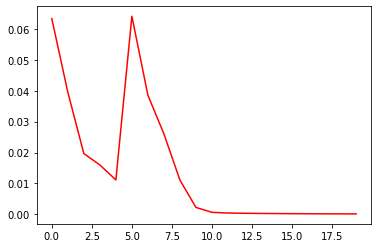

In [15]:
# train the parameters
history = modeloCNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data=(X_test,y_test) )

# evaluate accuracy
train_acc = modeloCNN.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [16]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                              

### 1.3.1.- Modelo CNN 2

###### Definición del Modelo CNN 2

In [19]:
###### Definición del Modelo y Capas
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0013), metrics=['accuracy'])

Epoch 1/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.6539 - accuracy: 0.6103
Epoch 2/20
1094/1094 [==============================] - 16s 14ms/step - loss: 0.5868 - accuracy: 0.6888
Epoch 3/20
1094/1094 [==============================] - 16s 15ms/step - loss: 0.5245 - accuracy: 0.7418
Epoch 4/20
1094/1094 [==============================] - 16s 15ms/step - loss: 0.4838 - accuracy: 0.7659
Epoch 5/20
1094/1094 [==============================] - 18s 16ms/step - loss: 0.4528 - accuracy: 0.7858
Epoch 6/20
1094/1094 [==============================] - 20s 18ms/step - loss: 0.4315 - accuracy: 0.8013
Epoch 7/20
1094/1094 [==============================] - 21s 19ms/step - loss: 0.4087 - accuracy: 0.8130
Epoch 8/20
1094/1094 [==============================] - 20s 19ms/step - loss: 0.3888 - accuracy: 0.8238
Epoch 9/20
1094/1094 [==============================] - 19s 18ms/step - loss: 0.3656 - accuracy: 0.8368
Epoch 10/20
1094/1094 [==============================] - 21s 19m

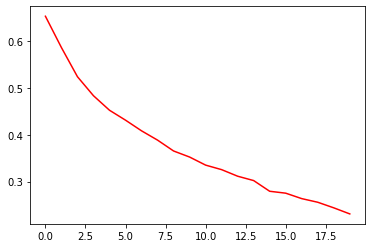

In [20]:
# train the parameters
history = modeloCNN2.fit(X_train, y_train, epochs=epochs, batch_size=16)

# evaluate accuracy
train_acc = modeloCNN2.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN2.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [21]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 128)         73856     
                                            

(199, 187, 3)


(199, 187)

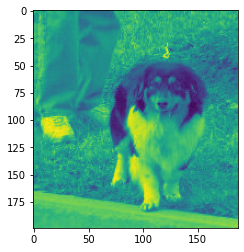

In [102]:


img = Image.open(folder + 'dog.' + str(i) + '.jpg')
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
image = imread('test_gray.jpg')
pyplot.imshow(image)
image.shape

In [104]:
from PIL import Image

imgGrays = list()
labelsGray = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    photo = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #image = imread(folder + file)
    
    #pyplot.imshow(image)
    imgGray = img.convert('L')
    imgGray = img_to_array(imgGray)
    imgGrays.append(imgGray)
    if file.startswith('dog'):
        labelGray = 1.0
        labelsGray.append(label)
    if file.startswith('cat'):
        labelGray = 0.0
        labelsGray.append(labelGray)
imgGrays = asarray(imgGrays)
labelsGray = asarray(labelsGray)
print(imgGrays.shape, labelsGray.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10235.jpg
dogs-vs-cats/train/cat.10236.jpg
dogs-vs-cats/train/cat.10237.jpg
dogs-vs-cats/train/cat.10238.jpg
dogs-vs-cats/train/cat.10239.jpg
dogs-vs-cats/train/cat.1024.jpg
dogs-vs-cats/train/cat.10240.jpg
dogs-vs-cats/train/cat.10241.jpg
dogs-vs-cats/train/cat.10242.jpg
dogs-vs-cats/train/cat.10243.jpg
dogs-vs-cats/train/cat.10244.jpg
dogs-vs-cats/train/cat.10245.jpg
dogs-vs-cats/train/cat.10246.jpg
dogs-vs-cats/train/cat.10247.jpg
dogs-vs-cats/train/cat.10248.jpg
dogs-vs-cats/train/cat.10249.jpg
dogs-vs-cats/train/cat.1025.jpg
dogs-vs-cats/train/cat.10250.jpg
dogs-vs-cats/train/cat.10251.jpg
dogs-vs-cats/train/cat.10252.jpg
dogs-vs-cats/train/cat.10253.jpg
dogs-vs-cats/train/cat.10254.jpg
dogs-vs-cats/train/cat.10255.jpg
dogs-vs-cats/train/cat.10256.jpg
dogs-vs-cats/train/cat.10257.jpg
dogs-vs-cats/train/cat.10258.jpg
dogs-vs-cats/train/cat.10259.jpg
dogs-vs-cats/train/cat.1026.jpg
dogs-vs-cats/train/cat.10260.jpg
dogs-vs-cats/train/cat.10261.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.1049.jpg
dogs-vs-cats/train/cat.10490.jpg
dogs-vs-cats/train/cat.10491.jpg
dogs-vs-cats/train/cat.10492.jpg
dogs-vs-cats/train/cat.10493.jpg
dogs-vs-cats/train/cat.10494.jpg
dogs-vs-cats/train/cat.10495.jpg
dogs-vs-cats/train/cat.10496.jpg
dogs-vs-cats/train/cat.10497.jpg
dogs-vs-cats/train/cat.10498.jpg
dogs-vs-cats/train/cat.10499.jpg
dogs-vs-cats/train/cat.105.jpg
dogs-vs-cats/train/cat.1050.jpg
dogs-vs-cats/train/cat.10500.jpg
dogs-vs-cats/train/cat.10501.jpg
dogs-vs-cats/train/cat.10502.jpg
dogs-vs-cats/train/cat.10503.jpg
dogs-vs-cats/train/cat.10504.jpg
dogs-vs-cats/train/cat.10505.jpg
dogs-vs-cats/train/cat.10506.jpg
dogs-vs-cats/train/cat.10507.jpg
dogs-vs-cats/train/cat.10508.jpg
dogs-vs-cats/train/cat.10509.jpg
dogs-vs-cats/train/cat.1051.jpg
dogs-vs-cats/train/cat.10510.jpg
dogs-vs-cats/train/cat.10511.jpg
dogs-vs-cats/train/cat.10512.jpg
dogs-vs-cats/train/cat.10513.jpg
dogs-vs-cats/train/cat.10514.jpg
dogs-vs-cats/train/cat.10515.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.10729.jpg
dogs-vs-cats/train/cat.1073.jpg
dogs-vs-cats/train/cat.10730.jpg
dogs-vs-cats/train/cat.10731.jpg
dogs-vs-cats/train/cat.10732.jpg
dogs-vs-cats/train/cat.10733.jpg
dogs-vs-cats/train/cat.10734.jpg
dogs-vs-cats/train/cat.10735.jpg
dogs-vs-cats/train/cat.10736.jpg
dogs-vs-cats/train/cat.10737.jpg
dogs-vs-cats/train/cat.10738.jpg
dogs-vs-cats/train/cat.10739.jpg
dogs-vs-cats/train/cat.1074.jpg
dogs-vs-cats/train/cat.10740.jpg
dogs-vs-cats/train/cat.10741.jpg
dogs-vs-cats/train/cat.10742.jpg
dogs-vs-cats/train/cat.10743.jpg
dogs-vs-cats/train/cat.10744.jpg
dogs-vs-cats/train/cat.10745.jpg
dogs-vs-cats/train/cat.10746.jpg
dogs-vs-cats/train/cat.10747.jpg
dogs-vs-cats/train/cat.10748.jpg
dogs-vs-cats/train/cat.10749.jpg
dogs-vs-cats/train/cat.1075.jpg
dogs-vs-cats/train/cat.10750.jpg
dogs-vs-cats/train/cat.10751.jpg
dogs-vs-cats/train/cat.10752.jpg
dogs-vs-cats/train/cat.10753.jpg
dogs-vs-cats/train/cat.10754.jpg
dogs-vs-cats/train/cat.10755.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10977.jpg
dogs-vs-cats/train/cat.10978.jpg
dogs-vs-cats/train/cat.10979.jpg
dogs-vs-cats/train/cat.1098.jpg
dogs-vs-cats/train/cat.10980.jpg
dogs-vs-cats/train/cat.10981.jpg
dogs-vs-cats/train/cat.10982.jpg
dogs-vs-cats/train/cat.10983.jpg
dogs-vs-cats/train/cat.10984.jpg
dogs-vs-cats/train/cat.10985.jpg
dogs-vs-cats/train/cat.10986.jpg
dogs-vs-cats/train/cat.10987.jpg
dogs-vs-cats/train/cat.10988.jpg
dogs-vs-cats/train/cat.10989.jpg
dogs-vs-cats/train/cat.1099.jpg
dogs-vs-cats/train/cat.10990.jpg
dogs-vs-cats/train/cat.10991.jpg
dogs-vs-cats/train/cat.10992.jpg
dogs-vs-cats/train/cat.10993.jpg
dogs-vs-cats/train/cat.10994.jpg
dogs-vs-cats/train/cat.10995.jpg
dogs-vs-cats/train/cat.10996.jpg
dogs-vs-cats/train/cat.10997.jpg
dogs-vs-cats/train/cat.10998.jpg
dogs-vs-cats/train/cat.10999.jpg
dogs-vs-cats/train/cat.11.jpg
dogs-vs-cats/train/cat.110.jpg
dogs-vs-cats/train/cat.1100.jpg
dogs-vs-cats/train/cat.11000.jpg
dogs-vs-cats/train/cat.11001.jpg
dogs-vs-cats/train

dogs-vs-cats/train/cat.11235.jpg
dogs-vs-cats/train/cat.11236.jpg
dogs-vs-cats/train/cat.11237.jpg
dogs-vs-cats/train/cat.11238.jpg
dogs-vs-cats/train/cat.11239.jpg
dogs-vs-cats/train/cat.1124.jpg
dogs-vs-cats/train/cat.11240.jpg
dogs-vs-cats/train/cat.11241.jpg
dogs-vs-cats/train/cat.11242.jpg
dogs-vs-cats/train/cat.11243.jpg
dogs-vs-cats/train/cat.11244.jpg
dogs-vs-cats/train/cat.11245.jpg
dogs-vs-cats/train/cat.11246.jpg
dogs-vs-cats/train/cat.11247.jpg
dogs-vs-cats/train/cat.11248.jpg
dogs-vs-cats/train/cat.11249.jpg
dogs-vs-cats/train/cat.1125.jpg
dogs-vs-cats/train/cat.11250.jpg
dogs-vs-cats/train/cat.11251.jpg
dogs-vs-cats/train/cat.11252.jpg
dogs-vs-cats/train/cat.11253.jpg
dogs-vs-cats/train/cat.11254.jpg
dogs-vs-cats/train/cat.11255.jpg
dogs-vs-cats/train/cat.11256.jpg
dogs-vs-cats/train/cat.11257.jpg
dogs-vs-cats/train/cat.11258.jpg
dogs-vs-cats/train/cat.11259.jpg
dogs-vs-cats/train/cat.1126.jpg
dogs-vs-cats/train/cat.11260.jpg
dogs-vs-cats/train/cat.11261.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11514.jpg
dogs-vs-cats/train/cat.11515.jpg
dogs-vs-cats/train/cat.11516.jpg
dogs-vs-cats/train/cat.11517.jpg
dogs-vs-cats/train/cat.11518.jpg
dogs-vs-cats/train/cat.11519.jpg
dogs-vs-cats/train/cat.1152.jpg
dogs-vs-cats/train/cat.11520.jpg
dogs-vs-cats/train/cat.11521.jpg
dogs-vs-cats/train/cat.11522.jpg
dogs-vs-cats/train/cat.11523.jpg
dogs-vs-cats/train/cat.11524.jpg
dogs-vs-cats/train/cat.11525.jpg
dogs-vs-cats/train/cat.11526.jpg
dogs-vs-cats/train/cat.11527.jpg
dogs-vs-cats/train/cat.11528.jpg
dogs-vs-cats/train/cat.11529.jpg
dogs-vs-cats/train/cat.1153.jpg
dogs-vs-cats/train/cat.11530.jpg
dogs-vs-cats/train/cat.11531.jpg
dogs-vs-cats/train/cat.11532.jpg
dogs-vs-cats/train/cat.11533.jpg
dogs-vs-cats/train/cat.11534.jpg
dogs-vs-cats/train/cat.11535.jpg
dogs-vs-cats/train/cat.11536.jpg
dogs-vs-cats/train/cat.11537.jpg
dogs-vs-cats/train/cat.11538.jpg
dogs-vs-cats/train/cat.11539.jpg
dogs-vs-cats/train/cat.1154.jpg
dogs-vs-cats/train/cat.11540.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11750.jpg
dogs-vs-cats/train/cat.11751.jpg
dogs-vs-cats/train/cat.11752.jpg
dogs-vs-cats/train/cat.11753.jpg
dogs-vs-cats/train/cat.11754.jpg
dogs-vs-cats/train/cat.11755.jpg
dogs-vs-cats/train/cat.11756.jpg
dogs-vs-cats/train/cat.11757.jpg
dogs-vs-cats/train/cat.11758.jpg
dogs-vs-cats/train/cat.11759.jpg
dogs-vs-cats/train/cat.1176.jpg
dogs-vs-cats/train/cat.11760.jpg
dogs-vs-cats/train/cat.11761.jpg
dogs-vs-cats/train/cat.11762.jpg
dogs-vs-cats/train/cat.11763.jpg
dogs-vs-cats/train/cat.11764.jpg
dogs-vs-cats/train/cat.11765.jpg
dogs-vs-cats/train/cat.11766.jpg
dogs-vs-cats/train/cat.11767.jpg
dogs-vs-cats/train/cat.11768.jpg
dogs-vs-cats/train/cat.11769.jpg
dogs-vs-cats/train/cat.1177.jpg
dogs-vs-cats/train/cat.11770.jpg
dogs-vs-cats/train/cat.11771.jpg
dogs-vs-cats/train/cat.11772.jpg
dogs-vs-cats/train/cat.11773.jpg
dogs-vs-cats/train/cat.11774.jpg
dogs-vs-cats/train/cat.11775.jpg
dogs-vs-cats/train/cat.11776.jpg
dogs-vs-cats/train/cat.11777.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.11986.jpg
dogs-vs-cats/train/cat.11987.jpg
dogs-vs-cats/train/cat.11988.jpg
dogs-vs-cats/train/cat.11989.jpg
dogs-vs-cats/train/cat.1199.jpg
dogs-vs-cats/train/cat.11990.jpg
dogs-vs-cats/train/cat.11991.jpg
dogs-vs-cats/train/cat.11992.jpg
dogs-vs-cats/train/cat.11993.jpg
dogs-vs-cats/train/cat.11994.jpg
dogs-vs-cats/train/cat.11995.jpg
dogs-vs-cats/train/cat.11996.jpg
dogs-vs-cats/train/cat.11997.jpg
dogs-vs-cats/train/cat.11998.jpg
dogs-vs-cats/train/cat.11999.jpg
dogs-vs-cats/train/cat.12.jpg
dogs-vs-cats/train/cat.120.jpg
dogs-vs-cats/train/cat.1200.jpg
dogs-vs-cats/train/cat.12000.jpg
dogs-vs-cats/train/cat.12001.jpg
dogs-vs-cats/train/cat.12002.jpg
dogs-vs-cats/train/cat.12003.jpg
dogs-vs-cats/train/cat.12004.jpg
dogs-vs-cats/train/cat.12005.jpg
dogs-vs-cats/train/cat.12006.jpg
dogs-vs-cats/train/cat.12007.jpg
dogs-vs-cats/train/cat.12008.jpg
dogs-vs-cats/train/cat.12009.jpg
dogs-vs-cats/train/cat.1201.jpg
dogs-vs-cats/train/cat.12010.jpg
dogs-vs-cats/train

dogs-vs-cats/train/cat.12256.jpg
dogs-vs-cats/train/cat.12257.jpg
dogs-vs-cats/train/cat.12258.jpg
dogs-vs-cats/train/cat.12259.jpg
dogs-vs-cats/train/cat.1226.jpg
dogs-vs-cats/train/cat.12260.jpg
dogs-vs-cats/train/cat.12261.jpg
dogs-vs-cats/train/cat.12262.jpg
dogs-vs-cats/train/cat.12263.jpg
dogs-vs-cats/train/cat.12264.jpg
dogs-vs-cats/train/cat.12265.jpg
dogs-vs-cats/train/cat.12266.jpg
dogs-vs-cats/train/cat.12267.jpg
dogs-vs-cats/train/cat.12268.jpg
dogs-vs-cats/train/cat.12269.jpg
dogs-vs-cats/train/cat.1227.jpg
dogs-vs-cats/train/cat.12270.jpg
dogs-vs-cats/train/cat.12271.jpg
dogs-vs-cats/train/cat.12272.jpg
dogs-vs-cats/train/cat.12273.jpg
dogs-vs-cats/train/cat.12274.jpg
dogs-vs-cats/train/cat.12275.jpg
dogs-vs-cats/train/cat.12276.jpg
dogs-vs-cats/train/cat.12277.jpg
dogs-vs-cats/train/cat.12278.jpg
dogs-vs-cats/train/cat.12279.jpg
dogs-vs-cats/train/cat.1228.jpg
dogs-vs-cats/train/cat.12280.jpg
dogs-vs-cats/train/cat.12281.jpg
dogs-vs-cats/train/cat.12282.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12481.jpg
dogs-vs-cats/train/cat.12482.jpg
dogs-vs-cats/train/cat.12483.jpg
dogs-vs-cats/train/cat.12484.jpg
dogs-vs-cats/train/cat.12485.jpg
dogs-vs-cats/train/cat.12486.jpg
dogs-vs-cats/train/cat.12487.jpg
dogs-vs-cats/train/cat.12488.jpg
dogs-vs-cats/train/cat.12489.jpg
dogs-vs-cats/train/cat.1249.jpg
dogs-vs-cats/train/cat.12490.jpg
dogs-vs-cats/train/cat.12491.jpg
dogs-vs-cats/train/cat.12492.jpg
dogs-vs-cats/train/cat.12493.jpg
dogs-vs-cats/train/cat.12494.jpg
dogs-vs-cats/train/cat.12495.jpg
dogs-vs-cats/train/cat.12496.jpg
dogs-vs-cats/train/cat.12497.jpg
dogs-vs-cats/train/cat.12498.jpg
dogs-vs-cats/train/cat.12499.jpg
dogs-vs-cats/train/cat.125.jpg
dogs-vs-cats/train/cat.1250.jpg
dogs-vs-cats/train/cat.1251.jpg
dogs-vs-cats/train/cat.1252.jpg
dogs-vs-cats/train/cat.1253.jpg
dogs-vs-cats/train/cat.1254.jpg
dogs-vs-cats/train/cat.1255.jpg
dogs-vs-cats/train/cat.1256.jpg
dogs-vs-cats/train/cat.1257.jpg
dogs-vs-cats/train/cat.1258.jpg
dogs-vs-cats/train/cat

dogs-vs-cats/train/cat.148.jpg
dogs-vs-cats/train/cat.1480.jpg
dogs-vs-cats/train/cat.1481.jpg
dogs-vs-cats/train/cat.1482.jpg
dogs-vs-cats/train/cat.1483.jpg
dogs-vs-cats/train/cat.1484.jpg
dogs-vs-cats/train/cat.1485.jpg
dogs-vs-cats/train/cat.1486.jpg
dogs-vs-cats/train/cat.1487.jpg
dogs-vs-cats/train/cat.1488.jpg
dogs-vs-cats/train/cat.1489.jpg
dogs-vs-cats/train/cat.149.jpg
dogs-vs-cats/train/cat.1490.jpg
dogs-vs-cats/train/cat.1491.jpg
dogs-vs-cats/train/cat.1492.jpg
dogs-vs-cats/train/cat.1493.jpg
dogs-vs-cats/train/cat.1494.jpg
dogs-vs-cats/train/cat.1495.jpg
dogs-vs-cats/train/cat.1496.jpg
dogs-vs-cats/train/cat.1497.jpg
dogs-vs-cats/train/cat.1498.jpg
dogs-vs-cats/train/cat.1499.jpg
dogs-vs-cats/train/cat.15.jpg
dogs-vs-cats/train/cat.150.jpg
dogs-vs-cats/train/cat.1500.jpg
dogs-vs-cats/train/cat.1501.jpg
dogs-vs-cats/train/cat.1502.jpg
dogs-vs-cats/train/cat.1503.jpg
dogs-vs-cats/train/cat.1504.jpg
dogs-vs-cats/train/cat.1505.jpg
dogs-vs-cats/train/cat.1506.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.1753.jpg
dogs-vs-cats/train/cat.1754.jpg
dogs-vs-cats/train/cat.1755.jpg
dogs-vs-cats/train/cat.1756.jpg
dogs-vs-cats/train/cat.1757.jpg
dogs-vs-cats/train/cat.1758.jpg
dogs-vs-cats/train/cat.1759.jpg
dogs-vs-cats/train/cat.176.jpg
dogs-vs-cats/train/cat.1760.jpg
dogs-vs-cats/train/cat.1761.jpg
dogs-vs-cats/train/cat.1762.jpg
dogs-vs-cats/train/cat.1763.jpg
dogs-vs-cats/train/cat.1764.jpg
dogs-vs-cats/train/cat.1765.jpg
dogs-vs-cats/train/cat.1766.jpg
dogs-vs-cats/train/cat.1767.jpg
dogs-vs-cats/train/cat.1768.jpg
dogs-vs-cats/train/cat.1769.jpg
dogs-vs-cats/train/cat.177.jpg
dogs-vs-cats/train/cat.1770.jpg
dogs-vs-cats/train/cat.1771.jpg
dogs-vs-cats/train/cat.1772.jpg
dogs-vs-cats/train/cat.1773.jpg
dogs-vs-cats/train/cat.1774.jpg
dogs-vs-cats/train/cat.1775.jpg
dogs-vs-cats/train/cat.1776.jpg
dogs-vs-cats/train/cat.1777.jpg
dogs-vs-cats/train/cat.1778.jpg
dogs-vs-cats/train/cat.1779.jpg
dogs-vs-cats/train/cat.178.jpg
dogs-vs-cats/train/cat.1780.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.1994.jpg
dogs-vs-cats/train/cat.1995.jpg
dogs-vs-cats/train/cat.1996.jpg
dogs-vs-cats/train/cat.1997.jpg
dogs-vs-cats/train/cat.1998.jpg
dogs-vs-cats/train/cat.1999.jpg
dogs-vs-cats/train/cat.2.jpg
dogs-vs-cats/train/cat.20.jpg
dogs-vs-cats/train/cat.200.jpg
dogs-vs-cats/train/cat.2000.jpg
dogs-vs-cats/train/cat.2001.jpg
dogs-vs-cats/train/cat.2002.jpg
dogs-vs-cats/train/cat.2003.jpg
dogs-vs-cats/train/cat.2004.jpg
dogs-vs-cats/train/cat.2005.jpg
dogs-vs-cats/train/cat.2006.jpg
dogs-vs-cats/train/cat.2007.jpg
dogs-vs-cats/train/cat.2008.jpg
dogs-vs-cats/train/cat.2009.jpg
dogs-vs-cats/train/cat.201.jpg
dogs-vs-cats/train/cat.2010.jpg
dogs-vs-cats/train/cat.2011.jpg
dogs-vs-cats/train/cat.2012.jpg
dogs-vs-cats/train/cat.2013.jpg
dogs-vs-cats/train/cat.2014.jpg
dogs-vs-cats/train/cat.2015.jpg
dogs-vs-cats/train/cat.2016.jpg
dogs-vs-cats/train/cat.2017.jpg
dogs-vs-cats/train/cat.2018.jpg
dogs-vs-cats/train/cat.2019.jpg
dogs-vs-cats/train/cat.202.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.2229.jpg
dogs-vs-cats/train/cat.223.jpg
dogs-vs-cats/train/cat.2230.jpg
dogs-vs-cats/train/cat.2231.jpg
dogs-vs-cats/train/cat.2232.jpg
dogs-vs-cats/train/cat.2233.jpg
dogs-vs-cats/train/cat.2234.jpg
dogs-vs-cats/train/cat.2235.jpg
dogs-vs-cats/train/cat.2236.jpg
dogs-vs-cats/train/cat.2237.jpg
dogs-vs-cats/train/cat.2238.jpg
dogs-vs-cats/train/cat.2239.jpg
dogs-vs-cats/train/cat.224.jpg
dogs-vs-cats/train/cat.2240.jpg
dogs-vs-cats/train/cat.2241.jpg
dogs-vs-cats/train/cat.2242.jpg
dogs-vs-cats/train/cat.2243.jpg
dogs-vs-cats/train/cat.2244.jpg
dogs-vs-cats/train/cat.2245.jpg
dogs-vs-cats/train/cat.2246.jpg
dogs-vs-cats/train/cat.2247.jpg
dogs-vs-cats/train/cat.2248.jpg
dogs-vs-cats/train/cat.2249.jpg
dogs-vs-cats/train/cat.225.jpg
dogs-vs-cats/train/cat.2250.jpg
dogs-vs-cats/train/cat.2251.jpg
dogs-vs-cats/train/cat.2252.jpg
dogs-vs-cats/train/cat.2253.jpg
dogs-vs-cats/train/cat.2254.jpg
dogs-vs-cats/train/cat.2255.jpg
dogs-vs-cats/train/cat.2256.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2510.jpg
dogs-vs-cats/train/cat.2511.jpg
dogs-vs-cats/train/cat.2512.jpg
dogs-vs-cats/train/cat.2513.jpg
dogs-vs-cats/train/cat.2514.jpg
dogs-vs-cats/train/cat.2515.jpg
dogs-vs-cats/train/cat.2516.jpg
dogs-vs-cats/train/cat.2517.jpg
dogs-vs-cats/train/cat.2518.jpg
dogs-vs-cats/train/cat.2519.jpg
dogs-vs-cats/train/cat.252.jpg
dogs-vs-cats/train/cat.2520.jpg
dogs-vs-cats/train/cat.2521.jpg
dogs-vs-cats/train/cat.2522.jpg
dogs-vs-cats/train/cat.2523.jpg
dogs-vs-cats/train/cat.2524.jpg
dogs-vs-cats/train/cat.2525.jpg
dogs-vs-cats/train/cat.2526.jpg
dogs-vs-cats/train/cat.2527.jpg
dogs-vs-cats/train/cat.2528.jpg
dogs-vs-cats/train/cat.2529.jpg
dogs-vs-cats/train/cat.253.jpg
dogs-vs-cats/train/cat.2530.jpg
dogs-vs-cats/train/cat.2531.jpg
dogs-vs-cats/train/cat.2532.jpg
dogs-vs-cats/train/cat.2533.jpg
dogs-vs-cats/train/cat.2534.jpg
dogs-vs-cats/train/cat.2535.jpg
dogs-vs-cats/train/cat.2536.jpg
dogs-vs-cats/train/cat.2537.jpg
dogs-vs-cats/train/cat.2538.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.2790.jpg
dogs-vs-cats/train/cat.2791.jpg
dogs-vs-cats/train/cat.2792.jpg
dogs-vs-cats/train/cat.2793.jpg
dogs-vs-cats/train/cat.2794.jpg
dogs-vs-cats/train/cat.2795.jpg
dogs-vs-cats/train/cat.2796.jpg
dogs-vs-cats/train/cat.2797.jpg
dogs-vs-cats/train/cat.2798.jpg
dogs-vs-cats/train/cat.2799.jpg
dogs-vs-cats/train/cat.28.jpg
dogs-vs-cats/train/cat.280.jpg
dogs-vs-cats/train/cat.2800.jpg
dogs-vs-cats/train/cat.2801.jpg
dogs-vs-cats/train/cat.2802.jpg
dogs-vs-cats/train/cat.2803.jpg
dogs-vs-cats/train/cat.2804.jpg
dogs-vs-cats/train/cat.2805.jpg
dogs-vs-cats/train/cat.2806.jpg
dogs-vs-cats/train/cat.2807.jpg
dogs-vs-cats/train/cat.2808.jpg
dogs-vs-cats/train/cat.2809.jpg
dogs-vs-cats/train/cat.281.jpg
dogs-vs-cats/train/cat.2810.jpg
dogs-vs-cats/train/cat.2811.jpg
dogs-vs-cats/train/cat.2812.jpg
dogs-vs-cats/train/cat.2813.jpg
dogs-vs-cats/train/cat.2814.jpg
dogs-vs-cats/train/cat.2815.jpg
dogs-vs-cats/train/cat.2816.jpg
dogs-vs-cats/train/cat.2817.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.3023.jpg
dogs-vs-cats/train/cat.3024.jpg
dogs-vs-cats/train/cat.3025.jpg
dogs-vs-cats/train/cat.3026.jpg
dogs-vs-cats/train/cat.3027.jpg
dogs-vs-cats/train/cat.3028.jpg
dogs-vs-cats/train/cat.3029.jpg
dogs-vs-cats/train/cat.303.jpg
dogs-vs-cats/train/cat.3030.jpg
dogs-vs-cats/train/cat.3031.jpg
dogs-vs-cats/train/cat.3032.jpg
dogs-vs-cats/train/cat.3033.jpg
dogs-vs-cats/train/cat.3034.jpg
dogs-vs-cats/train/cat.3035.jpg
dogs-vs-cats/train/cat.3036.jpg
dogs-vs-cats/train/cat.3037.jpg
dogs-vs-cats/train/cat.3038.jpg
dogs-vs-cats/train/cat.3039.jpg
dogs-vs-cats/train/cat.304.jpg
dogs-vs-cats/train/cat.3040.jpg
dogs-vs-cats/train/cat.3041.jpg
dogs-vs-cats/train/cat.3042.jpg
dogs-vs-cats/train/cat.3043.jpg
dogs-vs-cats/train/cat.3044.jpg
dogs-vs-cats/train/cat.3045.jpg
dogs-vs-cats/train/cat.3046.jpg
dogs-vs-cats/train/cat.3047.jpg
dogs-vs-cats/train/cat.3048.jpg
dogs-vs-cats/train/cat.3049.jpg
dogs-vs-cats/train/cat.305.jpg
dogs-vs-cats/train/cat.3050.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3275.jpg
dogs-vs-cats/train/cat.3276.jpg
dogs-vs-cats/train/cat.3277.jpg
dogs-vs-cats/train/cat.3278.jpg
dogs-vs-cats/train/cat.3279.jpg
dogs-vs-cats/train/cat.328.jpg
dogs-vs-cats/train/cat.3280.jpg
dogs-vs-cats/train/cat.3281.jpg
dogs-vs-cats/train/cat.3282.jpg
dogs-vs-cats/train/cat.3283.jpg
dogs-vs-cats/train/cat.3284.jpg
dogs-vs-cats/train/cat.3285.jpg
dogs-vs-cats/train/cat.3286.jpg
dogs-vs-cats/train/cat.3287.jpg
dogs-vs-cats/train/cat.3288.jpg
dogs-vs-cats/train/cat.3289.jpg
dogs-vs-cats/train/cat.329.jpg
dogs-vs-cats/train/cat.3290.jpg
dogs-vs-cats/train/cat.3291.jpg
dogs-vs-cats/train/cat.3292.jpg
dogs-vs-cats/train/cat.3293.jpg
dogs-vs-cats/train/cat.3294.jpg
dogs-vs-cats/train/cat.3295.jpg
dogs-vs-cats/train/cat.3296.jpg
dogs-vs-cats/train/cat.3297.jpg
dogs-vs-cats/train/cat.3298.jpg
dogs-vs-cats/train/cat.3299.jpg
dogs-vs-cats/train/cat.33.jpg
dogs-vs-cats/train/cat.330.jpg
dogs-vs-cats/train/cat.3300.jpg
dogs-vs-cats/train/cat.3301.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.3528.jpg
dogs-vs-cats/train/cat.3529.jpg
dogs-vs-cats/train/cat.353.jpg
dogs-vs-cats/train/cat.3530.jpg
dogs-vs-cats/train/cat.3531.jpg
dogs-vs-cats/train/cat.3532.jpg
dogs-vs-cats/train/cat.3533.jpg
dogs-vs-cats/train/cat.3534.jpg
dogs-vs-cats/train/cat.3535.jpg
dogs-vs-cats/train/cat.3536.jpg
dogs-vs-cats/train/cat.3537.jpg
dogs-vs-cats/train/cat.3538.jpg
dogs-vs-cats/train/cat.3539.jpg
dogs-vs-cats/train/cat.354.jpg
dogs-vs-cats/train/cat.3540.jpg
dogs-vs-cats/train/cat.3541.jpg
dogs-vs-cats/train/cat.3542.jpg
dogs-vs-cats/train/cat.3543.jpg
dogs-vs-cats/train/cat.3544.jpg
dogs-vs-cats/train/cat.3545.jpg
dogs-vs-cats/train/cat.3546.jpg
dogs-vs-cats/train/cat.3547.jpg
dogs-vs-cats/train/cat.3548.jpg
dogs-vs-cats/train/cat.3549.jpg
dogs-vs-cats/train/cat.355.jpg
dogs-vs-cats/train/cat.3550.jpg
dogs-vs-cats/train/cat.3551.jpg
dogs-vs-cats/train/cat.3552.jpg
dogs-vs-cats/train/cat.3553.jpg
dogs-vs-cats/train/cat.3554.jpg
dogs-vs-cats/train/cat.3555.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3778.jpg
dogs-vs-cats/train/cat.3779.jpg
dogs-vs-cats/train/cat.378.jpg
dogs-vs-cats/train/cat.3780.jpg
dogs-vs-cats/train/cat.3781.jpg
dogs-vs-cats/train/cat.3782.jpg
dogs-vs-cats/train/cat.3783.jpg
dogs-vs-cats/train/cat.3784.jpg
dogs-vs-cats/train/cat.3785.jpg
dogs-vs-cats/train/cat.3786.jpg
dogs-vs-cats/train/cat.3787.jpg
dogs-vs-cats/train/cat.3788.jpg
dogs-vs-cats/train/cat.3789.jpg
dogs-vs-cats/train/cat.379.jpg
dogs-vs-cats/train/cat.3790.jpg
dogs-vs-cats/train/cat.3791.jpg
dogs-vs-cats/train/cat.3792.jpg
dogs-vs-cats/train/cat.3793.jpg
dogs-vs-cats/train/cat.3794.jpg
dogs-vs-cats/train/cat.3795.jpg
dogs-vs-cats/train/cat.3796.jpg
dogs-vs-cats/train/cat.3797.jpg
dogs-vs-cats/train/cat.3798.jpg
dogs-vs-cats/train/cat.3799.jpg
dogs-vs-cats/train/cat.38.jpg
dogs-vs-cats/train/cat.380.jpg
dogs-vs-cats/train/cat.3800.jpg
dogs-vs-cats/train/cat.3801.jpg
dogs-vs-cats/train/cat.3802.jpg
dogs-vs-cats/train/cat.3803.jpg
dogs-vs-cats/train/cat.3804.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.4029.jpg
dogs-vs-cats/train/cat.403.jpg
dogs-vs-cats/train/cat.4030.jpg
dogs-vs-cats/train/cat.4031.jpg
dogs-vs-cats/train/cat.4032.jpg
dogs-vs-cats/train/cat.4033.jpg
dogs-vs-cats/train/cat.4034.jpg
dogs-vs-cats/train/cat.4035.jpg
dogs-vs-cats/train/cat.4036.jpg
dogs-vs-cats/train/cat.4037.jpg
dogs-vs-cats/train/cat.4038.jpg
dogs-vs-cats/train/cat.4039.jpg
dogs-vs-cats/train/cat.404.jpg
dogs-vs-cats/train/cat.4040.jpg
dogs-vs-cats/train/cat.4041.jpg
dogs-vs-cats/train/cat.4042.jpg
dogs-vs-cats/train/cat.4043.jpg
dogs-vs-cats/train/cat.4044.jpg
dogs-vs-cats/train/cat.4045.jpg
dogs-vs-cats/train/cat.4046.jpg
dogs-vs-cats/train/cat.4047.jpg
dogs-vs-cats/train/cat.4048.jpg
dogs-vs-cats/train/cat.4049.jpg
dogs-vs-cats/train/cat.405.jpg
dogs-vs-cats/train/cat.4050.jpg
dogs-vs-cats/train/cat.4051.jpg
dogs-vs-cats/train/cat.4052.jpg
dogs-vs-cats/train/cat.4053.jpg
dogs-vs-cats/train/cat.4054.jpg
dogs-vs-cats/train/cat.4055.jpg
dogs-vs-cats/train/cat.4056.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4260.jpg
dogs-vs-cats/train/cat.4261.jpg
dogs-vs-cats/train/cat.4262.jpg
dogs-vs-cats/train/cat.4263.jpg
dogs-vs-cats/train/cat.4264.jpg
dogs-vs-cats/train/cat.4265.jpg
dogs-vs-cats/train/cat.4266.jpg
dogs-vs-cats/train/cat.4267.jpg
dogs-vs-cats/train/cat.4268.jpg
dogs-vs-cats/train/cat.4269.jpg
dogs-vs-cats/train/cat.427.jpg
dogs-vs-cats/train/cat.4270.jpg
dogs-vs-cats/train/cat.4271.jpg
dogs-vs-cats/train/cat.4272.jpg
dogs-vs-cats/train/cat.4273.jpg
dogs-vs-cats/train/cat.4274.jpg
dogs-vs-cats/train/cat.4275.jpg
dogs-vs-cats/train/cat.4276.jpg
dogs-vs-cats/train/cat.4277.jpg
dogs-vs-cats/train/cat.4278.jpg
dogs-vs-cats/train/cat.4279.jpg
dogs-vs-cats/train/cat.428.jpg
dogs-vs-cats/train/cat.4280.jpg
dogs-vs-cats/train/cat.4281.jpg
dogs-vs-cats/train/cat.4282.jpg
dogs-vs-cats/train/cat.4283.jpg
dogs-vs-cats/train/cat.4284.jpg
dogs-vs-cats/train/cat.4285.jpg
dogs-vs-cats/train/cat.4286.jpg
dogs-vs-cats/train/cat.4287.jpg
dogs-vs-cats/train/cat.4288.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.4498.jpg
dogs-vs-cats/train/cat.4499.jpg
dogs-vs-cats/train/cat.45.jpg
dogs-vs-cats/train/cat.450.jpg
dogs-vs-cats/train/cat.4500.jpg
dogs-vs-cats/train/cat.4501.jpg
dogs-vs-cats/train/cat.4502.jpg
dogs-vs-cats/train/cat.4503.jpg
dogs-vs-cats/train/cat.4504.jpg
dogs-vs-cats/train/cat.4505.jpg
dogs-vs-cats/train/cat.4506.jpg
dogs-vs-cats/train/cat.4507.jpg
dogs-vs-cats/train/cat.4508.jpg
dogs-vs-cats/train/cat.4509.jpg
dogs-vs-cats/train/cat.451.jpg
dogs-vs-cats/train/cat.4510.jpg
dogs-vs-cats/train/cat.4511.jpg
dogs-vs-cats/train/cat.4512.jpg
dogs-vs-cats/train/cat.4513.jpg
dogs-vs-cats/train/cat.4514.jpg
dogs-vs-cats/train/cat.4515.jpg
dogs-vs-cats/train/cat.4516.jpg
dogs-vs-cats/train/cat.4517.jpg
dogs-vs-cats/train/cat.4518.jpg
dogs-vs-cats/train/cat.4519.jpg
dogs-vs-cats/train/cat.452.jpg
dogs-vs-cats/train/cat.4520.jpg
dogs-vs-cats/train/cat.4521.jpg
dogs-vs-cats/train/cat.4522.jpg
dogs-vs-cats/train/cat.4523.jpg
dogs-vs-cats/train/cat.4524.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.4749.jpg
dogs-vs-cats/train/cat.475.jpg
dogs-vs-cats/train/cat.4750.jpg
dogs-vs-cats/train/cat.4751.jpg
dogs-vs-cats/train/cat.4752.jpg
dogs-vs-cats/train/cat.4753.jpg
dogs-vs-cats/train/cat.4754.jpg
dogs-vs-cats/train/cat.4755.jpg
dogs-vs-cats/train/cat.4756.jpg
dogs-vs-cats/train/cat.4757.jpg
dogs-vs-cats/train/cat.4758.jpg
dogs-vs-cats/train/cat.4759.jpg
dogs-vs-cats/train/cat.476.jpg
dogs-vs-cats/train/cat.4760.jpg
dogs-vs-cats/train/cat.4761.jpg
dogs-vs-cats/train/cat.4762.jpg
dogs-vs-cats/train/cat.4763.jpg
dogs-vs-cats/train/cat.4764.jpg
dogs-vs-cats/train/cat.4765.jpg
dogs-vs-cats/train/cat.4766.jpg
dogs-vs-cats/train/cat.4767.jpg
dogs-vs-cats/train/cat.4768.jpg
dogs-vs-cats/train/cat.4769.jpg
dogs-vs-cats/train/cat.477.jpg
dogs-vs-cats/train/cat.4770.jpg
dogs-vs-cats/train/cat.4771.jpg
dogs-vs-cats/train/cat.4772.jpg
dogs-vs-cats/train/cat.4773.jpg
dogs-vs-cats/train/cat.4774.jpg
dogs-vs-cats/train/cat.4775.jpg
dogs-vs-cats/train/cat.4776.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4994.jpg
dogs-vs-cats/train/cat.4995.jpg
dogs-vs-cats/train/cat.4996.jpg
dogs-vs-cats/train/cat.4997.jpg
dogs-vs-cats/train/cat.4998.jpg
dogs-vs-cats/train/cat.4999.jpg
dogs-vs-cats/train/cat.5.jpg
dogs-vs-cats/train/cat.50.jpg
dogs-vs-cats/train/cat.500.jpg
dogs-vs-cats/train/cat.5000.jpg
dogs-vs-cats/train/cat.5001.jpg
dogs-vs-cats/train/cat.5002.jpg
dogs-vs-cats/train/cat.5003.jpg
dogs-vs-cats/train/cat.5004.jpg
dogs-vs-cats/train/cat.5005.jpg
dogs-vs-cats/train/cat.5006.jpg
dogs-vs-cats/train/cat.5007.jpg
dogs-vs-cats/train/cat.5008.jpg
dogs-vs-cats/train/cat.5009.jpg
dogs-vs-cats/train/cat.501.jpg
dogs-vs-cats/train/cat.5010.jpg
dogs-vs-cats/train/cat.5011.jpg
dogs-vs-cats/train/cat.5012.jpg
dogs-vs-cats/train/cat.5013.jpg
dogs-vs-cats/train/cat.5014.jpg
dogs-vs-cats/train/cat.5015.jpg
dogs-vs-cats/train/cat.5016.jpg
dogs-vs-cats/train/cat.5017.jpg
dogs-vs-cats/train/cat.5018.jpg
dogs-vs-cats/train/cat.5019.jpg
dogs-vs-cats/train/cat.502.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.5259.jpg
dogs-vs-cats/train/cat.526.jpg
dogs-vs-cats/train/cat.5260.jpg
dogs-vs-cats/train/cat.5261.jpg
dogs-vs-cats/train/cat.5262.jpg
dogs-vs-cats/train/cat.5263.jpg
dogs-vs-cats/train/cat.5264.jpg
dogs-vs-cats/train/cat.5265.jpg
dogs-vs-cats/train/cat.5266.jpg
dogs-vs-cats/train/cat.5267.jpg
dogs-vs-cats/train/cat.5268.jpg
dogs-vs-cats/train/cat.5269.jpg
dogs-vs-cats/train/cat.527.jpg
dogs-vs-cats/train/cat.5270.jpg
dogs-vs-cats/train/cat.5271.jpg
dogs-vs-cats/train/cat.5272.jpg
dogs-vs-cats/train/cat.5273.jpg
dogs-vs-cats/train/cat.5274.jpg
dogs-vs-cats/train/cat.5275.jpg
dogs-vs-cats/train/cat.5276.jpg
dogs-vs-cats/train/cat.5277.jpg
dogs-vs-cats/train/cat.5278.jpg
dogs-vs-cats/train/cat.5279.jpg
dogs-vs-cats/train/cat.528.jpg
dogs-vs-cats/train/cat.5280.jpg
dogs-vs-cats/train/cat.5281.jpg
dogs-vs-cats/train/cat.5282.jpg
dogs-vs-cats/train/cat.5283.jpg
dogs-vs-cats/train/cat.5284.jpg
dogs-vs-cats/train/cat.5285.jpg
dogs-vs-cats/train/cat.5286.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5509.jpg
dogs-vs-cats/train/cat.551.jpg
dogs-vs-cats/train/cat.5510.jpg
dogs-vs-cats/train/cat.5511.jpg
dogs-vs-cats/train/cat.5512.jpg
dogs-vs-cats/train/cat.5513.jpg
dogs-vs-cats/train/cat.5514.jpg
dogs-vs-cats/train/cat.5515.jpg
dogs-vs-cats/train/cat.5516.jpg
dogs-vs-cats/train/cat.5517.jpg
dogs-vs-cats/train/cat.5518.jpg
dogs-vs-cats/train/cat.5519.jpg
dogs-vs-cats/train/cat.552.jpg
dogs-vs-cats/train/cat.5520.jpg
dogs-vs-cats/train/cat.5521.jpg
dogs-vs-cats/train/cat.5522.jpg
dogs-vs-cats/train/cat.5523.jpg
dogs-vs-cats/train/cat.5524.jpg
dogs-vs-cats/train/cat.5525.jpg
dogs-vs-cats/train/cat.5526.jpg
dogs-vs-cats/train/cat.5527.jpg
dogs-vs-cats/train/cat.5528.jpg
dogs-vs-cats/train/cat.5529.jpg
dogs-vs-cats/train/cat.553.jpg
dogs-vs-cats/train/cat.5530.jpg
dogs-vs-cats/train/cat.5531.jpg
dogs-vs-cats/train/cat.5532.jpg
dogs-vs-cats/train/cat.5533.jpg
dogs-vs-cats/train/cat.5534.jpg
dogs-vs-cats/train/cat.5535.jpg
dogs-vs-cats/train/cat.5536.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5758.jpg
dogs-vs-cats/train/cat.5759.jpg
dogs-vs-cats/train/cat.576.jpg
dogs-vs-cats/train/cat.5760.jpg
dogs-vs-cats/train/cat.5761.jpg
dogs-vs-cats/train/cat.5762.jpg
dogs-vs-cats/train/cat.5763.jpg
dogs-vs-cats/train/cat.5764.jpg
dogs-vs-cats/train/cat.5765.jpg
dogs-vs-cats/train/cat.5766.jpg
dogs-vs-cats/train/cat.5767.jpg
dogs-vs-cats/train/cat.5768.jpg
dogs-vs-cats/train/cat.5769.jpg
dogs-vs-cats/train/cat.577.jpg
dogs-vs-cats/train/cat.5770.jpg
dogs-vs-cats/train/cat.5771.jpg
dogs-vs-cats/train/cat.5772.jpg
dogs-vs-cats/train/cat.5773.jpg
dogs-vs-cats/train/cat.5774.jpg
dogs-vs-cats/train/cat.5775.jpg
dogs-vs-cats/train/cat.5776.jpg
dogs-vs-cats/train/cat.5777.jpg
dogs-vs-cats/train/cat.5778.jpg
dogs-vs-cats/train/cat.5779.jpg
dogs-vs-cats/train/cat.578.jpg
dogs-vs-cats/train/cat.5780.jpg
dogs-vs-cats/train/cat.5781.jpg
dogs-vs-cats/train/cat.5782.jpg
dogs-vs-cats/train/cat.5783.jpg
dogs-vs-cats/train/cat.5784.jpg
dogs-vs-cats/train/cat.5785.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6017.jpg
dogs-vs-cats/train/cat.6018.jpg
dogs-vs-cats/train/cat.6019.jpg
dogs-vs-cats/train/cat.602.jpg
dogs-vs-cats/train/cat.6020.jpg
dogs-vs-cats/train/cat.6021.jpg
dogs-vs-cats/train/cat.6022.jpg
dogs-vs-cats/train/cat.6023.jpg
dogs-vs-cats/train/cat.6024.jpg
dogs-vs-cats/train/cat.6025.jpg
dogs-vs-cats/train/cat.6026.jpg
dogs-vs-cats/train/cat.6027.jpg
dogs-vs-cats/train/cat.6028.jpg
dogs-vs-cats/train/cat.6029.jpg
dogs-vs-cats/train/cat.603.jpg
dogs-vs-cats/train/cat.6030.jpg
dogs-vs-cats/train/cat.6031.jpg
dogs-vs-cats/train/cat.6032.jpg
dogs-vs-cats/train/cat.6033.jpg
dogs-vs-cats/train/cat.6034.jpg
dogs-vs-cats/train/cat.6035.jpg
dogs-vs-cats/train/cat.6036.jpg
dogs-vs-cats/train/cat.6037.jpg
dogs-vs-cats/train/cat.6038.jpg
dogs-vs-cats/train/cat.6039.jpg
dogs-vs-cats/train/cat.604.jpg
dogs-vs-cats/train/cat.6040.jpg
dogs-vs-cats/train/cat.6041.jpg
dogs-vs-cats/train/cat.6042.jpg
dogs-vs-cats/train/cat.6043.jpg
dogs-vs-cats/train/cat.6044.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6278.jpg
dogs-vs-cats/train/cat.6279.jpg
dogs-vs-cats/train/cat.628.jpg
dogs-vs-cats/train/cat.6280.jpg
dogs-vs-cats/train/cat.6281.jpg
dogs-vs-cats/train/cat.6282.jpg
dogs-vs-cats/train/cat.6283.jpg
dogs-vs-cats/train/cat.6284.jpg
dogs-vs-cats/train/cat.6285.jpg
dogs-vs-cats/train/cat.6286.jpg
dogs-vs-cats/train/cat.6287.jpg
dogs-vs-cats/train/cat.6288.jpg
dogs-vs-cats/train/cat.6289.jpg
dogs-vs-cats/train/cat.629.jpg
dogs-vs-cats/train/cat.6290.jpg
dogs-vs-cats/train/cat.6291.jpg
dogs-vs-cats/train/cat.6292.jpg
dogs-vs-cats/train/cat.6293.jpg
dogs-vs-cats/train/cat.6294.jpg
dogs-vs-cats/train/cat.6295.jpg
dogs-vs-cats/train/cat.6296.jpg
dogs-vs-cats/train/cat.6297.jpg
dogs-vs-cats/train/cat.6298.jpg
dogs-vs-cats/train/cat.6299.jpg
dogs-vs-cats/train/cat.63.jpg
dogs-vs-cats/train/cat.630.jpg
dogs-vs-cats/train/cat.6300.jpg
dogs-vs-cats/train/cat.6301.jpg
dogs-vs-cats/train/cat.6302.jpg
dogs-vs-cats/train/cat.6303.jpg
dogs-vs-cats/train/cat.6304.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.6522.jpg
dogs-vs-cats/train/cat.6523.jpg
dogs-vs-cats/train/cat.6524.jpg
dogs-vs-cats/train/cat.6525.jpg
dogs-vs-cats/train/cat.6526.jpg
dogs-vs-cats/train/cat.6527.jpg
dogs-vs-cats/train/cat.6528.jpg
dogs-vs-cats/train/cat.6529.jpg
dogs-vs-cats/train/cat.653.jpg
dogs-vs-cats/train/cat.6530.jpg
dogs-vs-cats/train/cat.6531.jpg
dogs-vs-cats/train/cat.6532.jpg
dogs-vs-cats/train/cat.6533.jpg
dogs-vs-cats/train/cat.6534.jpg
dogs-vs-cats/train/cat.6535.jpg
dogs-vs-cats/train/cat.6536.jpg
dogs-vs-cats/train/cat.6537.jpg
dogs-vs-cats/train/cat.6538.jpg
dogs-vs-cats/train/cat.6539.jpg
dogs-vs-cats/train/cat.654.jpg
dogs-vs-cats/train/cat.6540.jpg
dogs-vs-cats/train/cat.6541.jpg
dogs-vs-cats/train/cat.6542.jpg
dogs-vs-cats/train/cat.6543.jpg
dogs-vs-cats/train/cat.6544.jpg
dogs-vs-cats/train/cat.6545.jpg
dogs-vs-cats/train/cat.6546.jpg
dogs-vs-cats/train/cat.6547.jpg
dogs-vs-cats/train/cat.6548.jpg
dogs-vs-cats/train/cat.6549.jpg
dogs-vs-cats/train/cat.655.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6767.jpg
dogs-vs-cats/train/cat.6768.jpg
dogs-vs-cats/train/cat.6769.jpg
dogs-vs-cats/train/cat.677.jpg
dogs-vs-cats/train/cat.6770.jpg
dogs-vs-cats/train/cat.6771.jpg
dogs-vs-cats/train/cat.6772.jpg
dogs-vs-cats/train/cat.6773.jpg
dogs-vs-cats/train/cat.6774.jpg
dogs-vs-cats/train/cat.6775.jpg
dogs-vs-cats/train/cat.6776.jpg
dogs-vs-cats/train/cat.6777.jpg
dogs-vs-cats/train/cat.6778.jpg
dogs-vs-cats/train/cat.6779.jpg
dogs-vs-cats/train/cat.678.jpg
dogs-vs-cats/train/cat.6780.jpg
dogs-vs-cats/train/cat.6781.jpg
dogs-vs-cats/train/cat.6782.jpg
dogs-vs-cats/train/cat.6783.jpg
dogs-vs-cats/train/cat.6784.jpg
dogs-vs-cats/train/cat.6785.jpg
dogs-vs-cats/train/cat.6786.jpg
dogs-vs-cats/train/cat.6787.jpg
dogs-vs-cats/train/cat.6788.jpg
dogs-vs-cats/train/cat.6789.jpg
dogs-vs-cats/train/cat.679.jpg
dogs-vs-cats/train/cat.6790.jpg
dogs-vs-cats/train/cat.6791.jpg
dogs-vs-cats/train/cat.6792.jpg
dogs-vs-cats/train/cat.6793.jpg
dogs-vs-cats/train/cat.6794.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7016.jpg
dogs-vs-cats/train/cat.7017.jpg
dogs-vs-cats/train/cat.7018.jpg
dogs-vs-cats/train/cat.7019.jpg
dogs-vs-cats/train/cat.702.jpg
dogs-vs-cats/train/cat.7020.jpg
dogs-vs-cats/train/cat.7021.jpg
dogs-vs-cats/train/cat.7022.jpg
dogs-vs-cats/train/cat.7023.jpg
dogs-vs-cats/train/cat.7024.jpg
dogs-vs-cats/train/cat.7025.jpg
dogs-vs-cats/train/cat.7026.jpg
dogs-vs-cats/train/cat.7027.jpg
dogs-vs-cats/train/cat.7028.jpg
dogs-vs-cats/train/cat.7029.jpg
dogs-vs-cats/train/cat.703.jpg
dogs-vs-cats/train/cat.7030.jpg
dogs-vs-cats/train/cat.7031.jpg
dogs-vs-cats/train/cat.7032.jpg
dogs-vs-cats/train/cat.7033.jpg
dogs-vs-cats/train/cat.7034.jpg
dogs-vs-cats/train/cat.7035.jpg
dogs-vs-cats/train/cat.7036.jpg
dogs-vs-cats/train/cat.7037.jpg
dogs-vs-cats/train/cat.7038.jpg
dogs-vs-cats/train/cat.7039.jpg
dogs-vs-cats/train/cat.704.jpg
dogs-vs-cats/train/cat.7040.jpg
dogs-vs-cats/train/cat.7041.jpg
dogs-vs-cats/train/cat.7042.jpg
dogs-vs-cats/train/cat.7043.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7270.jpg
dogs-vs-cats/train/cat.7271.jpg
dogs-vs-cats/train/cat.7272.jpg
dogs-vs-cats/train/cat.7273.jpg
dogs-vs-cats/train/cat.7274.jpg
dogs-vs-cats/train/cat.7275.jpg
dogs-vs-cats/train/cat.7276.jpg
dogs-vs-cats/train/cat.7277.jpg
dogs-vs-cats/train/cat.7278.jpg
dogs-vs-cats/train/cat.7279.jpg
dogs-vs-cats/train/cat.728.jpg
dogs-vs-cats/train/cat.7280.jpg
dogs-vs-cats/train/cat.7281.jpg
dogs-vs-cats/train/cat.7282.jpg
dogs-vs-cats/train/cat.7283.jpg
dogs-vs-cats/train/cat.7284.jpg
dogs-vs-cats/train/cat.7285.jpg
dogs-vs-cats/train/cat.7286.jpg
dogs-vs-cats/train/cat.7287.jpg
dogs-vs-cats/train/cat.7288.jpg
dogs-vs-cats/train/cat.7289.jpg
dogs-vs-cats/train/cat.729.jpg
dogs-vs-cats/train/cat.7290.jpg
dogs-vs-cats/train/cat.7291.jpg
dogs-vs-cats/train/cat.7292.jpg
dogs-vs-cats/train/cat.7293.jpg
dogs-vs-cats/train/cat.7294.jpg
dogs-vs-cats/train/cat.7295.jpg
dogs-vs-cats/train/cat.7296.jpg
dogs-vs-cats/train/cat.7297.jpg
dogs-vs-cats/train/cat.7298.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.7528.jpg
dogs-vs-cats/train/cat.7529.jpg
dogs-vs-cats/train/cat.753.jpg
dogs-vs-cats/train/cat.7530.jpg
dogs-vs-cats/train/cat.7531.jpg
dogs-vs-cats/train/cat.7532.jpg
dogs-vs-cats/train/cat.7533.jpg
dogs-vs-cats/train/cat.7534.jpg
dogs-vs-cats/train/cat.7535.jpg
dogs-vs-cats/train/cat.7536.jpg
dogs-vs-cats/train/cat.7537.jpg
dogs-vs-cats/train/cat.7538.jpg
dogs-vs-cats/train/cat.7539.jpg
dogs-vs-cats/train/cat.754.jpg
dogs-vs-cats/train/cat.7540.jpg
dogs-vs-cats/train/cat.7541.jpg
dogs-vs-cats/train/cat.7542.jpg
dogs-vs-cats/train/cat.7543.jpg
dogs-vs-cats/train/cat.7544.jpg
dogs-vs-cats/train/cat.7545.jpg
dogs-vs-cats/train/cat.7546.jpg
dogs-vs-cats/train/cat.7547.jpg
dogs-vs-cats/train/cat.7548.jpg
dogs-vs-cats/train/cat.7549.jpg
dogs-vs-cats/train/cat.755.jpg
dogs-vs-cats/train/cat.7550.jpg
dogs-vs-cats/train/cat.7551.jpg
dogs-vs-cats/train/cat.7552.jpg
dogs-vs-cats/train/cat.7553.jpg
dogs-vs-cats/train/cat.7554.jpg
dogs-vs-cats/train/cat.7555.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7764.jpg
dogs-vs-cats/train/cat.7765.jpg
dogs-vs-cats/train/cat.7766.jpg
dogs-vs-cats/train/cat.7767.jpg
dogs-vs-cats/train/cat.7768.jpg
dogs-vs-cats/train/cat.7769.jpg
dogs-vs-cats/train/cat.777.jpg
dogs-vs-cats/train/cat.7770.jpg
dogs-vs-cats/train/cat.7771.jpg
dogs-vs-cats/train/cat.7772.jpg
dogs-vs-cats/train/cat.7773.jpg
dogs-vs-cats/train/cat.7774.jpg
dogs-vs-cats/train/cat.7775.jpg
dogs-vs-cats/train/cat.7776.jpg
dogs-vs-cats/train/cat.7777.jpg
dogs-vs-cats/train/cat.7778.jpg
dogs-vs-cats/train/cat.7779.jpg
dogs-vs-cats/train/cat.778.jpg
dogs-vs-cats/train/cat.7780.jpg
dogs-vs-cats/train/cat.7781.jpg
dogs-vs-cats/train/cat.7782.jpg
dogs-vs-cats/train/cat.7783.jpg
dogs-vs-cats/train/cat.7784.jpg
dogs-vs-cats/train/cat.7785.jpg
dogs-vs-cats/train/cat.7786.jpg
dogs-vs-cats/train/cat.7787.jpg
dogs-vs-cats/train/cat.7788.jpg
dogs-vs-cats/train/cat.7789.jpg
dogs-vs-cats/train/cat.779.jpg
dogs-vs-cats/train/cat.7790.jpg
dogs-vs-cats/train/cat.7791.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8003.jpg
dogs-vs-cats/train/cat.8004.jpg
dogs-vs-cats/train/cat.8005.jpg
dogs-vs-cats/train/cat.8006.jpg
dogs-vs-cats/train/cat.8007.jpg
dogs-vs-cats/train/cat.8008.jpg
dogs-vs-cats/train/cat.8009.jpg
dogs-vs-cats/train/cat.801.jpg
dogs-vs-cats/train/cat.8010.jpg
dogs-vs-cats/train/cat.8011.jpg
dogs-vs-cats/train/cat.8012.jpg
dogs-vs-cats/train/cat.8013.jpg
dogs-vs-cats/train/cat.8014.jpg
dogs-vs-cats/train/cat.8015.jpg
dogs-vs-cats/train/cat.8016.jpg
dogs-vs-cats/train/cat.8017.jpg
dogs-vs-cats/train/cat.8018.jpg
dogs-vs-cats/train/cat.8019.jpg
dogs-vs-cats/train/cat.802.jpg
dogs-vs-cats/train/cat.8020.jpg
dogs-vs-cats/train/cat.8021.jpg
dogs-vs-cats/train/cat.8022.jpg
dogs-vs-cats/train/cat.8023.jpg
dogs-vs-cats/train/cat.8024.jpg
dogs-vs-cats/train/cat.8025.jpg
dogs-vs-cats/train/cat.8026.jpg
dogs-vs-cats/train/cat.8027.jpg
dogs-vs-cats/train/cat.8028.jpg
dogs-vs-cats/train/cat.8029.jpg
dogs-vs-cats/train/cat.803.jpg
dogs-vs-cats/train/cat.8030.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8250.jpg
dogs-vs-cats/train/cat.8251.jpg
dogs-vs-cats/train/cat.8252.jpg
dogs-vs-cats/train/cat.8253.jpg
dogs-vs-cats/train/cat.8254.jpg
dogs-vs-cats/train/cat.8255.jpg
dogs-vs-cats/train/cat.8256.jpg
dogs-vs-cats/train/cat.8257.jpg
dogs-vs-cats/train/cat.8258.jpg
dogs-vs-cats/train/cat.8259.jpg
dogs-vs-cats/train/cat.826.jpg
dogs-vs-cats/train/cat.8260.jpg
dogs-vs-cats/train/cat.8261.jpg
dogs-vs-cats/train/cat.8262.jpg
dogs-vs-cats/train/cat.8263.jpg
dogs-vs-cats/train/cat.8264.jpg
dogs-vs-cats/train/cat.8265.jpg
dogs-vs-cats/train/cat.8266.jpg
dogs-vs-cats/train/cat.8267.jpg
dogs-vs-cats/train/cat.8268.jpg
dogs-vs-cats/train/cat.8269.jpg
dogs-vs-cats/train/cat.827.jpg
dogs-vs-cats/train/cat.8270.jpg
dogs-vs-cats/train/cat.8271.jpg
dogs-vs-cats/train/cat.8272.jpg
dogs-vs-cats/train/cat.8273.jpg
dogs-vs-cats/train/cat.8274.jpg
dogs-vs-cats/train/cat.8275.jpg
dogs-vs-cats/train/cat.8276.jpg
dogs-vs-cats/train/cat.8277.jpg
dogs-vs-cats/train/cat.8278.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.8492.jpg
dogs-vs-cats/train/cat.8493.jpg
dogs-vs-cats/train/cat.8494.jpg
dogs-vs-cats/train/cat.8495.jpg
dogs-vs-cats/train/cat.8496.jpg
dogs-vs-cats/train/cat.8497.jpg
dogs-vs-cats/train/cat.8498.jpg
dogs-vs-cats/train/cat.8499.jpg
dogs-vs-cats/train/cat.85.jpg
dogs-vs-cats/train/cat.850.jpg
dogs-vs-cats/train/cat.8500.jpg
dogs-vs-cats/train/cat.8501.jpg
dogs-vs-cats/train/cat.8502.jpg
dogs-vs-cats/train/cat.8503.jpg
dogs-vs-cats/train/cat.8504.jpg
dogs-vs-cats/train/cat.8505.jpg
dogs-vs-cats/train/cat.8506.jpg
dogs-vs-cats/train/cat.8507.jpg
dogs-vs-cats/train/cat.8508.jpg
dogs-vs-cats/train/cat.8509.jpg
dogs-vs-cats/train/cat.851.jpg
dogs-vs-cats/train/cat.8510.jpg
dogs-vs-cats/train/cat.8511.jpg
dogs-vs-cats/train/cat.8512.jpg
dogs-vs-cats/train/cat.8513.jpg
dogs-vs-cats/train/cat.8514.jpg
dogs-vs-cats/train/cat.8515.jpg
dogs-vs-cats/train/cat.8516.jpg
dogs-vs-cats/train/cat.8517.jpg
dogs-vs-cats/train/cat.8518.jpg
dogs-vs-cats/train/cat.8519.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.873.jpg
dogs-vs-cats/train/cat.8730.jpg
dogs-vs-cats/train/cat.8731.jpg
dogs-vs-cats/train/cat.8732.jpg
dogs-vs-cats/train/cat.8733.jpg
dogs-vs-cats/train/cat.8734.jpg
dogs-vs-cats/train/cat.8735.jpg
dogs-vs-cats/train/cat.8736.jpg
dogs-vs-cats/train/cat.8737.jpg
dogs-vs-cats/train/cat.8738.jpg
dogs-vs-cats/train/cat.8739.jpg
dogs-vs-cats/train/cat.874.jpg
dogs-vs-cats/train/cat.8740.jpg
dogs-vs-cats/train/cat.8741.jpg
dogs-vs-cats/train/cat.8742.jpg
dogs-vs-cats/train/cat.8743.jpg
dogs-vs-cats/train/cat.8744.jpg
dogs-vs-cats/train/cat.8745.jpg
dogs-vs-cats/train/cat.8746.jpg
dogs-vs-cats/train/cat.8747.jpg
dogs-vs-cats/train/cat.8748.jpg
dogs-vs-cats/train/cat.8749.jpg
dogs-vs-cats/train/cat.875.jpg
dogs-vs-cats/train/cat.8750.jpg
dogs-vs-cats/train/cat.8751.jpg
dogs-vs-cats/train/cat.8752.jpg
dogs-vs-cats/train/cat.8753.jpg
dogs-vs-cats/train/cat.8754.jpg
dogs-vs-cats/train/cat.8755.jpg
dogs-vs-cats/train/cat.8756.jpg
dogs-vs-cats/train/cat.8757.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8967.jpg
dogs-vs-cats/train/cat.8968.jpg
dogs-vs-cats/train/cat.8969.jpg
dogs-vs-cats/train/cat.897.jpg
dogs-vs-cats/train/cat.8970.jpg
dogs-vs-cats/train/cat.8971.jpg
dogs-vs-cats/train/cat.8972.jpg
dogs-vs-cats/train/cat.8973.jpg
dogs-vs-cats/train/cat.8974.jpg
dogs-vs-cats/train/cat.8975.jpg
dogs-vs-cats/train/cat.8976.jpg
dogs-vs-cats/train/cat.8977.jpg
dogs-vs-cats/train/cat.8978.jpg
dogs-vs-cats/train/cat.8979.jpg
dogs-vs-cats/train/cat.898.jpg
dogs-vs-cats/train/cat.8980.jpg
dogs-vs-cats/train/cat.8981.jpg
dogs-vs-cats/train/cat.8982.jpg
dogs-vs-cats/train/cat.8983.jpg
dogs-vs-cats/train/cat.8984.jpg
dogs-vs-cats/train/cat.8985.jpg
dogs-vs-cats/train/cat.8986.jpg
dogs-vs-cats/train/cat.8987.jpg
dogs-vs-cats/train/cat.8988.jpg
dogs-vs-cats/train/cat.8989.jpg
dogs-vs-cats/train/cat.899.jpg
dogs-vs-cats/train/cat.8990.jpg
dogs-vs-cats/train/cat.8991.jpg
dogs-vs-cats/train/cat.8992.jpg
dogs-vs-cats/train/cat.8993.jpg
dogs-vs-cats/train/cat.8994.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9211.jpg
dogs-vs-cats/train/cat.9212.jpg
dogs-vs-cats/train/cat.9213.jpg
dogs-vs-cats/train/cat.9214.jpg
dogs-vs-cats/train/cat.9215.jpg
dogs-vs-cats/train/cat.9216.jpg
dogs-vs-cats/train/cat.9217.jpg
dogs-vs-cats/train/cat.9218.jpg
dogs-vs-cats/train/cat.9219.jpg
dogs-vs-cats/train/cat.922.jpg
dogs-vs-cats/train/cat.9220.jpg
dogs-vs-cats/train/cat.9221.jpg
dogs-vs-cats/train/cat.9222.jpg
dogs-vs-cats/train/cat.9223.jpg
dogs-vs-cats/train/cat.9224.jpg
dogs-vs-cats/train/cat.9225.jpg
dogs-vs-cats/train/cat.9226.jpg
dogs-vs-cats/train/cat.9227.jpg
dogs-vs-cats/train/cat.9228.jpg
dogs-vs-cats/train/cat.9229.jpg
dogs-vs-cats/train/cat.923.jpg
dogs-vs-cats/train/cat.9230.jpg
dogs-vs-cats/train/cat.9231.jpg
dogs-vs-cats/train/cat.9232.jpg
dogs-vs-cats/train/cat.9233.jpg
dogs-vs-cats/train/cat.9234.jpg
dogs-vs-cats/train/cat.9235.jpg
dogs-vs-cats/train/cat.9236.jpg
dogs-vs-cats/train/cat.9237.jpg
dogs-vs-cats/train/cat.9238.jpg
dogs-vs-cats/train/cat.9239.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.9460.jpg
dogs-vs-cats/train/cat.9461.jpg
dogs-vs-cats/train/cat.9462.jpg
dogs-vs-cats/train/cat.9463.jpg
dogs-vs-cats/train/cat.9464.jpg
dogs-vs-cats/train/cat.9465.jpg
dogs-vs-cats/train/cat.9466.jpg
dogs-vs-cats/train/cat.9467.jpg
dogs-vs-cats/train/cat.9468.jpg
dogs-vs-cats/train/cat.9469.jpg
dogs-vs-cats/train/cat.947.jpg
dogs-vs-cats/train/cat.9470.jpg
dogs-vs-cats/train/cat.9471.jpg
dogs-vs-cats/train/cat.9472.jpg
dogs-vs-cats/train/cat.9473.jpg
dogs-vs-cats/train/cat.9474.jpg
dogs-vs-cats/train/cat.9475.jpg
dogs-vs-cats/train/cat.9476.jpg
dogs-vs-cats/train/cat.9477.jpg
dogs-vs-cats/train/cat.9478.jpg
dogs-vs-cats/train/cat.9479.jpg
dogs-vs-cats/train/cat.948.jpg
dogs-vs-cats/train/cat.9480.jpg
dogs-vs-cats/train/cat.9481.jpg
dogs-vs-cats/train/cat.9482.jpg
dogs-vs-cats/train/cat.9483.jpg
dogs-vs-cats/train/cat.9484.jpg
dogs-vs-cats/train/cat.9485.jpg
dogs-vs-cats/train/cat.9486.jpg
dogs-vs-cats/train/cat.9487.jpg
dogs-vs-cats/train/cat.9488.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.9713.jpg
dogs-vs-cats/train/cat.9714.jpg
dogs-vs-cats/train/cat.9715.jpg
dogs-vs-cats/train/cat.9716.jpg
dogs-vs-cats/train/cat.9717.jpg
dogs-vs-cats/train/cat.9718.jpg
dogs-vs-cats/train/cat.9719.jpg
dogs-vs-cats/train/cat.972.jpg
dogs-vs-cats/train/cat.9720.jpg
dogs-vs-cats/train/cat.9721.jpg
dogs-vs-cats/train/cat.9722.jpg
dogs-vs-cats/train/cat.9723.jpg
dogs-vs-cats/train/cat.9724.jpg
dogs-vs-cats/train/cat.9725.jpg
dogs-vs-cats/train/cat.9726.jpg
dogs-vs-cats/train/cat.9727.jpg
dogs-vs-cats/train/cat.9728.jpg
dogs-vs-cats/train/cat.9729.jpg
dogs-vs-cats/train/cat.973.jpg
dogs-vs-cats/train/cat.9730.jpg
dogs-vs-cats/train/cat.9731.jpg
dogs-vs-cats/train/cat.9732.jpg
dogs-vs-cats/train/cat.9733.jpg
dogs-vs-cats/train/cat.9734.jpg
dogs-vs-cats/train/cat.9735.jpg
dogs-vs-cats/train/cat.9736.jpg
dogs-vs-cats/train/cat.9737.jpg
dogs-vs-cats/train/cat.9738.jpg
dogs-vs-cats/train/cat.9739.jpg
dogs-vs-cats/train/cat.974.jpg
dogs-vs-cats/train/cat.9740.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9948.jpg
dogs-vs-cats/train/cat.9949.jpg
dogs-vs-cats/train/cat.995.jpg
dogs-vs-cats/train/cat.9950.jpg
dogs-vs-cats/train/cat.9951.jpg
dogs-vs-cats/train/cat.9952.jpg
dogs-vs-cats/train/cat.9953.jpg
dogs-vs-cats/train/cat.9954.jpg
dogs-vs-cats/train/cat.9955.jpg
dogs-vs-cats/train/cat.9956.jpg
dogs-vs-cats/train/cat.9957.jpg
dogs-vs-cats/train/cat.9958.jpg
dogs-vs-cats/train/cat.9959.jpg
dogs-vs-cats/train/cat.996.jpg
dogs-vs-cats/train/cat.9960.jpg
dogs-vs-cats/train/cat.9961.jpg
dogs-vs-cats/train/cat.9962.jpg
dogs-vs-cats/train/cat.9963.jpg
dogs-vs-cats/train/cat.9964.jpg
dogs-vs-cats/train/cat.9965.jpg
dogs-vs-cats/train/cat.9966.jpg
dogs-vs-cats/train/cat.9967.jpg
dogs-vs-cats/train/cat.9968.jpg
dogs-vs-cats/train/cat.9969.jpg
dogs-vs-cats/train/cat.997.jpg
dogs-vs-cats/train/cat.9970.jpg
dogs-vs-cats/train/cat.9971.jpg
dogs-vs-cats/train/cat.9972.jpg
dogs-vs-cats/train/cat.9973.jpg
dogs-vs-cats/train/cat.9974.jpg
dogs-vs-cats/train/cat.9975.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.10193.jpg
dogs-vs-cats/train/dog.10194.jpg
dogs-vs-cats/train/dog.10195.jpg
dogs-vs-cats/train/dog.10196.jpg
dogs-vs-cats/train/dog.10197.jpg
dogs-vs-cats/train/dog.10198.jpg
dogs-vs-cats/train/dog.10199.jpg
dogs-vs-cats/train/dog.102.jpg
dogs-vs-cats/train/dog.1020.jpg
dogs-vs-cats/train/dog.10200.jpg
dogs-vs-cats/train/dog.10201.jpg
dogs-vs-cats/train/dog.10202.jpg
dogs-vs-cats/train/dog.10203.jpg
dogs-vs-cats/train/dog.10204.jpg
dogs-vs-cats/train/dog.10205.jpg
dogs-vs-cats/train/dog.10206.jpg
dogs-vs-cats/train/dog.10207.jpg
dogs-vs-cats/train/dog.10208.jpg
dogs-vs-cats/train/dog.10209.jpg
dogs-vs-cats/train/dog.1021.jpg
dogs-vs-cats/train/dog.10210.jpg
dogs-vs-cats/train/dog.10211.jpg
dogs-vs-cats/train/dog.10212.jpg
dogs-vs-cats/train/dog.10213.jpg
dogs-vs-cats/train/dog.10214.jpg
dogs-vs-cats/train/dog.10215.jpg
dogs-vs-cats/train/dog.10216.jpg
dogs-vs-cats/train/dog.10217.jpg
dogs-vs-cats/train/dog.10218.jpg
dogs-vs-cats/train/dog.10219.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.10445.jpg
dogs-vs-cats/train/dog.10446.jpg
dogs-vs-cats/train/dog.10447.jpg
dogs-vs-cats/train/dog.10448.jpg
dogs-vs-cats/train/dog.10449.jpg
dogs-vs-cats/train/dog.1045.jpg
dogs-vs-cats/train/dog.10450.jpg
dogs-vs-cats/train/dog.10451.jpg
dogs-vs-cats/train/dog.10452.jpg
dogs-vs-cats/train/dog.10453.jpg
dogs-vs-cats/train/dog.10454.jpg
dogs-vs-cats/train/dog.10455.jpg
dogs-vs-cats/train/dog.10456.jpg
dogs-vs-cats/train/dog.10457.jpg
dogs-vs-cats/train/dog.10458.jpg
dogs-vs-cats/train/dog.10459.jpg
dogs-vs-cats/train/dog.1046.jpg
dogs-vs-cats/train/dog.10460.jpg
dogs-vs-cats/train/dog.10461.jpg
dogs-vs-cats/train/dog.10462.jpg
dogs-vs-cats/train/dog.10463.jpg
dogs-vs-cats/train/dog.10464.jpg
dogs-vs-cats/train/dog.10465.jpg
dogs-vs-cats/train/dog.10466.jpg
dogs-vs-cats/train/dog.10467.jpg
dogs-vs-cats/train/dog.10468.jpg
dogs-vs-cats/train/dog.10469.jpg
dogs-vs-cats/train/dog.1047.jpg
dogs-vs-cats/train/dog.10470.jpg
dogs-vs-cats/train/dog.10471.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10682.jpg
dogs-vs-cats/train/dog.10683.jpg
dogs-vs-cats/train/dog.10684.jpg
dogs-vs-cats/train/dog.10685.jpg
dogs-vs-cats/train/dog.10686.jpg
dogs-vs-cats/train/dog.10687.jpg
dogs-vs-cats/train/dog.10688.jpg
dogs-vs-cats/train/dog.10689.jpg
dogs-vs-cats/train/dog.1069.jpg
dogs-vs-cats/train/dog.10690.jpg
dogs-vs-cats/train/dog.10691.jpg
dogs-vs-cats/train/dog.10692.jpg
dogs-vs-cats/train/dog.10693.jpg
dogs-vs-cats/train/dog.10694.jpg
dogs-vs-cats/train/dog.10695.jpg
dogs-vs-cats/train/dog.10696.jpg
dogs-vs-cats/train/dog.10697.jpg
dogs-vs-cats/train/dog.10698.jpg
dogs-vs-cats/train/dog.10699.jpg
dogs-vs-cats/train/dog.107.jpg
dogs-vs-cats/train/dog.1070.jpg
dogs-vs-cats/train/dog.10700.jpg
dogs-vs-cats/train/dog.10701.jpg
dogs-vs-cats/train/dog.10702.jpg
dogs-vs-cats/train/dog.10703.jpg
dogs-vs-cats/train/dog.10704.jpg
dogs-vs-cats/train/dog.10705.jpg
dogs-vs-cats/train/dog.10706.jpg
dogs-vs-cats/train/dog.10707.jpg
dogs-vs-cats/train/dog.10708.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.10938.jpg
dogs-vs-cats/train/dog.10939.jpg
dogs-vs-cats/train/dog.1094.jpg
dogs-vs-cats/train/dog.10940.jpg
dogs-vs-cats/train/dog.10941.jpg
dogs-vs-cats/train/dog.10942.jpg
dogs-vs-cats/train/dog.10943.jpg
dogs-vs-cats/train/dog.10944.jpg
dogs-vs-cats/train/dog.10945.jpg
dogs-vs-cats/train/dog.10946.jpg
dogs-vs-cats/train/dog.10947.jpg
dogs-vs-cats/train/dog.10948.jpg
dogs-vs-cats/train/dog.10949.jpg
dogs-vs-cats/train/dog.1095.jpg
dogs-vs-cats/train/dog.10950.jpg
dogs-vs-cats/train/dog.10951.jpg
dogs-vs-cats/train/dog.10952.jpg
dogs-vs-cats/train/dog.10953.jpg
dogs-vs-cats/train/dog.10954.jpg
dogs-vs-cats/train/dog.10955.jpg
dogs-vs-cats/train/dog.10956.jpg
dogs-vs-cats/train/dog.10957.jpg
dogs-vs-cats/train/dog.10958.jpg
dogs-vs-cats/train/dog.10959.jpg
dogs-vs-cats/train/dog.1096.jpg
dogs-vs-cats/train/dog.10960.jpg
dogs-vs-cats/train/dog.10961.jpg
dogs-vs-cats/train/dog.10962.jpg
dogs-vs-cats/train/dog.10963.jpg
dogs-vs-cats/train/dog.10964.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11177.jpg
dogs-vs-cats/train/dog.11178.jpg
dogs-vs-cats/train/dog.11179.jpg
dogs-vs-cats/train/dog.1118.jpg
dogs-vs-cats/train/dog.11180.jpg
dogs-vs-cats/train/dog.11181.jpg
dogs-vs-cats/train/dog.11182.jpg
dogs-vs-cats/train/dog.11183.jpg
dogs-vs-cats/train/dog.11184.jpg
dogs-vs-cats/train/dog.11185.jpg
dogs-vs-cats/train/dog.11186.jpg
dogs-vs-cats/train/dog.11187.jpg
dogs-vs-cats/train/dog.11188.jpg
dogs-vs-cats/train/dog.11189.jpg
dogs-vs-cats/train/dog.1119.jpg
dogs-vs-cats/train/dog.11190.jpg
dogs-vs-cats/train/dog.11191.jpg
dogs-vs-cats/train/dog.11192.jpg
dogs-vs-cats/train/dog.11193.jpg
dogs-vs-cats/train/dog.11194.jpg
dogs-vs-cats/train/dog.11195.jpg
dogs-vs-cats/train/dog.11196.jpg
dogs-vs-cats/train/dog.11197.jpg
dogs-vs-cats/train/dog.11198.jpg
dogs-vs-cats/train/dog.11199.jpg
dogs-vs-cats/train/dog.112.jpg
dogs-vs-cats/train/dog.1120.jpg
dogs-vs-cats/train/dog.11200.jpg
dogs-vs-cats/train/dog.11201.jpg
dogs-vs-cats/train/dog.11202.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11432.jpg
dogs-vs-cats/train/dog.11433.jpg
dogs-vs-cats/train/dog.11434.jpg
dogs-vs-cats/train/dog.11435.jpg
dogs-vs-cats/train/dog.11436.jpg
dogs-vs-cats/train/dog.11437.jpg
dogs-vs-cats/train/dog.11438.jpg
dogs-vs-cats/train/dog.11439.jpg
dogs-vs-cats/train/dog.1144.jpg
dogs-vs-cats/train/dog.11440.jpg
dogs-vs-cats/train/dog.11441.jpg
dogs-vs-cats/train/dog.11442.jpg
dogs-vs-cats/train/dog.11443.jpg
dogs-vs-cats/train/dog.11444.jpg
dogs-vs-cats/train/dog.11445.jpg
dogs-vs-cats/train/dog.11446.jpg
dogs-vs-cats/train/dog.11447.jpg
dogs-vs-cats/train/dog.11448.jpg
dogs-vs-cats/train/dog.11449.jpg
dogs-vs-cats/train/dog.1145.jpg
dogs-vs-cats/train/dog.11450.jpg
dogs-vs-cats/train/dog.11451.jpg
dogs-vs-cats/train/dog.11452.jpg
dogs-vs-cats/train/dog.11453.jpg
dogs-vs-cats/train/dog.11454.jpg
dogs-vs-cats/train/dog.11455.jpg
dogs-vs-cats/train/dog.11456.jpg
dogs-vs-cats/train/dog.11457.jpg
dogs-vs-cats/train/dog.11458.jpg
dogs-vs-cats/train/dog.11459.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.11692.jpg
dogs-vs-cats/train/dog.11693.jpg
dogs-vs-cats/train/dog.11694.jpg
dogs-vs-cats/train/dog.11695.jpg
dogs-vs-cats/train/dog.11696.jpg
dogs-vs-cats/train/dog.11697.jpg
dogs-vs-cats/train/dog.11698.jpg
dogs-vs-cats/train/dog.11699.jpg
dogs-vs-cats/train/dog.117.jpg
dogs-vs-cats/train/dog.1170.jpg
dogs-vs-cats/train/dog.11700.jpg
dogs-vs-cats/train/dog.11701.jpg
dogs-vs-cats/train/dog.11702.jpg
dogs-vs-cats/train/dog.11703.jpg
dogs-vs-cats/train/dog.11704.jpg
dogs-vs-cats/train/dog.11705.jpg
dogs-vs-cats/train/dog.11706.jpg
dogs-vs-cats/train/dog.11707.jpg
dogs-vs-cats/train/dog.11708.jpg
dogs-vs-cats/train/dog.11709.jpg
dogs-vs-cats/train/dog.1171.jpg
dogs-vs-cats/train/dog.11710.jpg
dogs-vs-cats/train/dog.11711.jpg
dogs-vs-cats/train/dog.11712.jpg
dogs-vs-cats/train/dog.11713.jpg
dogs-vs-cats/train/dog.11714.jpg
dogs-vs-cats/train/dog.11715.jpg
dogs-vs-cats/train/dog.11716.jpg
dogs-vs-cats/train/dog.11717.jpg
dogs-vs-cats/train/dog.11718.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.11937.jpg
dogs-vs-cats/train/dog.11938.jpg
dogs-vs-cats/train/dog.11939.jpg
dogs-vs-cats/train/dog.1194.jpg
dogs-vs-cats/train/dog.11940.jpg
dogs-vs-cats/train/dog.11941.jpg
dogs-vs-cats/train/dog.11942.jpg
dogs-vs-cats/train/dog.11943.jpg
dogs-vs-cats/train/dog.11944.jpg
dogs-vs-cats/train/dog.11945.jpg
dogs-vs-cats/train/dog.11946.jpg
dogs-vs-cats/train/dog.11947.jpg
dogs-vs-cats/train/dog.11948.jpg
dogs-vs-cats/train/dog.11949.jpg
dogs-vs-cats/train/dog.1195.jpg
dogs-vs-cats/train/dog.11950.jpg
dogs-vs-cats/train/dog.11951.jpg
dogs-vs-cats/train/dog.11952.jpg
dogs-vs-cats/train/dog.11953.jpg
dogs-vs-cats/train/dog.11954.jpg
dogs-vs-cats/train/dog.11955.jpg
dogs-vs-cats/train/dog.11956.jpg
dogs-vs-cats/train/dog.11957.jpg
dogs-vs-cats/train/dog.11958.jpg
dogs-vs-cats/train/dog.11959.jpg
dogs-vs-cats/train/dog.1196.jpg
dogs-vs-cats/train/dog.11960.jpg
dogs-vs-cats/train/dog.11961.jpg
dogs-vs-cats/train/dog.11962.jpg
dogs-vs-cats/train/dog.11963.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.12212.jpg
dogs-vs-cats/train/dog.12213.jpg
dogs-vs-cats/train/dog.12214.jpg
dogs-vs-cats/train/dog.12215.jpg
dogs-vs-cats/train/dog.12216.jpg
dogs-vs-cats/train/dog.12217.jpg
dogs-vs-cats/train/dog.12218.jpg
dogs-vs-cats/train/dog.12219.jpg
dogs-vs-cats/train/dog.1222.jpg
dogs-vs-cats/train/dog.12220.jpg
dogs-vs-cats/train/dog.12221.jpg
dogs-vs-cats/train/dog.12222.jpg
dogs-vs-cats/train/dog.12223.jpg
dogs-vs-cats/train/dog.12224.jpg
dogs-vs-cats/train/dog.12225.jpg
dogs-vs-cats/train/dog.12226.jpg
dogs-vs-cats/train/dog.12227.jpg
dogs-vs-cats/train/dog.12228.jpg
dogs-vs-cats/train/dog.12229.jpg
dogs-vs-cats/train/dog.1223.jpg
dogs-vs-cats/train/dog.12230.jpg
dogs-vs-cats/train/dog.12231.jpg
dogs-vs-cats/train/dog.12232.jpg
dogs-vs-cats/train/dog.12233.jpg
dogs-vs-cats/train/dog.12234.jpg
dogs-vs-cats/train/dog.12235.jpg
dogs-vs-cats/train/dog.12236.jpg
dogs-vs-cats/train/dog.12237.jpg
dogs-vs-cats/train/dog.12238.jpg
dogs-vs-cats/train/dog.12239.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.12482.jpg
dogs-vs-cats/train/dog.12483.jpg
dogs-vs-cats/train/dog.12484.jpg
dogs-vs-cats/train/dog.12485.jpg
dogs-vs-cats/train/dog.12486.jpg
dogs-vs-cats/train/dog.12487.jpg
dogs-vs-cats/train/dog.12488.jpg
dogs-vs-cats/train/dog.12489.jpg
dogs-vs-cats/train/dog.1249.jpg
dogs-vs-cats/train/dog.12490.jpg
dogs-vs-cats/train/dog.12491.jpg
dogs-vs-cats/train/dog.12492.jpg
dogs-vs-cats/train/dog.12493.jpg
dogs-vs-cats/train/dog.12494.jpg
dogs-vs-cats/train/dog.12495.jpg
dogs-vs-cats/train/dog.12496.jpg
dogs-vs-cats/train/dog.12497.jpg
dogs-vs-cats/train/dog.12498.jpg
dogs-vs-cats/train/dog.12499.jpg
dogs-vs-cats/train/dog.125.jpg
dogs-vs-cats/train/dog.1250.jpg
dogs-vs-cats/train/dog.1251.jpg
dogs-vs-cats/train/dog.1252.jpg
dogs-vs-cats/train/dog.1253.jpg
dogs-vs-cats/train/dog.1254.jpg
dogs-vs-cats/train/dog.1255.jpg
dogs-vs-cats/train/dog.1256.jpg
dogs-vs-cats/train/dog.1257.jpg
dogs-vs-cats/train/dog.1258.jpg
dogs-vs-cats/train/dog.1259.jpg
dogs-vs-cats/train/dog.

dogs-vs-cats/train/dog.1495.jpg
dogs-vs-cats/train/dog.1496.jpg
dogs-vs-cats/train/dog.1497.jpg
dogs-vs-cats/train/dog.1498.jpg
dogs-vs-cats/train/dog.1499.jpg
dogs-vs-cats/train/dog.15.jpg
dogs-vs-cats/train/dog.150.jpg
dogs-vs-cats/train/dog.1500.jpg
dogs-vs-cats/train/dog.1501.jpg
dogs-vs-cats/train/dog.1502.jpg
dogs-vs-cats/train/dog.1503.jpg
dogs-vs-cats/train/dog.1504.jpg
dogs-vs-cats/train/dog.1505.jpg
dogs-vs-cats/train/dog.1506.jpg
dogs-vs-cats/train/dog.1507.jpg
dogs-vs-cats/train/dog.1508.jpg
dogs-vs-cats/train/dog.1509.jpg
dogs-vs-cats/train/dog.151.jpg
dogs-vs-cats/train/dog.1510.jpg
dogs-vs-cats/train/dog.1511.jpg
dogs-vs-cats/train/dog.1512.jpg
dogs-vs-cats/train/dog.1513.jpg
dogs-vs-cats/train/dog.1514.jpg
dogs-vs-cats/train/dog.1515.jpg
dogs-vs-cats/train/dog.1516.jpg
dogs-vs-cats/train/dog.1517.jpg
dogs-vs-cats/train/dog.1518.jpg
dogs-vs-cats/train/dog.1519.jpg
dogs-vs-cats/train/dog.152.jpg
dogs-vs-cats/train/dog.1520.jpg
dogs-vs-cats/train/dog.1521.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1769.jpg
dogs-vs-cats/train/dog.177.jpg
dogs-vs-cats/train/dog.1770.jpg
dogs-vs-cats/train/dog.1771.jpg
dogs-vs-cats/train/dog.1772.jpg
dogs-vs-cats/train/dog.1773.jpg
dogs-vs-cats/train/dog.1774.jpg
dogs-vs-cats/train/dog.1775.jpg
dogs-vs-cats/train/dog.1776.jpg
dogs-vs-cats/train/dog.1777.jpg
dogs-vs-cats/train/dog.1778.jpg
dogs-vs-cats/train/dog.1779.jpg
dogs-vs-cats/train/dog.178.jpg
dogs-vs-cats/train/dog.1780.jpg
dogs-vs-cats/train/dog.1781.jpg
dogs-vs-cats/train/dog.1782.jpg
dogs-vs-cats/train/dog.1783.jpg
dogs-vs-cats/train/dog.1784.jpg
dogs-vs-cats/train/dog.1785.jpg
dogs-vs-cats/train/dog.1786.jpg
dogs-vs-cats/train/dog.1787.jpg
dogs-vs-cats/train/dog.1788.jpg
dogs-vs-cats/train/dog.1789.jpg
dogs-vs-cats/train/dog.179.jpg
dogs-vs-cats/train/dog.1790.jpg
dogs-vs-cats/train/dog.1791.jpg
dogs-vs-cats/train/dog.1792.jpg
dogs-vs-cats/train/dog.1793.jpg
dogs-vs-cats/train/dog.1794.jpg
dogs-vs-cats/train/dog.1795.jpg
dogs-vs-cats/train/dog.1796.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2038.jpg
dogs-vs-cats/train/dog.2039.jpg
dogs-vs-cats/train/dog.204.jpg
dogs-vs-cats/train/dog.2040.jpg
dogs-vs-cats/train/dog.2041.jpg
dogs-vs-cats/train/dog.2042.jpg
dogs-vs-cats/train/dog.2043.jpg
dogs-vs-cats/train/dog.2044.jpg
dogs-vs-cats/train/dog.2045.jpg
dogs-vs-cats/train/dog.2046.jpg
dogs-vs-cats/train/dog.2047.jpg
dogs-vs-cats/train/dog.2048.jpg
dogs-vs-cats/train/dog.2049.jpg
dogs-vs-cats/train/dog.205.jpg
dogs-vs-cats/train/dog.2050.jpg
dogs-vs-cats/train/dog.2051.jpg
dogs-vs-cats/train/dog.2052.jpg
dogs-vs-cats/train/dog.2053.jpg
dogs-vs-cats/train/dog.2054.jpg
dogs-vs-cats/train/dog.2055.jpg
dogs-vs-cats/train/dog.2056.jpg
dogs-vs-cats/train/dog.2057.jpg
dogs-vs-cats/train/dog.2058.jpg
dogs-vs-cats/train/dog.2059.jpg
dogs-vs-cats/train/dog.206.jpg
dogs-vs-cats/train/dog.2060.jpg
dogs-vs-cats/train/dog.2061.jpg
dogs-vs-cats/train/dog.2062.jpg
dogs-vs-cats/train/dog.2063.jpg
dogs-vs-cats/train/dog.2064.jpg
dogs-vs-cats/train/dog.2065.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2301.jpg
dogs-vs-cats/train/dog.2302.jpg
dogs-vs-cats/train/dog.2303.jpg
dogs-vs-cats/train/dog.2304.jpg
dogs-vs-cats/train/dog.2305.jpg
dogs-vs-cats/train/dog.2306.jpg
dogs-vs-cats/train/dog.2307.jpg
dogs-vs-cats/train/dog.2308.jpg
dogs-vs-cats/train/dog.2309.jpg
dogs-vs-cats/train/dog.231.jpg
dogs-vs-cats/train/dog.2310.jpg
dogs-vs-cats/train/dog.2311.jpg
dogs-vs-cats/train/dog.2312.jpg
dogs-vs-cats/train/dog.2313.jpg
dogs-vs-cats/train/dog.2314.jpg
dogs-vs-cats/train/dog.2315.jpg
dogs-vs-cats/train/dog.2316.jpg
dogs-vs-cats/train/dog.2317.jpg
dogs-vs-cats/train/dog.2318.jpg
dogs-vs-cats/train/dog.2319.jpg
dogs-vs-cats/train/dog.232.jpg
dogs-vs-cats/train/dog.2320.jpg
dogs-vs-cats/train/dog.2321.jpg
dogs-vs-cats/train/dog.2322.jpg
dogs-vs-cats/train/dog.2323.jpg
dogs-vs-cats/train/dog.2324.jpg
dogs-vs-cats/train/dog.2325.jpg
dogs-vs-cats/train/dog.2326.jpg
dogs-vs-cats/train/dog.2327.jpg
dogs-vs-cats/train/dog.2328.jpg
dogs-vs-cats/train/dog.2329.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.2548.jpg
dogs-vs-cats/train/dog.2549.jpg
dogs-vs-cats/train/dog.255.jpg
dogs-vs-cats/train/dog.2550.jpg
dogs-vs-cats/train/dog.2551.jpg
dogs-vs-cats/train/dog.2552.jpg
dogs-vs-cats/train/dog.2553.jpg
dogs-vs-cats/train/dog.2554.jpg
dogs-vs-cats/train/dog.2555.jpg
dogs-vs-cats/train/dog.2556.jpg
dogs-vs-cats/train/dog.2557.jpg
dogs-vs-cats/train/dog.2558.jpg
dogs-vs-cats/train/dog.2559.jpg
dogs-vs-cats/train/dog.256.jpg
dogs-vs-cats/train/dog.2560.jpg
dogs-vs-cats/train/dog.2561.jpg
dogs-vs-cats/train/dog.2562.jpg
dogs-vs-cats/train/dog.2563.jpg
dogs-vs-cats/train/dog.2564.jpg
dogs-vs-cats/train/dog.2565.jpg
dogs-vs-cats/train/dog.2566.jpg
dogs-vs-cats/train/dog.2567.jpg
dogs-vs-cats/train/dog.2568.jpg
dogs-vs-cats/train/dog.2569.jpg
dogs-vs-cats/train/dog.257.jpg
dogs-vs-cats/train/dog.2570.jpg
dogs-vs-cats/train/dog.2571.jpg
dogs-vs-cats/train/dog.2572.jpg
dogs-vs-cats/train/dog.2573.jpg
dogs-vs-cats/train/dog.2574.jpg
dogs-vs-cats/train/dog.2575.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2793.jpg
dogs-vs-cats/train/dog.2794.jpg
dogs-vs-cats/train/dog.2795.jpg
dogs-vs-cats/train/dog.2796.jpg
dogs-vs-cats/train/dog.2797.jpg
dogs-vs-cats/train/dog.2798.jpg
dogs-vs-cats/train/dog.2799.jpg
dogs-vs-cats/train/dog.28.jpg
dogs-vs-cats/train/dog.280.jpg
dogs-vs-cats/train/dog.2800.jpg
dogs-vs-cats/train/dog.2801.jpg
dogs-vs-cats/train/dog.2802.jpg
dogs-vs-cats/train/dog.2803.jpg
dogs-vs-cats/train/dog.2804.jpg
dogs-vs-cats/train/dog.2805.jpg
dogs-vs-cats/train/dog.2806.jpg
dogs-vs-cats/train/dog.2807.jpg
dogs-vs-cats/train/dog.2808.jpg
dogs-vs-cats/train/dog.2809.jpg
dogs-vs-cats/train/dog.281.jpg
dogs-vs-cats/train/dog.2810.jpg
dogs-vs-cats/train/dog.2811.jpg
dogs-vs-cats/train/dog.2812.jpg
dogs-vs-cats/train/dog.2813.jpg
dogs-vs-cats/train/dog.2814.jpg
dogs-vs-cats/train/dog.2815.jpg
dogs-vs-cats/train/dog.2816.jpg
dogs-vs-cats/train/dog.2817.jpg
dogs-vs-cats/train/dog.2818.jpg
dogs-vs-cats/train/dog.2819.jpg
dogs-vs-cats/train/dog.282.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.304.jpg
dogs-vs-cats/train/dog.3040.jpg
dogs-vs-cats/train/dog.3041.jpg
dogs-vs-cats/train/dog.3042.jpg
dogs-vs-cats/train/dog.3043.jpg
dogs-vs-cats/train/dog.3044.jpg
dogs-vs-cats/train/dog.3045.jpg
dogs-vs-cats/train/dog.3046.jpg
dogs-vs-cats/train/dog.3047.jpg
dogs-vs-cats/train/dog.3048.jpg
dogs-vs-cats/train/dog.3049.jpg
dogs-vs-cats/train/dog.305.jpg
dogs-vs-cats/train/dog.3050.jpg
dogs-vs-cats/train/dog.3051.jpg
dogs-vs-cats/train/dog.3052.jpg
dogs-vs-cats/train/dog.3053.jpg
dogs-vs-cats/train/dog.3054.jpg
dogs-vs-cats/train/dog.3055.jpg
dogs-vs-cats/train/dog.3056.jpg
dogs-vs-cats/train/dog.3057.jpg
dogs-vs-cats/train/dog.3058.jpg
dogs-vs-cats/train/dog.3059.jpg
dogs-vs-cats/train/dog.306.jpg
dogs-vs-cats/train/dog.3060.jpg
dogs-vs-cats/train/dog.3061.jpg
dogs-vs-cats/train/dog.3062.jpg
dogs-vs-cats/train/dog.3063.jpg
dogs-vs-cats/train/dog.3064.jpg
dogs-vs-cats/train/dog.3065.jpg
dogs-vs-cats/train/dog.3066.jpg
dogs-vs-cats/train/dog.3067.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3303.jpg
dogs-vs-cats/train/dog.3304.jpg
dogs-vs-cats/train/dog.3305.jpg
dogs-vs-cats/train/dog.3306.jpg
dogs-vs-cats/train/dog.3307.jpg
dogs-vs-cats/train/dog.3308.jpg
dogs-vs-cats/train/dog.3309.jpg
dogs-vs-cats/train/dog.331.jpg
dogs-vs-cats/train/dog.3310.jpg
dogs-vs-cats/train/dog.3311.jpg
dogs-vs-cats/train/dog.3312.jpg
dogs-vs-cats/train/dog.3313.jpg
dogs-vs-cats/train/dog.3314.jpg
dogs-vs-cats/train/dog.3315.jpg
dogs-vs-cats/train/dog.3316.jpg
dogs-vs-cats/train/dog.3317.jpg
dogs-vs-cats/train/dog.3318.jpg
dogs-vs-cats/train/dog.3319.jpg
dogs-vs-cats/train/dog.332.jpg
dogs-vs-cats/train/dog.3320.jpg
dogs-vs-cats/train/dog.3321.jpg
dogs-vs-cats/train/dog.3322.jpg
dogs-vs-cats/train/dog.3323.jpg
dogs-vs-cats/train/dog.3324.jpg
dogs-vs-cats/train/dog.3325.jpg
dogs-vs-cats/train/dog.3326.jpg
dogs-vs-cats/train/dog.3327.jpg
dogs-vs-cats/train/dog.3328.jpg
dogs-vs-cats/train/dog.3329.jpg
dogs-vs-cats/train/dog.333.jpg
dogs-vs-cats/train/dog.3330.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3566.jpg
dogs-vs-cats/train/dog.3567.jpg
dogs-vs-cats/train/dog.3568.jpg
dogs-vs-cats/train/dog.3569.jpg
dogs-vs-cats/train/dog.357.jpg
dogs-vs-cats/train/dog.3570.jpg
dogs-vs-cats/train/dog.3571.jpg
dogs-vs-cats/train/dog.3572.jpg
dogs-vs-cats/train/dog.3573.jpg
dogs-vs-cats/train/dog.3574.jpg
dogs-vs-cats/train/dog.3575.jpg
dogs-vs-cats/train/dog.3576.jpg
dogs-vs-cats/train/dog.3577.jpg
dogs-vs-cats/train/dog.3578.jpg
dogs-vs-cats/train/dog.3579.jpg
dogs-vs-cats/train/dog.358.jpg
dogs-vs-cats/train/dog.3580.jpg
dogs-vs-cats/train/dog.3581.jpg
dogs-vs-cats/train/dog.3582.jpg
dogs-vs-cats/train/dog.3583.jpg
dogs-vs-cats/train/dog.3584.jpg
dogs-vs-cats/train/dog.3585.jpg
dogs-vs-cats/train/dog.3586.jpg
dogs-vs-cats/train/dog.3587.jpg
dogs-vs-cats/train/dog.3588.jpg
dogs-vs-cats/train/dog.3589.jpg
dogs-vs-cats/train/dog.359.jpg
dogs-vs-cats/train/dog.3590.jpg
dogs-vs-cats/train/dog.3591.jpg
dogs-vs-cats/train/dog.3592.jpg
dogs-vs-cats/train/dog.3593.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3827.jpg
dogs-vs-cats/train/dog.3828.jpg
dogs-vs-cats/train/dog.3829.jpg
dogs-vs-cats/train/dog.383.jpg
dogs-vs-cats/train/dog.3830.jpg
dogs-vs-cats/train/dog.3831.jpg
dogs-vs-cats/train/dog.3832.jpg
dogs-vs-cats/train/dog.3833.jpg
dogs-vs-cats/train/dog.3834.jpg
dogs-vs-cats/train/dog.3835.jpg
dogs-vs-cats/train/dog.3836.jpg
dogs-vs-cats/train/dog.3837.jpg
dogs-vs-cats/train/dog.3838.jpg
dogs-vs-cats/train/dog.3839.jpg
dogs-vs-cats/train/dog.384.jpg
dogs-vs-cats/train/dog.3840.jpg
dogs-vs-cats/train/dog.3841.jpg
dogs-vs-cats/train/dog.3842.jpg
dogs-vs-cats/train/dog.3843.jpg
dogs-vs-cats/train/dog.3844.jpg
dogs-vs-cats/train/dog.3845.jpg
dogs-vs-cats/train/dog.3846.jpg
dogs-vs-cats/train/dog.3847.jpg
dogs-vs-cats/train/dog.3848.jpg
dogs-vs-cats/train/dog.3849.jpg
dogs-vs-cats/train/dog.385.jpg
dogs-vs-cats/train/dog.3850.jpg
dogs-vs-cats/train/dog.3851.jpg
dogs-vs-cats/train/dog.3852.jpg
dogs-vs-cats/train/dog.3853.jpg
dogs-vs-cats/train/dog.3854.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4068.jpg
dogs-vs-cats/train/dog.4069.jpg
dogs-vs-cats/train/dog.407.jpg
dogs-vs-cats/train/dog.4070.jpg
dogs-vs-cats/train/dog.4071.jpg
dogs-vs-cats/train/dog.4072.jpg
dogs-vs-cats/train/dog.4073.jpg
dogs-vs-cats/train/dog.4074.jpg
dogs-vs-cats/train/dog.4075.jpg
dogs-vs-cats/train/dog.4076.jpg
dogs-vs-cats/train/dog.4077.jpg
dogs-vs-cats/train/dog.4078.jpg
dogs-vs-cats/train/dog.4079.jpg
dogs-vs-cats/train/dog.408.jpg
dogs-vs-cats/train/dog.4080.jpg
dogs-vs-cats/train/dog.4081.jpg
dogs-vs-cats/train/dog.4082.jpg
dogs-vs-cats/train/dog.4083.jpg
dogs-vs-cats/train/dog.4084.jpg
dogs-vs-cats/train/dog.4085.jpg
dogs-vs-cats/train/dog.4086.jpg
dogs-vs-cats/train/dog.4087.jpg
dogs-vs-cats/train/dog.4088.jpg
dogs-vs-cats/train/dog.4089.jpg
dogs-vs-cats/train/dog.409.jpg
dogs-vs-cats/train/dog.4090.jpg
dogs-vs-cats/train/dog.4091.jpg
dogs-vs-cats/train/dog.4092.jpg
dogs-vs-cats/train/dog.4093.jpg
dogs-vs-cats/train/dog.4094.jpg
dogs-vs-cats/train/dog.4095.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4311.jpg
dogs-vs-cats/train/dog.4312.jpg
dogs-vs-cats/train/dog.4313.jpg
dogs-vs-cats/train/dog.4314.jpg
dogs-vs-cats/train/dog.4315.jpg
dogs-vs-cats/train/dog.4316.jpg
dogs-vs-cats/train/dog.4317.jpg
dogs-vs-cats/train/dog.4318.jpg
dogs-vs-cats/train/dog.4319.jpg
dogs-vs-cats/train/dog.432.jpg
dogs-vs-cats/train/dog.4320.jpg
dogs-vs-cats/train/dog.4321.jpg
dogs-vs-cats/train/dog.4322.jpg
dogs-vs-cats/train/dog.4323.jpg
dogs-vs-cats/train/dog.4324.jpg
dogs-vs-cats/train/dog.4325.jpg
dogs-vs-cats/train/dog.4326.jpg
dogs-vs-cats/train/dog.4327.jpg
dogs-vs-cats/train/dog.4328.jpg
dogs-vs-cats/train/dog.4329.jpg
dogs-vs-cats/train/dog.433.jpg
dogs-vs-cats/train/dog.4330.jpg
dogs-vs-cats/train/dog.4331.jpg
dogs-vs-cats/train/dog.4332.jpg
dogs-vs-cats/train/dog.4333.jpg
dogs-vs-cats/train/dog.4334.jpg
dogs-vs-cats/train/dog.4335.jpg
dogs-vs-cats/train/dog.4336.jpg
dogs-vs-cats/train/dog.4337.jpg
dogs-vs-cats/train/dog.4338.jpg
dogs-vs-cats/train/dog.4339.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.4548.jpg
dogs-vs-cats/train/dog.4549.jpg
dogs-vs-cats/train/dog.455.jpg
dogs-vs-cats/train/dog.4550.jpg
dogs-vs-cats/train/dog.4551.jpg
dogs-vs-cats/train/dog.4552.jpg
dogs-vs-cats/train/dog.4553.jpg
dogs-vs-cats/train/dog.4554.jpg
dogs-vs-cats/train/dog.4555.jpg
dogs-vs-cats/train/dog.4556.jpg
dogs-vs-cats/train/dog.4557.jpg
dogs-vs-cats/train/dog.4558.jpg
dogs-vs-cats/train/dog.4559.jpg
dogs-vs-cats/train/dog.456.jpg
dogs-vs-cats/train/dog.4560.jpg
dogs-vs-cats/train/dog.4561.jpg
dogs-vs-cats/train/dog.4562.jpg
dogs-vs-cats/train/dog.4563.jpg
dogs-vs-cats/train/dog.4564.jpg
dogs-vs-cats/train/dog.4565.jpg
dogs-vs-cats/train/dog.4566.jpg
dogs-vs-cats/train/dog.4567.jpg
dogs-vs-cats/train/dog.4568.jpg
dogs-vs-cats/train/dog.4569.jpg
dogs-vs-cats/train/dog.457.jpg
dogs-vs-cats/train/dog.4570.jpg
dogs-vs-cats/train/dog.4571.jpg
dogs-vs-cats/train/dog.4572.jpg
dogs-vs-cats/train/dog.4573.jpg
dogs-vs-cats/train/dog.4574.jpg
dogs-vs-cats/train/dog.4575.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4789.jpg
dogs-vs-cats/train/dog.479.jpg
dogs-vs-cats/train/dog.4790.jpg
dogs-vs-cats/train/dog.4791.jpg
dogs-vs-cats/train/dog.4792.jpg
dogs-vs-cats/train/dog.4793.jpg
dogs-vs-cats/train/dog.4794.jpg
dogs-vs-cats/train/dog.4795.jpg
dogs-vs-cats/train/dog.4796.jpg
dogs-vs-cats/train/dog.4797.jpg
dogs-vs-cats/train/dog.4798.jpg
dogs-vs-cats/train/dog.4799.jpg
dogs-vs-cats/train/dog.48.jpg
dogs-vs-cats/train/dog.480.jpg
dogs-vs-cats/train/dog.4800.jpg
dogs-vs-cats/train/dog.4801.jpg
dogs-vs-cats/train/dog.4802.jpg
dogs-vs-cats/train/dog.4803.jpg
dogs-vs-cats/train/dog.4804.jpg
dogs-vs-cats/train/dog.4805.jpg
dogs-vs-cats/train/dog.4806.jpg
dogs-vs-cats/train/dog.4807.jpg
dogs-vs-cats/train/dog.4808.jpg
dogs-vs-cats/train/dog.4809.jpg
dogs-vs-cats/train/dog.481.jpg
dogs-vs-cats/train/dog.4810.jpg
dogs-vs-cats/train/dog.4811.jpg
dogs-vs-cats/train/dog.4812.jpg
dogs-vs-cats/train/dog.4813.jpg
dogs-vs-cats/train/dog.4814.jpg
dogs-vs-cats/train/dog.4815.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.5021.jpg
dogs-vs-cats/train/dog.5022.jpg
dogs-vs-cats/train/dog.5023.jpg
dogs-vs-cats/train/dog.5024.jpg
dogs-vs-cats/train/dog.5025.jpg
dogs-vs-cats/train/dog.5026.jpg
dogs-vs-cats/train/dog.5027.jpg
dogs-vs-cats/train/dog.5028.jpg
dogs-vs-cats/train/dog.5029.jpg
dogs-vs-cats/train/dog.503.jpg
dogs-vs-cats/train/dog.5030.jpg
dogs-vs-cats/train/dog.5031.jpg
dogs-vs-cats/train/dog.5032.jpg
dogs-vs-cats/train/dog.5033.jpg
dogs-vs-cats/train/dog.5034.jpg
dogs-vs-cats/train/dog.5035.jpg
dogs-vs-cats/train/dog.5036.jpg
dogs-vs-cats/train/dog.5037.jpg
dogs-vs-cats/train/dog.5038.jpg
dogs-vs-cats/train/dog.5039.jpg
dogs-vs-cats/train/dog.504.jpg
dogs-vs-cats/train/dog.5040.jpg
dogs-vs-cats/train/dog.5041.jpg
dogs-vs-cats/train/dog.5042.jpg
dogs-vs-cats/train/dog.5043.jpg
dogs-vs-cats/train/dog.5044.jpg
dogs-vs-cats/train/dog.5045.jpg
dogs-vs-cats/train/dog.5046.jpg
dogs-vs-cats/train/dog.5047.jpg
dogs-vs-cats/train/dog.5048.jpg
dogs-vs-cats/train/dog.5049.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.5262.jpg
dogs-vs-cats/train/dog.5263.jpg
dogs-vs-cats/train/dog.5264.jpg
dogs-vs-cats/train/dog.5265.jpg
dogs-vs-cats/train/dog.5266.jpg
dogs-vs-cats/train/dog.5267.jpg
dogs-vs-cats/train/dog.5268.jpg
dogs-vs-cats/train/dog.5269.jpg
dogs-vs-cats/train/dog.527.jpg
dogs-vs-cats/train/dog.5270.jpg
dogs-vs-cats/train/dog.5271.jpg
dogs-vs-cats/train/dog.5272.jpg
dogs-vs-cats/train/dog.5273.jpg
dogs-vs-cats/train/dog.5274.jpg
dogs-vs-cats/train/dog.5275.jpg
dogs-vs-cats/train/dog.5276.jpg
dogs-vs-cats/train/dog.5277.jpg
dogs-vs-cats/train/dog.5278.jpg
dogs-vs-cats/train/dog.5279.jpg
dogs-vs-cats/train/dog.528.jpg
dogs-vs-cats/train/dog.5280.jpg
dogs-vs-cats/train/dog.5281.jpg
dogs-vs-cats/train/dog.5282.jpg
dogs-vs-cats/train/dog.5283.jpg
dogs-vs-cats/train/dog.5284.jpg
dogs-vs-cats/train/dog.5285.jpg
dogs-vs-cats/train/dog.5286.jpg
dogs-vs-cats/train/dog.5287.jpg
dogs-vs-cats/train/dog.5288.jpg
dogs-vs-cats/train/dog.5289.jpg
dogs-vs-cats/train/dog.529.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5509.jpg
dogs-vs-cats/train/dog.551.jpg
dogs-vs-cats/train/dog.5510.jpg
dogs-vs-cats/train/dog.5511.jpg
dogs-vs-cats/train/dog.5512.jpg
dogs-vs-cats/train/dog.5513.jpg
dogs-vs-cats/train/dog.5514.jpg
dogs-vs-cats/train/dog.5515.jpg
dogs-vs-cats/train/dog.5516.jpg
dogs-vs-cats/train/dog.5517.jpg
dogs-vs-cats/train/dog.5518.jpg
dogs-vs-cats/train/dog.5519.jpg
dogs-vs-cats/train/dog.552.jpg
dogs-vs-cats/train/dog.5520.jpg
dogs-vs-cats/train/dog.5521.jpg
dogs-vs-cats/train/dog.5522.jpg
dogs-vs-cats/train/dog.5523.jpg
dogs-vs-cats/train/dog.5524.jpg
dogs-vs-cats/train/dog.5525.jpg
dogs-vs-cats/train/dog.5526.jpg
dogs-vs-cats/train/dog.5527.jpg
dogs-vs-cats/train/dog.5528.jpg
dogs-vs-cats/train/dog.5529.jpg
dogs-vs-cats/train/dog.553.jpg
dogs-vs-cats/train/dog.5530.jpg
dogs-vs-cats/train/dog.5531.jpg
dogs-vs-cats/train/dog.5532.jpg
dogs-vs-cats/train/dog.5533.jpg
dogs-vs-cats/train/dog.5534.jpg
dogs-vs-cats/train/dog.5535.jpg
dogs-vs-cats/train/dog.5536.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5753.jpg
dogs-vs-cats/train/dog.5754.jpg
dogs-vs-cats/train/dog.5755.jpg
dogs-vs-cats/train/dog.5756.jpg
dogs-vs-cats/train/dog.5757.jpg
dogs-vs-cats/train/dog.5758.jpg
dogs-vs-cats/train/dog.5759.jpg
dogs-vs-cats/train/dog.576.jpg
dogs-vs-cats/train/dog.5760.jpg
dogs-vs-cats/train/dog.5761.jpg
dogs-vs-cats/train/dog.5762.jpg
dogs-vs-cats/train/dog.5763.jpg
dogs-vs-cats/train/dog.5764.jpg
dogs-vs-cats/train/dog.5765.jpg
dogs-vs-cats/train/dog.5766.jpg
dogs-vs-cats/train/dog.5767.jpg
dogs-vs-cats/train/dog.5768.jpg
dogs-vs-cats/train/dog.5769.jpg
dogs-vs-cats/train/dog.577.jpg
dogs-vs-cats/train/dog.5770.jpg
dogs-vs-cats/train/dog.5771.jpg
dogs-vs-cats/train/dog.5772.jpg
dogs-vs-cats/train/dog.5773.jpg
dogs-vs-cats/train/dog.5774.jpg
dogs-vs-cats/train/dog.5775.jpg
dogs-vs-cats/train/dog.5776.jpg
dogs-vs-cats/train/dog.5777.jpg
dogs-vs-cats/train/dog.5778.jpg
dogs-vs-cats/train/dog.5779.jpg
dogs-vs-cats/train/dog.578.jpg
dogs-vs-cats/train/dog.5780.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5995.jpg
dogs-vs-cats/train/dog.5996.jpg
dogs-vs-cats/train/dog.5997.jpg
dogs-vs-cats/train/dog.5998.jpg
dogs-vs-cats/train/dog.5999.jpg
dogs-vs-cats/train/dog.6.jpg
dogs-vs-cats/train/dog.60.jpg
dogs-vs-cats/train/dog.600.jpg
dogs-vs-cats/train/dog.6000.jpg
dogs-vs-cats/train/dog.6001.jpg
dogs-vs-cats/train/dog.6002.jpg
dogs-vs-cats/train/dog.6003.jpg
dogs-vs-cats/train/dog.6004.jpg
dogs-vs-cats/train/dog.6005.jpg
dogs-vs-cats/train/dog.6006.jpg
dogs-vs-cats/train/dog.6007.jpg
dogs-vs-cats/train/dog.6008.jpg
dogs-vs-cats/train/dog.6009.jpg
dogs-vs-cats/train/dog.601.jpg
dogs-vs-cats/train/dog.6010.jpg
dogs-vs-cats/train/dog.6011.jpg
dogs-vs-cats/train/dog.6012.jpg
dogs-vs-cats/train/dog.6013.jpg
dogs-vs-cats/train/dog.6014.jpg
dogs-vs-cats/train/dog.6015.jpg
dogs-vs-cats/train/dog.6016.jpg
dogs-vs-cats/train/dog.6017.jpg
dogs-vs-cats/train/dog.6018.jpg
dogs-vs-cats/train/dog.6019.jpg
dogs-vs-cats/train/dog.602.jpg
dogs-vs-cats/train/dog.6020.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/dog.6244.jpg
dogs-vs-cats/train/dog.6245.jpg
dogs-vs-cats/train/dog.6246.jpg
dogs-vs-cats/train/dog.6247.jpg
dogs-vs-cats/train/dog.6248.jpg
dogs-vs-cats/train/dog.6249.jpg
dogs-vs-cats/train/dog.625.jpg
dogs-vs-cats/train/dog.6250.jpg
dogs-vs-cats/train/dog.6251.jpg
dogs-vs-cats/train/dog.6252.jpg
dogs-vs-cats/train/dog.6253.jpg
dogs-vs-cats/train/dog.6254.jpg
dogs-vs-cats/train/dog.6255.jpg
dogs-vs-cats/train/dog.6256.jpg
dogs-vs-cats/train/dog.6257.jpg
dogs-vs-cats/train/dog.6258.jpg
dogs-vs-cats/train/dog.6259.jpg
dogs-vs-cats/train/dog.626.jpg
dogs-vs-cats/train/dog.6260.jpg
dogs-vs-cats/train/dog.6261.jpg
dogs-vs-cats/train/dog.6262.jpg
dogs-vs-cats/train/dog.6263.jpg
dogs-vs-cats/train/dog.6264.jpg
dogs-vs-cats/train/dog.6265.jpg
dogs-vs-cats/train/dog.6266.jpg
dogs-vs-cats/train/dog.6267.jpg
dogs-vs-cats/train/dog.6268.jpg
dogs-vs-cats/train/dog.6269.jpg
dogs-vs-cats/train/dog.627.jpg
dogs-vs-cats/train/dog.6270.jpg
dogs-vs-cats/train/dog.6271.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6478.jpg
dogs-vs-cats/train/dog.6479.jpg
dogs-vs-cats/train/dog.648.jpg
dogs-vs-cats/train/dog.6480.jpg
dogs-vs-cats/train/dog.6481.jpg
dogs-vs-cats/train/dog.6482.jpg
dogs-vs-cats/train/dog.6483.jpg
dogs-vs-cats/train/dog.6484.jpg
dogs-vs-cats/train/dog.6485.jpg
dogs-vs-cats/train/dog.6486.jpg
dogs-vs-cats/train/dog.6487.jpg
dogs-vs-cats/train/dog.6488.jpg
dogs-vs-cats/train/dog.6489.jpg
dogs-vs-cats/train/dog.649.jpg
dogs-vs-cats/train/dog.6490.jpg
dogs-vs-cats/train/dog.6491.jpg
dogs-vs-cats/train/dog.6492.jpg
dogs-vs-cats/train/dog.6493.jpg
dogs-vs-cats/train/dog.6494.jpg
dogs-vs-cats/train/dog.6495.jpg
dogs-vs-cats/train/dog.6496.jpg
dogs-vs-cats/train/dog.6497.jpg
dogs-vs-cats/train/dog.6498.jpg
dogs-vs-cats/train/dog.6499.jpg
dogs-vs-cats/train/dog.65.jpg
dogs-vs-cats/train/dog.650.jpg
dogs-vs-cats/train/dog.6500.jpg
dogs-vs-cats/train/dog.6501.jpg
dogs-vs-cats/train/dog.6502.jpg
dogs-vs-cats/train/dog.6503.jpg
dogs-vs-cats/train/dog.6504.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.6710.jpg
dogs-vs-cats/train/dog.6711.jpg
dogs-vs-cats/train/dog.6712.jpg
dogs-vs-cats/train/dog.6713.jpg
dogs-vs-cats/train/dog.6714.jpg
dogs-vs-cats/train/dog.6715.jpg
dogs-vs-cats/train/dog.6716.jpg
dogs-vs-cats/train/dog.6717.jpg
dogs-vs-cats/train/dog.6718.jpg
dogs-vs-cats/train/dog.6719.jpg
dogs-vs-cats/train/dog.672.jpg
dogs-vs-cats/train/dog.6720.jpg
dogs-vs-cats/train/dog.6721.jpg
dogs-vs-cats/train/dog.6722.jpg
dogs-vs-cats/train/dog.6723.jpg
dogs-vs-cats/train/dog.6724.jpg
dogs-vs-cats/train/dog.6725.jpg
dogs-vs-cats/train/dog.6726.jpg
dogs-vs-cats/train/dog.6727.jpg
dogs-vs-cats/train/dog.6728.jpg
dogs-vs-cats/train/dog.6729.jpg
dogs-vs-cats/train/dog.673.jpg
dogs-vs-cats/train/dog.6730.jpg
dogs-vs-cats/train/dog.6731.jpg
dogs-vs-cats/train/dog.6732.jpg
dogs-vs-cats/train/dog.6733.jpg
dogs-vs-cats/train/dog.6734.jpg
dogs-vs-cats/train/dog.6735.jpg
dogs-vs-cats/train/dog.6736.jpg
dogs-vs-cats/train/dog.6737.jpg
dogs-vs-cats/train/dog.6738.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.6966.jpg
dogs-vs-cats/train/dog.6967.jpg
dogs-vs-cats/train/dog.6968.jpg
dogs-vs-cats/train/dog.6969.jpg
dogs-vs-cats/train/dog.697.jpg
dogs-vs-cats/train/dog.6970.jpg
dogs-vs-cats/train/dog.6971.jpg
dogs-vs-cats/train/dog.6972.jpg
dogs-vs-cats/train/dog.6973.jpg
dogs-vs-cats/train/dog.6974.jpg
dogs-vs-cats/train/dog.6975.jpg
dogs-vs-cats/train/dog.6976.jpg
dogs-vs-cats/train/dog.6977.jpg
dogs-vs-cats/train/dog.6978.jpg
dogs-vs-cats/train/dog.6979.jpg
dogs-vs-cats/train/dog.698.jpg
dogs-vs-cats/train/dog.6980.jpg
dogs-vs-cats/train/dog.6981.jpg
dogs-vs-cats/train/dog.6982.jpg
dogs-vs-cats/train/dog.6983.jpg
dogs-vs-cats/train/dog.6984.jpg
dogs-vs-cats/train/dog.6985.jpg
dogs-vs-cats/train/dog.6986.jpg
dogs-vs-cats/train/dog.6987.jpg
dogs-vs-cats/train/dog.6988.jpg
dogs-vs-cats/train/dog.6989.jpg
dogs-vs-cats/train/dog.699.jpg
dogs-vs-cats/train/dog.6990.jpg
dogs-vs-cats/train/dog.6991.jpg
dogs-vs-cats/train/dog.6992.jpg
dogs-vs-cats/train/dog.6993.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7198.jpg
dogs-vs-cats/train/dog.7199.jpg
dogs-vs-cats/train/dog.72.jpg
dogs-vs-cats/train/dog.720.jpg
dogs-vs-cats/train/dog.7200.jpg
dogs-vs-cats/train/dog.7201.jpg
dogs-vs-cats/train/dog.7202.jpg
dogs-vs-cats/train/dog.7203.jpg
dogs-vs-cats/train/dog.7204.jpg
dogs-vs-cats/train/dog.7205.jpg
dogs-vs-cats/train/dog.7206.jpg
dogs-vs-cats/train/dog.7207.jpg
dogs-vs-cats/train/dog.7208.jpg
dogs-vs-cats/train/dog.7209.jpg
dogs-vs-cats/train/dog.721.jpg
dogs-vs-cats/train/dog.7210.jpg
dogs-vs-cats/train/dog.7211.jpg
dogs-vs-cats/train/dog.7212.jpg
dogs-vs-cats/train/dog.7213.jpg
dogs-vs-cats/train/dog.7214.jpg
dogs-vs-cats/train/dog.7215.jpg
dogs-vs-cats/train/dog.7216.jpg
dogs-vs-cats/train/dog.7217.jpg
dogs-vs-cats/train/dog.7218.jpg
dogs-vs-cats/train/dog.7219.jpg
dogs-vs-cats/train/dog.722.jpg
dogs-vs-cats/train/dog.7220.jpg
dogs-vs-cats/train/dog.7221.jpg
dogs-vs-cats/train/dog.7222.jpg
dogs-vs-cats/train/dog.7223.jpg
dogs-vs-cats/train/dog.7224.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.7435.jpg
dogs-vs-cats/train/dog.7436.jpg
dogs-vs-cats/train/dog.7437.jpg
dogs-vs-cats/train/dog.7438.jpg
dogs-vs-cats/train/dog.7439.jpg
dogs-vs-cats/train/dog.744.jpg
dogs-vs-cats/train/dog.7440.jpg
dogs-vs-cats/train/dog.7441.jpg
dogs-vs-cats/train/dog.7442.jpg
dogs-vs-cats/train/dog.7443.jpg
dogs-vs-cats/train/dog.7444.jpg
dogs-vs-cats/train/dog.7445.jpg
dogs-vs-cats/train/dog.7446.jpg
dogs-vs-cats/train/dog.7447.jpg
dogs-vs-cats/train/dog.7448.jpg
dogs-vs-cats/train/dog.7449.jpg
dogs-vs-cats/train/dog.745.jpg
dogs-vs-cats/train/dog.7450.jpg
dogs-vs-cats/train/dog.7451.jpg
dogs-vs-cats/train/dog.7452.jpg
dogs-vs-cats/train/dog.7453.jpg
dogs-vs-cats/train/dog.7454.jpg
dogs-vs-cats/train/dog.7455.jpg
dogs-vs-cats/train/dog.7456.jpg
dogs-vs-cats/train/dog.7457.jpg
dogs-vs-cats/train/dog.7458.jpg
dogs-vs-cats/train/dog.7459.jpg
dogs-vs-cats/train/dog.746.jpg
dogs-vs-cats/train/dog.7460.jpg
dogs-vs-cats/train/dog.7461.jpg
dogs-vs-cats/train/dog.7462.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7678.jpg
dogs-vs-cats/train/dog.7679.jpg
dogs-vs-cats/train/dog.768.jpg
dogs-vs-cats/train/dog.7680.jpg
dogs-vs-cats/train/dog.7681.jpg
dogs-vs-cats/train/dog.7682.jpg
dogs-vs-cats/train/dog.7683.jpg
dogs-vs-cats/train/dog.7684.jpg
dogs-vs-cats/train/dog.7685.jpg
dogs-vs-cats/train/dog.7686.jpg
dogs-vs-cats/train/dog.7687.jpg
dogs-vs-cats/train/dog.7688.jpg
dogs-vs-cats/train/dog.7689.jpg
dogs-vs-cats/train/dog.769.jpg
dogs-vs-cats/train/dog.7690.jpg
dogs-vs-cats/train/dog.7691.jpg
dogs-vs-cats/train/dog.7692.jpg
dogs-vs-cats/train/dog.7693.jpg
dogs-vs-cats/train/dog.7694.jpg
dogs-vs-cats/train/dog.7695.jpg
dogs-vs-cats/train/dog.7696.jpg
dogs-vs-cats/train/dog.7697.jpg
dogs-vs-cats/train/dog.7698.jpg
dogs-vs-cats/train/dog.7699.jpg
dogs-vs-cats/train/dog.77.jpg
dogs-vs-cats/train/dog.770.jpg
dogs-vs-cats/train/dog.7700.jpg
dogs-vs-cats/train/dog.7701.jpg
dogs-vs-cats/train/dog.7702.jpg
dogs-vs-cats/train/dog.7703.jpg
dogs-vs-cats/train/dog.7704.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.791.jpg
dogs-vs-cats/train/dog.7910.jpg
dogs-vs-cats/train/dog.7911.jpg
dogs-vs-cats/train/dog.7912.jpg
dogs-vs-cats/train/dog.7913.jpg
dogs-vs-cats/train/dog.7914.jpg
dogs-vs-cats/train/dog.7915.jpg
dogs-vs-cats/train/dog.7916.jpg
dogs-vs-cats/train/dog.7917.jpg
dogs-vs-cats/train/dog.7918.jpg
dogs-vs-cats/train/dog.7919.jpg
dogs-vs-cats/train/dog.792.jpg
dogs-vs-cats/train/dog.7920.jpg
dogs-vs-cats/train/dog.7921.jpg
dogs-vs-cats/train/dog.7922.jpg
dogs-vs-cats/train/dog.7923.jpg
dogs-vs-cats/train/dog.7924.jpg
dogs-vs-cats/train/dog.7925.jpg
dogs-vs-cats/train/dog.7926.jpg
dogs-vs-cats/train/dog.7927.jpg
dogs-vs-cats/train/dog.7928.jpg
dogs-vs-cats/train/dog.7929.jpg
dogs-vs-cats/train/dog.793.jpg
dogs-vs-cats/train/dog.7930.jpg
dogs-vs-cats/train/dog.7931.jpg
dogs-vs-cats/train/dog.7932.jpg
dogs-vs-cats/train/dog.7933.jpg
dogs-vs-cats/train/dog.7934.jpg
dogs-vs-cats/train/dog.7935.jpg
dogs-vs-cats/train/dog.7936.jpg
dogs-vs-cats/train/dog.7937.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8156.jpg
dogs-vs-cats/train/dog.8157.jpg
dogs-vs-cats/train/dog.8158.jpg
dogs-vs-cats/train/dog.8159.jpg
dogs-vs-cats/train/dog.816.jpg
dogs-vs-cats/train/dog.8160.jpg
dogs-vs-cats/train/dog.8161.jpg
dogs-vs-cats/train/dog.8162.jpg
dogs-vs-cats/train/dog.8163.jpg
dogs-vs-cats/train/dog.8164.jpg
dogs-vs-cats/train/dog.8165.jpg
dogs-vs-cats/train/dog.8166.jpg
dogs-vs-cats/train/dog.8167.jpg
dogs-vs-cats/train/dog.8168.jpg
dogs-vs-cats/train/dog.8169.jpg
dogs-vs-cats/train/dog.817.jpg
dogs-vs-cats/train/dog.8170.jpg
dogs-vs-cats/train/dog.8171.jpg
dogs-vs-cats/train/dog.8172.jpg
dogs-vs-cats/train/dog.8173.jpg
dogs-vs-cats/train/dog.8174.jpg
dogs-vs-cats/train/dog.8175.jpg
dogs-vs-cats/train/dog.8176.jpg
dogs-vs-cats/train/dog.8177.jpg
dogs-vs-cats/train/dog.8178.jpg
dogs-vs-cats/train/dog.8179.jpg
dogs-vs-cats/train/dog.818.jpg
dogs-vs-cats/train/dog.8180.jpg
dogs-vs-cats/train/dog.8181.jpg
dogs-vs-cats/train/dog.8182.jpg
dogs-vs-cats/train/dog.8183.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8399.jpg
dogs-vs-cats/train/dog.84.jpg
dogs-vs-cats/train/dog.840.jpg
dogs-vs-cats/train/dog.8400.jpg
dogs-vs-cats/train/dog.8401.jpg
dogs-vs-cats/train/dog.8402.jpg
dogs-vs-cats/train/dog.8403.jpg
dogs-vs-cats/train/dog.8404.jpg
dogs-vs-cats/train/dog.8405.jpg
dogs-vs-cats/train/dog.8406.jpg
dogs-vs-cats/train/dog.8407.jpg
dogs-vs-cats/train/dog.8408.jpg
dogs-vs-cats/train/dog.8409.jpg
dogs-vs-cats/train/dog.841.jpg
dogs-vs-cats/train/dog.8410.jpg
dogs-vs-cats/train/dog.8411.jpg
dogs-vs-cats/train/dog.8412.jpg
dogs-vs-cats/train/dog.8413.jpg
dogs-vs-cats/train/dog.8414.jpg
dogs-vs-cats/train/dog.8415.jpg
dogs-vs-cats/train/dog.8416.jpg
dogs-vs-cats/train/dog.8417.jpg
dogs-vs-cats/train/dog.8418.jpg
dogs-vs-cats/train/dog.8419.jpg
dogs-vs-cats/train/dog.842.jpg
dogs-vs-cats/train/dog.8420.jpg
dogs-vs-cats/train/dog.8421.jpg
dogs-vs-cats/train/dog.8422.jpg
dogs-vs-cats/train/dog.8423.jpg
dogs-vs-cats/train/dog.8424.jpg
dogs-vs-cats/train/dog.8425.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.8649.jpg
dogs-vs-cats/train/dog.865.jpg
dogs-vs-cats/train/dog.8650.jpg
dogs-vs-cats/train/dog.8651.jpg
dogs-vs-cats/train/dog.8652.jpg
dogs-vs-cats/train/dog.8653.jpg
dogs-vs-cats/train/dog.8654.jpg
dogs-vs-cats/train/dog.8655.jpg
dogs-vs-cats/train/dog.8656.jpg
dogs-vs-cats/train/dog.8657.jpg
dogs-vs-cats/train/dog.8658.jpg
dogs-vs-cats/train/dog.8659.jpg
dogs-vs-cats/train/dog.866.jpg
dogs-vs-cats/train/dog.8660.jpg
dogs-vs-cats/train/dog.8661.jpg
dogs-vs-cats/train/dog.8662.jpg
dogs-vs-cats/train/dog.8663.jpg
dogs-vs-cats/train/dog.8664.jpg
dogs-vs-cats/train/dog.8665.jpg
dogs-vs-cats/train/dog.8666.jpg
dogs-vs-cats/train/dog.8667.jpg
dogs-vs-cats/train/dog.8668.jpg
dogs-vs-cats/train/dog.8669.jpg
dogs-vs-cats/train/dog.867.jpg
dogs-vs-cats/train/dog.8670.jpg
dogs-vs-cats/train/dog.8671.jpg
dogs-vs-cats/train/dog.8672.jpg
dogs-vs-cats/train/dog.8673.jpg
dogs-vs-cats/train/dog.8674.jpg
dogs-vs-cats/train/dog.8675.jpg
dogs-vs-cats/train/dog.8676.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8899.jpg
dogs-vs-cats/train/dog.89.jpg
dogs-vs-cats/train/dog.890.jpg
dogs-vs-cats/train/dog.8900.jpg
dogs-vs-cats/train/dog.8901.jpg
dogs-vs-cats/train/dog.8902.jpg
dogs-vs-cats/train/dog.8903.jpg
dogs-vs-cats/train/dog.8904.jpg
dogs-vs-cats/train/dog.8905.jpg
dogs-vs-cats/train/dog.8906.jpg
dogs-vs-cats/train/dog.8907.jpg
dogs-vs-cats/train/dog.8908.jpg
dogs-vs-cats/train/dog.8909.jpg
dogs-vs-cats/train/dog.891.jpg
dogs-vs-cats/train/dog.8910.jpg
dogs-vs-cats/train/dog.8911.jpg
dogs-vs-cats/train/dog.8912.jpg
dogs-vs-cats/train/dog.8913.jpg
dogs-vs-cats/train/dog.8914.jpg
dogs-vs-cats/train/dog.8915.jpg
dogs-vs-cats/train/dog.8916.jpg
dogs-vs-cats/train/dog.8917.jpg
dogs-vs-cats/train/dog.8918.jpg
dogs-vs-cats/train/dog.8919.jpg
dogs-vs-cats/train/dog.892.jpg
dogs-vs-cats/train/dog.8920.jpg
dogs-vs-cats/train/dog.8921.jpg
dogs-vs-cats/train/dog.8922.jpg
dogs-vs-cats/train/dog.8923.jpg
dogs-vs-cats/train/dog.8924.jpg
dogs-vs-cats/train/dog.8925.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.9143.jpg
dogs-vs-cats/train/dog.9144.jpg
dogs-vs-cats/train/dog.9145.jpg
dogs-vs-cats/train/dog.9146.jpg
dogs-vs-cats/train/dog.9147.jpg
dogs-vs-cats/train/dog.9148.jpg
dogs-vs-cats/train/dog.9149.jpg
dogs-vs-cats/train/dog.915.jpg
dogs-vs-cats/train/dog.9150.jpg
dogs-vs-cats/train/dog.9151.jpg
dogs-vs-cats/train/dog.9152.jpg
dogs-vs-cats/train/dog.9153.jpg
dogs-vs-cats/train/dog.9154.jpg
dogs-vs-cats/train/dog.9155.jpg
dogs-vs-cats/train/dog.9156.jpg
dogs-vs-cats/train/dog.9157.jpg
dogs-vs-cats/train/dog.9158.jpg
dogs-vs-cats/train/dog.9159.jpg
dogs-vs-cats/train/dog.916.jpg
dogs-vs-cats/train/dog.9160.jpg
dogs-vs-cats/train/dog.9161.jpg
dogs-vs-cats/train/dog.9162.jpg
dogs-vs-cats/train/dog.9163.jpg
dogs-vs-cats/train/dog.9164.jpg
dogs-vs-cats/train/dog.9165.jpg
dogs-vs-cats/train/dog.9166.jpg
dogs-vs-cats/train/dog.9167.jpg
dogs-vs-cats/train/dog.9168.jpg
dogs-vs-cats/train/dog.9169.jpg
dogs-vs-cats/train/dog.917.jpg
dogs-vs-cats/train/dog.9170.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9397.jpg
dogs-vs-cats/train/dog.9398.jpg
dogs-vs-cats/train/dog.9399.jpg
dogs-vs-cats/train/dog.94.jpg
dogs-vs-cats/train/dog.940.jpg
dogs-vs-cats/train/dog.9400.jpg
dogs-vs-cats/train/dog.9401.jpg
dogs-vs-cats/train/dog.9402.jpg
dogs-vs-cats/train/dog.9403.jpg
dogs-vs-cats/train/dog.9404.jpg
dogs-vs-cats/train/dog.9405.jpg
dogs-vs-cats/train/dog.9406.jpg
dogs-vs-cats/train/dog.9407.jpg
dogs-vs-cats/train/dog.9408.jpg
dogs-vs-cats/train/dog.9409.jpg
dogs-vs-cats/train/dog.941.jpg
dogs-vs-cats/train/dog.9410.jpg
dogs-vs-cats/train/dog.9411.jpg
dogs-vs-cats/train/dog.9412.jpg
dogs-vs-cats/train/dog.9413.jpg
dogs-vs-cats/train/dog.9414.jpg
dogs-vs-cats/train/dog.9415.jpg
dogs-vs-cats/train/dog.9416.jpg
dogs-vs-cats/train/dog.9417.jpg
dogs-vs-cats/train/dog.9418.jpg
dogs-vs-cats/train/dog.9419.jpg
dogs-vs-cats/train/dog.942.jpg
dogs-vs-cats/train/dog.9420.jpg
dogs-vs-cats/train/dog.9421.jpg
dogs-vs-cats/train/dog.9422.jpg
dogs-vs-cats/train/dog.9423.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.9635.jpg
dogs-vs-cats/train/dog.9636.jpg
dogs-vs-cats/train/dog.9637.jpg
dogs-vs-cats/train/dog.9638.jpg
dogs-vs-cats/train/dog.9639.jpg
dogs-vs-cats/train/dog.964.jpg
dogs-vs-cats/train/dog.9640.jpg
dogs-vs-cats/train/dog.9641.jpg
dogs-vs-cats/train/dog.9642.jpg
dogs-vs-cats/train/dog.9643.jpg
dogs-vs-cats/train/dog.9644.jpg
dogs-vs-cats/train/dog.9645.jpg
dogs-vs-cats/train/dog.9646.jpg
dogs-vs-cats/train/dog.9647.jpg
dogs-vs-cats/train/dog.9648.jpg
dogs-vs-cats/train/dog.9649.jpg
dogs-vs-cats/train/dog.965.jpg
dogs-vs-cats/train/dog.9650.jpg
dogs-vs-cats/train/dog.9651.jpg
dogs-vs-cats/train/dog.9652.jpg
dogs-vs-cats/train/dog.9653.jpg
dogs-vs-cats/train/dog.9654.jpg
dogs-vs-cats/train/dog.9655.jpg
dogs-vs-cats/train/dog.9656.jpg
dogs-vs-cats/train/dog.9657.jpg
dogs-vs-cats/train/dog.9658.jpg
dogs-vs-cats/train/dog.9659.jpg
dogs-vs-cats/train/dog.966.jpg
dogs-vs-cats/train/dog.9660.jpg
dogs-vs-cats/train/dog.9661.jpg
dogs-vs-cats/train/dog.9662.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9884.jpg
dogs-vs-cats/train/dog.9885.jpg
dogs-vs-cats/train/dog.9886.jpg
dogs-vs-cats/train/dog.9887.jpg
dogs-vs-cats/train/dog.9888.jpg
dogs-vs-cats/train/dog.9889.jpg
dogs-vs-cats/train/dog.989.jpg
dogs-vs-cats/train/dog.9890.jpg
dogs-vs-cats/train/dog.9891.jpg
dogs-vs-cats/train/dog.9892.jpg
dogs-vs-cats/train/dog.9893.jpg
dogs-vs-cats/train/dog.9894.jpg
dogs-vs-cats/train/dog.9895.jpg
dogs-vs-cats/train/dog.9896.jpg
dogs-vs-cats/train/dog.9897.jpg
dogs-vs-cats/train/dog.9898.jpg
dogs-vs-cats/train/dog.9899.jpg
dogs-vs-cats/train/dog.99.jpg
dogs-vs-cats/train/dog.990.jpg
dogs-vs-cats/train/dog.9900.jpg
dogs-vs-cats/train/dog.9901.jpg
dogs-vs-cats/train/dog.9902.jpg
dogs-vs-cats/train/dog.9903.jpg
dogs-vs-cats/train/dog.9904.jpg
dogs-vs-cats/train/dog.9905.jpg
dogs-vs-cats/train/dog.9906.jpg
dogs-vs-cats/train/dog.9907.jpg
dogs-vs-cats/train/dog.9908.jpg
dogs-vs-cats/train/dog.9909.jpg
dogs-vs-cats/train/dog.991.jpg
dogs-vs-cats/train/dog.9910.jpg
dogs-vs-cats/

In [106]:
input_shape_1 = imgGrays[1].shape
input_shape_1

(199, 187, 1)

In [107]:
input_shape_1

(199, 187, 1)

In [117]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_shape=(199, 187))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32, input_shape= (199, 187)))
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

In [118]:
modelLSTM = build_model(allow_cudnn_kernel=True)

modelLSTM.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=["accuracy"],
)



In [115]:
X_train, X_test, y_train, y_test = train_test_split(imgGrays, labelsGray,test_size=0.3,random_state=12)

Epoch 1/20
274/274 [==============================] - 22s 79ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 2/20
274/274 [==============================] - 27s 100ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 3/20
274/274 [==============================] - 25s 91ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 4/20
274/274 [==============================] - 27s 99ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 5/20
274/274 [==============================] - 25s 93ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6934 - val_accuracy: 0.4943
Epoch 6/20
274/274 [==============================] - 27s 97ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 7/20
274/274 [==============================] - 27s 99ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy

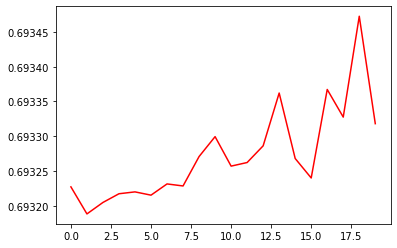

In [122]:
# train the parameters
history = modelLSTM.fit( X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# evaluate accuracy
train_acc = modelLSTM.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modelLSTM.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [123]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 128)         73856     
                                            